In [ ]:
# libraries
import os
import pandas as pd
import openpyxl
import xlrd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colors
import seaborn as sns
import locale # Import the locale module
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as ticker

In [ ]:
from google.colab import files

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Funciones de la Librería LuisCorp

In [ ]:
#-----------------------------------------------------------------------------------------------------------
#--------------------------------FUNCIONES PARA LA LIBRERÍA LUISCORP------------------------------------------
#-----------------------------------------------------------------------------------------------------------

# Función para cambiar separador de décimas a formato español
def cambiar_separador(numero):
    numero_str = str(numero)
    if '.' in numero_str:
        numero_str = numero_str.replace('.', ',')
    return numero_str

# Función para cambiar el formato de separadores de miles de anglosajón a español
def cambiar_separadores(numero):
    numero_str = str(numero)
    if ',' in numero_str:
        numero_str = numero_str.replace(',', '.')
    return numero_str

# Función para cambiar separador de miles a formato español
def colocar_separador_miles(numero):
    if numero >= 1000:
        # Formatear el número con separadores de miles
        return "{:,.0f}".format(numero).replace(",", ".")
    else:
        return str(numero)

# Función para agrupar edades de acuerdo a lo mostrado por la página del OEL
def agrupar_edades(edad):
    if edad >= 0 and edad < 15:
        return '0-14'
    elif edad >= 15 and edad < 25:
        return '15-24'
    elif edad >= 25 and edad < 35:
        return '25-34'
    elif edad >= 35 and edad < 45:
        return '35-44'
    elif edad >= 45 and edad < 55:
        return '45-54'
    elif edad >= 55 and edad < 65:
        return '55-64'
    elif edad >= 65 and edad < 75:
        return '65-74'
    elif edad >= 75 and edad < 85:
        return '75-84'
    elif edad >= 85 and edad < 95:
        return '85-94'
    elif edad >= 95:
        return '95 en adelante'

# Función para generar colores degradados
def generate_gradient_colors(base_color, num_colors):
    base_color = np.array(base_color) / 255
    gradient = [base_color * (1 - (num_colors - i)/num_colors) for i in range(1, num_colors+1)]
    return gradient

# Función para formatear el porcentaje con coma como separador de decimales
def formatear_porcentaje(x, pos):
    return f'{x:.0f} %'.replace('.', ',')

# Función para comparar la diferencia (resta), através de los índices dos dataframes
def compare_dataframes(df1, df2, columns):
    comparison_result = pd.DataFrame(index=df1.index)
    for column in columns:
        comparison_result[column + '_Diff'] =  df2[column] - df1[column]

    return comparison_result

# Función que toma las columnas a filtrar de un dataframe y toma los valores de las mismas que se desean visualizar, para devolver un dataframe filtrado.(REVISAR)
def filtro_registros(dataframe, columnas_a_filtrar):
    """
    Filtra un DataFrame basado en múltiples criterios de columna.

    Args:
        dataframe: El DataFrame a filtrar.
        columnas_a_filtrar: Un diccionario donde las claves son los nombres de las columnas
                            y los valores son los valores a filtrar en esas columnas.

    Returns:
        Un nuevo DataFrame con los registros filtrados o None si ocurre un error.
    """
    try:
        df_filtrado = dataframe.copy()  # Crea una copia para evitar modificar el original
        for columna, valor in columnas_a_filtrar.items():
            if columna in df_filtrado.columns:
                df_filtrado = df_filtrado[df_filtrado[columna] == valor]
            else:
                print(f"Error: La columna '{columna}' no existe en el DataFrame.")
                return None
        return df_filtrado
    except Exception as e:
        print(f"Ocurrió un error durante el filtrado: {e}")
        return None


# Función para crear un diccionario a partir de una cantidad de items especificadas, así como los valores asignados a los mismos
def crear_diccionario(items, values):
    """
    Crea un diccionario a partir de una lista de claves y una lista de valores.

    Args:
        items: Una lista de claves para el diccionario.
        values: Una lista de valores para el diccionario.

    Returns:
        Un diccionario con las claves y valores proporcionados, o None si las listas no tienen la misma longitud.
    """
    if len(items) != len(values):
        print("Error: Las listas de claves y valores deben tener la misma longitud.")
        return None

    new_dict = dict(zip(items, values))
    return new_dict

# Función para crear listas a partir de un valor ingresado por teclado de la longitud de la lista, para posteriormente ingresar por teclado la lista que puede de caracteres o números
def crear_lista_por_teclado():
    """Creates a list based on user input for length and elements."""

    try:
        list_length = int(input("Enter the desired length of the list: "))
        if list_length <= 0:
            print("List length must be a positive integer.")
            return None

        my_list = []
        for i in range(list_length):
            element = input(f"Enter element {i+1}: ")
            try:
                # Try converting to number (int or float)
                element = int(element)
            except ValueError:
                try:
                    element = float(element)
                except ValueError:
                    pass  # Keep as string if not a number

            my_list.append(element)
        return my_list
    except ValueError:
        print("Invalid input. Please enter a valid integer for the list length.")
        return None

# Función para filtrar una columna de un dataframe que me muestre solo los valores nulos de una columna
def filter_null_column(dataframe, column_name):
    """
    Filters a DataFrame to show only null values in a specified column.

    Args:
        dataframe: The pandas DataFrame to filter.
        column_name: The name of the column to filter.

    Returns:
        A new DataFrame containing only rows where the specified column is null,
        or None if the column does not exist or an error occurs.
    """
    try:
        if column_name not in dataframe.columns:
            print(f"Error: Column '{column_name}' not found in the DataFrame.")
            return None

        filtered_df = dataframe[dataframe[column_name].isnull()]
        return filtered_df
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Función para filtrar una columna de un dataframe que me muestre solo los valores no nulos de una columna
def filter_non_null_column(dataframe, column_name):
    """
    Filters a DataFrame to show only non-null values in a specified column.

    Args:
        dataframe: The pandas DataFrame to filter.
        column_name: The name of the column to filter.

    Returns:
        A new DataFrame containing only rows where the specified column is not null,
        or None if the column does not exist or an error occurs.
    """
    try:
        if column_name not in dataframe.columns:
            print(f"Error: Column '{column_name}' not found in the DataFrame.")
            return None

        filtered_df = dataframe[dataframe[column_name].notnull()]
        return filtered_df
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Función para determinar la intersección de dos columnas de dos datraframe
def compare_columns1(df1, df2, column1_name, column2_name):
    """Compares two columns from two dataframes and identifies values from the first
       dataframe's column that are present in the second dataframe's column.
    """

    if column1_name not in df1.columns or column2_name not in df2.columns:
        print("Error: One or both columns not found in the specified dataframes.")
        return []

    # Convert columns to sets for efficient membership testing
    set1 = set(df1[column1_name].dropna())  # Drop NaN values
    set2 = set(df2[column2_name].dropna())  # Drop NaN values

    # Find common elements and convert to list
    common_elements = list(set1.intersection(set2))

    if common_elements:
        print("ID´s del dataframe 1 presentes en dataframe 2")
    else:
        print("No common values found between the specified columns.")

    return common_elements

# Función que filtra una columna de un dataframe con los valores provenientes de una lista dada

def filter_dataframe_column(dataframe, column_name, values_to_filter):
    """
    Filters a DataFrame column based on a given list of values.

    Args:
        dataframe: The pandas DataFrame to filter.
        column_name: The name of the column to filter.
        values_to_filter: A list of values to filter the column by.

    Returns:
        A new DataFrame containing only the rows where the specified column's value is present in the values_to_filter list.
        Returns None if the column does not exist in the DataFrame or if an error occurs.
    """
    try:
        if column_name not in dataframe.columns:
            print(f"Error: Column '{column_name}' not found in the DataFrame.")
            return None

        filtered_df = dataframe[dataframe[column_name].isin(values_to_filter)]
        return filtered_df
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Escribe un código para agrupar los valores de la columna 'NOMBRE DE LA ORGANIZACIÓN' por los valores de la columna 'SECTOR', que luego los agrupe por sector en tablas individuales para añadir hojas dentro de un excel por cada tabla creada

def agrupar_y_crear_excel(df):
    """
    Agrupa datos por sector y crea un archivo Excel con hojas individuales para cada sector.

    Args:
        archivo_excel (str): La ruta al archivo Excel de entrada.
    """
    try:
        # Lee el archivo Excel en un DataFrame de pandas
        #df = pd.read_excel(archivo_excel)

        # Verifica si las columnas necesarias existen
        if 'NOMBRE DE LA ORGANIZACIÓN' not in df.columns or 'SECTOR' not in df.columns:
            raise ValueError("El archivo Excel debe contener las columnas 'NOMBRE DE LA ORGANIZACIÓN' y 'SECTOR'.")

        # Agrupa los datos por sector
        grupos = df.groupby('SECTOR')

        # Crea un nuevo libro de Excel
        libro_salida = openpyxl.Workbook()

        # Itera sobre los grupos y crea una hoja para cada uno
        for sector, datos_sector in grupos:
            # Crea una nueva hoja con el nombre del sector
            hoja = libro_salida.create_sheet(title=str(sector))

            # Añade los encabezados de columna a la hoja
            hoja.append(list(datos_sector.columns))

            # Añade los datos del sector a la hoja
            for fila in datos_sector.values.tolist():
                hoja.append(fila)

        # Guarda el nuevo libro de Excel
        nombre_archivo_salida = "organizaciones_por_sector_sin_datos.xlsx"
        libro_salida.save(nombre_archivo_salida)

        print(f"Archivo Excel '{nombre_archivo_salida}' creado con éxito.")

    except FileNotFoundError:
        print(f"Error: Archivo '{df}' no encontrado.")
    except ValueError as e:
        print(f"Error: {e}")
    except Exception as e:
        print(f"Error: {e}")


# Función para eliminar una lista de columnas dadas de un dataframe

def eliminar_columnas(df, columnas_a_eliminar):
    """
    Elimina varias columnas de un DataFrame.

    Args:
        df (pd.DataFrame): El DataFrame original.
        columnas_a_eliminar (list): Una lista con los nombres de las columnas a eliminar.

    Returns:
        pd.DataFrame: Un nuevo DataFrame con las columnas especificadas eliminadas.
                      Devuelve el DataFrame original si no se encuentra ninguna columna para eliminar.
    """
    try:
        # Verifica si las columnas a eliminar existen en el DataFrame
        columnas_existentes = [col for col in columnas_a_eliminar if col in df.columns]

        if not columnas_existentes:
            print("Ninguna de las columnas especificadas fue encontrada en el DataFrame.")
            return df  # Devuelve el DataFrame original sin cambios

        # Utiliza el método drop para eliminar las columnas
        df_nuevo = df.drop(columns=columnas_existentes)

        return df_nuevo

    except Exception as e:
        print(f"Error al eliminar columnas: {e}")
        return df  # Devuelve el DataFrame original en caso de error



def agrupar_y_exportar_por_sector(df, nombre_archivo_excel):
    """
    Agrupa los datos por sector, cuenta las repeticiones de organizaciones,
    elimina duplicados y exporta a un archivo Excel, creando una hoja
    para cada sector.

    Args:
        unidades_merge (pd.DataFrame): El DataFrame con los datos.
        nombre_archivo_excel (str): El nombre del archivo Excel a crear.
    """

    # Contar repeticiones de nombres de organización
    df.loc[:, 'CANTIDAD DE UNIDADES POR ORGANIZACIÓN'] = df.groupby(['SECTOR_x', 'NOMBRE DE LA ORGANIZACIÓN'])['NOMBRE DE LA ORGANIZACIÓN'].transform('count')

    # Eliminar nombres de organización duplicados (manteniendo el primero encontrado)
    df_sin_duplicados = df.drop_duplicates(subset=['SECTOR_x', 'NOMBRE DE LA ORGANIZACIÓN'], keep='first')

    # Agrupar por sector
    grupos = df_sin_duplicados.groupby('SECTOR_x')

    # Crear un archivo Excel
    with pd.ExcelWriter(nombre_archivo_excel, engine='openpyxl') as writer:
        for sector, df_sector in grupos:
          # Lista de columnas a eliminar
            columns_to_drop = ['SECTOR_x', 'NÚMERO DE TELEFONO', 'TELEGRAM', 'FACEBOOK', 'INSTAGRAM', 'PÁGINA WEB',
                               'CORREO OFICIAL', 'CORREO MAS USADO', 'CLASIFICACIÓN POR ACTIVIDAD ECONOMICA',
                               'CLASIFICACIÓN POR TAMAÑO', 'CLASIFICACIÓN POR TIPO', 'DESARROLLA ACTIVIDADES VINCULADAS A I+D',
                               'ESTADO_x', 'MUNICIPIO_x', 'PARROQUIA_x', 'DIRECCIÓN_x', 'LATITUD_x', 'LONGITUD_x',
                               'RL CÉDULA', 'RL PRIMER NOMBRE', 'RL SEGUNDO NOMBRE', 'RL PRIMER APELLIDO',
                               'RL SEGUNDO APELLIDO', 'RL CARGO', 'RL TELEFONO', 'NOMBRE DE LA UNIDAD', 'CONDICIÓN',
                               'PROPORCIÓN EN METROS CUADRADOS', 'ESTADO_y', 'MUNICIPIO_y', 'PARROQUIA_y',
                               'DIRECCIÓN_y', 'LATITUD_y', 'LONGITUD_y', 'AREA DEL CONOCIMIENTO',
                               ' SUB AREA DEL CONOCIMIENTO', 'DISCIPLINA', 'SERVICIO QUE PRESTA'
                               ]

          # Eliminar las columnas especificadas
            df_sector = df_sector.drop(columns=columns_to_drop)

            # Escribir el DataFrame en una nueva hoja del Excel
            df_sector.to_excel(writer, sheet_name=sector, index=False)


#Carga de las bases de datos

In [ ]:
# Instancias registradas
instancia = pd.read_excel('/content/drive/MyDrive/Colab_Notebooks/portfolio_oncti/reporte_reveca/Reporte_INSTANCIAS.xlsx')
unidadesIyD = pd.read_excel('/content/drive/MyDrive/Colab_Notebooks/portfolio_oncti/reporte_reveca/Reporte_UNIDADES.xlsx')

# Sólo muestra instancias registradas
gastos_inversion = pd.read_excel('/content/drive/MyDrive/Colab_Notebooks/portfolio_oncti/reporte_reveca/Reporte_GASTOS.xlsx')


In [ ]:
# Globalización

# muestra cuantos proyectos en cooperación tiene la instancia registrada
cooperacion = pd.read_excel('/content/drive/MyDrive/Colab_Notebooks/portfolio_oncti/reporte_reveca/Reporte_GLOBALIZACIÓN_COOPERACIÓN.xlsx')

# Sin información
derechos = pd.read_excel('/content/drive/MyDrive/Colab_Notebooks/portfolio_oncti/reporte_reveca/Reporte_GLOBALIZACIÓN_DERECHOS.xlsx')


In [ ]:
# Tecnologías de la información y comunicación (Sin información)
# sólo instancias registradas
acceso_internet =  pd.read_excel('/content/drive/MyDrive/Colab_Notebooks/portfolio_oncti/reporte_reveca/Reporte_TIC_ACCESOINTERNET.xlsx')

# sólo instancias registradas
acceso_remoto = pd.read_excel('/content/drive/MyDrive/Colab_Notebooks/portfolio_oncti/reporte_reveca/Reporte_TIC_ACCESOREMOTO.xlsx')

# sólo instancias registradas
seguridad = pd.read_excel('/content/drive/MyDrive/Colab_Notebooks/portfolio_oncti/reporte_reveca/Reporte_TIC_SEGURIDAD.xlsx')

# muestra instancias que reportaron infraestructura
infraestructura = pd.read_excel('/content/drive/MyDrive/Colab_Notebooks/portfolio_oncti/reporte_reveca/Reporte_TIC_INFRAESTRUCTURA.xlsx')

# sólo instancias registradas
mantenimiento = pd.read_excel('/content/drive/MyDrive/Colab_Notebooks/portfolio_oncti/reporte_reveca/Reporte_TIC_MANTENIMIENTO.xlsx')


In [ ]:
# Personal I+D (Sirve solo para decir cuales tienen info, más no da detalles)
personal = pd.read_excel('/content/drive/MyDrive/Colab_Notebooks/portfolio_oncti/reporte_reveca/Reporte_PERSONAL.xlsx')


In [ ]:
# Productividad (Sirve solo para decir cuales tienen info, más no da detalles)
# muestra instancias que reportaron proyectos y cuantos tienen
proyecto = pd.read_excel('/content/drive/MyDrive/Colab_Notebooks/portfolio_oncti/reporte_reveca/Reporte_PRODUCTIVIDAD_PROYECTO.xlsx')

# muestra instancias que reportaron productividad intelectual y cuantos tienen
intelectual = pd.read_excel('/content/drive/MyDrive/Colab_Notebooks/portfolio_oncti/reporte_reveca/Reporte_PRODUCTIVIDAD_INTELECTUAL.xlsx')

# Publicación Científica
p_cientifica =  pd.read_excel('/content/drive/MyDrive/Colab_Notebooks/portfolio_oncti/reporte_reveca/Reporte_PRODUCTIVIDAD_PUBCIENTÍFICA.xlsx')

# Publicación conduciente a grado
p_grado =  pd.read_excel('/content/drive/MyDrive/Colab_Notebooks/portfolio_oncti/reporte_reveca/Reporte_PRODUCTIVIDAD_PUBGRADO.xlsx')


In [ ]:
# Equipos tecnológicos
equip_tec =  pd.read_excel('/content/drive/MyDrive/Colab_Notebooks/portfolio_oncti/reporte_reveca/Reporte_EQUIPOS_EQUIPTECNOLÓGICO.xlsx')

# Equipos especializados
equip_esp =  pd.read_excel('/content/drive/MyDrive/Colab_Notebooks/portfolio_oncti/reporte_reveca/Reporte_EQUIPOS_EQUIPESPECIALIZADO.xlsx')

"""
# Cargar los datos desde un archivo CSV
df = pd.read_csv('ruta/a/tu/archivo.csv')  # Reemplaza con la ruta a tu archivo

"""

"\n# Cargar los datos desde un archivo CSV\ndf = pd.read_csv('ruta/a/tu/archivo.csv')  # Reemplaza con la ruta a tu archivo\n\n"

In [ ]:
reemplazo = [
	     'FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y LA TECNOLOGÍA  (FUNDACITE AMAZONAS) ',
	     'FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y LA TECNOLOGÍA  (FUNDACITE ANZOÁTEGUI) ',
	     'FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y LA TECNOLOGÍA  (FUNDACITE ARAGUA) ',
	     'FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y LA TECNOLOGÍA  (FUNDACITE BARINAS) ',
	     'FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y LA TECNOLOGÍA  (FUNDACITE BOLÍVAR) ',
	     'FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y LA TECNOLOGÍA  (FUNDACITE CARACAS) ',
	     'FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y LA TECNOLOGÍA  (FUNDACITE D)ELTA AMACURO',
	     'INSTITUTO DE FERROCARRILES DEL ESTADO (IFE) ',
	     'INSTITUTO UNIVERSITARIO ADVENTISTA DE VENEZUELA (IUNAV) '
            ]

correctos = [
	     'FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y LA TECNOLOGÍA  (FUNDACITE AMAZONAS)',
	     'FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y LA TECNOLOGÍA  (FUNDACITE ANZOÁTEGUI)',
	     'FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y LA TECNOLOGÍA  (FUNDACITE ARAGUA)',
	     'FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y LA TECNOLOGÍA  (FUNDACITE BARINAS)',
	     'FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y LA TECNOLOGÍA  (FUNDACITE BOLÍVAR)',
	     'FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y LA TECNOLOGÍA  (FUNDACITE CARACAS)',
	     'FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y LA TECNOLOGÍA  (FUNDACITE DELTA AMACURO)',
	     'INSTITUTO DE FERROCARRILES DEL ESTADO (IFE)',
	     'INSTITUTO UNIVERSITARIO ADVENTISTA DE VENEZUELA (IUNAV)'
            ]

# Análisis Exploratorio de las bases de datos (EDA)

In [ ]:
instancia.head()

RIF                          NOMBRE DE LA ORGANIZACIÓN  \
0  G-20009847-3  ACADEMIA DE CIENCIAS AGRÍCOLAS DE VENEZUELA (A...   
1  G-20008147-3  AGENCIA BOLIVARIANA PARA ACTIVIDADES ESPACIALE...   
2           NaN  ASOCIACIÓN CIVIL, DEPORTIVA, EDUCATIVA Y CULTURAL   
3  J-30867296-3  ASOCIACIÓN VENEZOLANA DE GESTIÓN DE INVESTIGAC...   
4           NaN                   BANCO CENTRAL DE VENEZUELA (BCV)   

            SECTOR   ESTADO                 MUNICIPIO            PARROQUIA  \
0         GOBIERNO  BARINAS  ALBERTO ARVELO TORREALBA  RODRÍGUEZ DOMÍNGUEZ   
1         GOBIERNO  MIRANDA                    CHACAO               CHACAO   
2  EMPRESA PRIVADA      NaN                       NaN                  NaN   
3  EMPRESA PRIVADA  MIRANDA                     SUCRE               PETARE   
4         GOBIERNO      NaN                       NaN                  NaN   

                                           DIRECCIÓN             LATITUD  \
0   carretera vía balconcito, sector quebrada negra.  08 ° 55 ' 06.19 ''   
1  CALLE BASE AEREA GENERALISIMO FRANCISCO DE MIR...  10 ° 48 ' 57.06 ''   
2                                                NaN                 NaN   
3  calle NAPOLEÓN con av principal de macaracuay ...  10 ° 28 ' 98.76 ''   
4                                                NaN                 NaN   

             LONGITUD NÚMERO DE TELEFONO  ... RL PRIMER NOMBRE  \
0  70 ° 04 ' 21.65 ''  (0273) 532 - 4095  ...           maría    
1  66 ° 83 ' 67.42 ''  (0212) 207 - 5441  ...          ADOLFO    
2                 NaN                NaN  ...              NaN   
3  66 ° 49 ' 17.98 ''  (0416) 621 - 6411  ...         MIGDALIA   
4                 NaN                NaN  ...              NaN   

  RL SEGUNDO NOMBRE RL PRIMER APELLIDO RL SEGUNDO APELLIDO  \
0         del valle            bencomo            gonzález   
1              JOSÉ              GODOY              PERNIA   
2               NaN                NaN                 NaN   
3        CONCEPCION             PEROZO              BRACHO   
4               NaN                NaN                 NaN   

                                            RL CARGO        RL TELEFONO  \
0                                         presidenta  (0424) 502 - 6858   
1  pRESIDENTE DE LA AGENCIA BOLIVARIANA PARA ACTI...  (0414) 642 - 5658   
2                                                NaN                NaN   
3                                         presidenta  (0212) 257 - 9198   
4                                                NaN                NaN   

               CLASIFICACIÓN POR ACTIVIDAD ECONOMICA  \
0       AGRICULTURA, GANADERÍA, SILVICULTURA Y PESCA   
1  ACTIVIDADES PROFESIONALES, CIENTÍFICAS Y TÉCNICAS   
2                                                NaN   
3  ACTIVIDADES PROFESIONALES, CIENTÍFICAS Y TÉCNICAS   
4                                                NaN   

                            CLASIFICACIÓN POR TAMAÑO CLASIFICACIÓN POR TIPO  \
0  MEDIANA (DE 51 A 100 TRABAJADORES Y TRABAJADORAS)                PÚBLICA   
1    GRANDE (MÁS DE 101 TRABAJADORES Y TRABAJADORAS)                PÚBLICA   
2                                                NaN                    NaN   
3     PEQUEÑA (HASTA 50 TRABAJADORES Y TRABAJADORAS)                PRIVADA   
4                                                NaN                    NaN   

  DESARROLLA ACTIVIDADES VINCULADAS A I+D  
0                                      SI  
1                                      SI  
2                                      NO  
3                                      SI  
4                                      NO  

[5 rows x 27 columns]

In [ ]:
instancia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   RIF                                      111 non-null    object 
 1   NOMBRE DE LA ORGANIZACIÓN                150 non-null    object 
 2   SECTOR                                   150 non-null    object 
 3   ESTADO                                   111 non-null    object 
 4   MUNICIPIO                                111 non-null    object 
 5   PARROQUIA                                111 non-null    object 
 6   DIRECCIÓN                                111 non-null    object 
 7   LATITUD                                  111 non-null    object 
 8   LONGITUD                                 111 non-null    object 
 9   NÚMERO DE TELEFONO                       111 non-null    object 
 10  TELEGRAM                                 51 non-nu

In [ ]:
# prompt: escribe un código que para el dataframe 'instancia' verifique que si en la columna 'RIF'  un registro asociado al de la columna 'NOMBRE DE LA ORGANIZACIÓN' posee datos nulos, para la columna 'DESARROLLA ACTIVIDADES VINCULADAS A I+D' coloque también ese valor como nulo

# Reemplaza los valores nulos en 'DESARROLLA ACTIVIDADES VINCULADAS A I+D'
# si 'RIF' es nulo para el mismo 'NOMBRE DE LA ORGANIZACIÓN'

instancia['DESARROLLA ACTIVIDADES VINCULADAS A I+D'] = np.where(
    instancia['RIF'].isnull(),
    np.where(
        instancia.groupby('NOMBRE DE LA ORGANIZACIÓN')['RIF'].transform(lambda x: x.isnull()).fillna(False), # Changed 'isnull' to lambda function
        np.nan,
        instancia['DESARROLLA ACTIVIDADES VINCULADAS A I+D']
    ),
    instancia['DESARROLLA ACTIVIDADES VINCULADAS A I+D']
)


In [ ]:
instancia.head()

RIF                          NOMBRE DE LA ORGANIZACIÓN  \
0  G-20009847-3  ACADEMIA DE CIENCIAS AGRÍCOLAS DE VENEZUELA (A...   
1  G-20008147-3  AGENCIA BOLIVARIANA PARA ACTIVIDADES ESPACIALE...   
2           NaN  ASOCIACIÓN CIVIL, DEPORTIVA, EDUCATIVA Y CULTURAL   
3  J-30867296-3  ASOCIACIÓN VENEZOLANA DE GESTIÓN DE INVESTIGAC...   
4           NaN                   BANCO CENTRAL DE VENEZUELA (BCV)   

            SECTOR   ESTADO                 MUNICIPIO            PARROQUIA  \
0         GOBIERNO  BARINAS  ALBERTO ARVELO TORREALBA  RODRÍGUEZ DOMÍNGUEZ   
1         GOBIERNO  MIRANDA                    CHACAO               CHACAO   
2  EMPRESA PRIVADA      NaN                       NaN                  NaN   
3  EMPRESA PRIVADA  MIRANDA                     SUCRE               PETARE   
4         GOBIERNO      NaN                       NaN                  NaN   

                                           DIRECCIÓN             LATITUD  \
0   carretera vía balconcito, sector quebrada negra.  08 ° 55 ' 06.19 ''   
1  CALLE BASE AEREA GENERALISIMO FRANCISCO DE MIR...  10 ° 48 ' 57.06 ''   
2                                                NaN                 NaN   
3  calle NAPOLEÓN con av principal de macaracuay ...  10 ° 28 ' 98.76 ''   
4                                                NaN                 NaN   

             LONGITUD NÚMERO DE TELEFONO  ... RL PRIMER NOMBRE  \
0  70 ° 04 ' 21.65 ''  (0273) 532 - 4095  ...           maría    
1  66 ° 83 ' 67.42 ''  (0212) 207 - 5441  ...          ADOLFO    
2                 NaN                NaN  ...              NaN   
3  66 ° 49 ' 17.98 ''  (0416) 621 - 6411  ...         MIGDALIA   
4                 NaN                NaN  ...              NaN   

  RL SEGUNDO NOMBRE RL PRIMER APELLIDO RL SEGUNDO APELLIDO  \
0         del valle            bencomo            gonzález   
1              JOSÉ              GODOY              PERNIA   
2               NaN                NaN                 NaN   
3        CONCEPCION             PEROZO              BRACHO   
4               NaN                NaN                 NaN   

                                            RL CARGO        RL TELEFONO  \
0                                         presidenta  (0424) 502 - 6858   
1  pRESIDENTE DE LA AGENCIA BOLIVARIANA PARA ACTI...  (0414) 642 - 5658   
2                                                NaN                NaN   
3                                         presidenta  (0212) 257 - 9198   
4                                                NaN                NaN   

               CLASIFICACIÓN POR ACTIVIDAD ECONOMICA  \
0       AGRICULTURA, GANADERÍA, SILVICULTURA Y PESCA   
1  ACTIVIDADES PROFESIONALES, CIENTÍFICAS Y TÉCNICAS   
2                                                NaN   
3  ACTIVIDADES PROFESIONALES, CIENTÍFICAS Y TÉCNICAS   
4                                                NaN   

                            CLASIFICACIÓN POR TAMAÑO CLASIFICACIÓN POR TIPO  \
0  MEDIANA (DE 51 A 100 TRABAJADORES Y TRABAJADORAS)                PÚBLICA   
1    GRANDE (MÁS DE 101 TRABAJADORES Y TRABAJADORAS)                PÚBLICA   
2                                                NaN                    NaN   
3     PEQUEÑA (HASTA 50 TRABAJADORES Y TRABAJADORAS)                PRIVADA   
4                                                NaN                    NaN   

  DESARROLLA ACTIVIDADES VINCULADAS A I+D  
0                                      SI  
1                                      SI  
2                                     NaN  
3                                      SI  
4                                     NaN  

[5 rows x 27 columns]

In [ ]:
# prompt: escribe un código a fin de que coloque solo en mayúsculas el primer caracter de los valores de las columnas 'Estado Civil', 'Estado', 'Municipio', 'Parroquia', 'Tipo Institucion', 'Ocupacion', 'Nivel de Estudio', 'Profesion', 'Producto  de investigación' y 'Área' del dataframe 'df_filtrado'

# Define columns to capitalize
columns_to_capitalize = ['SECTOR','ESTADO', 'CLASIFICACIÓN POR ACTIVIDAD ECONOMICA', 'CLASIFICACIÓN POR TAMAÑO', 'CLASIFICACIÓN POR TIPO', 'DESARROLLA ACTIVIDADES VINCULADAS A I+D']

# Capitalize the first letter of each value in specified columns
for column in columns_to_capitalize:
    if column in instancia.columns:
        instancia.loc[:, column] = instancia[column].astype(str).str.capitalize()

instancia

RIF                          NOMBRE DE LA ORGANIZACIÓN  \
0    G-20009847-3  ACADEMIA DE CIENCIAS AGRÍCOLAS DE VENEZUELA (A...   
1    G-20008147-3  AGENCIA BOLIVARIANA PARA ACTIVIDADES ESPACIALE...   
2             NaN  ASOCIACIÓN CIVIL, DEPORTIVA, EDUCATIVA Y CULTURAL   
3    J-30867296-3  ASOCIACIÓN VENEZOLANA DE GESTIÓN DE INVESTIGAC...   
4             NaN                   BANCO CENTRAL DE VENEZUELA (BCV)   
..            ...                                                ...   
145           NaN               UNIVERSIDAD PRIVADA MONTEÁVILA (UMA)   
146  J-07009697-7                  UNIVERSIDAD RAFAEL URDANETA (URU)   
147           NaN        UNIVERSIDAD TECNOLÓGICA DEL CENTRO (UNITEC)   
148           NaN  UNIVERSIDAD TERRITORIAL DELTAICA FRANCISCO TAM...   
149  J-08515699-2                          UNIVERSIDAD YACAMBÚ (UNY)   

                      SECTOR   ESTADO                 MUNICIPIO  \
0                   Gobierno  Barinas  ALBERTO ARVELO TORREALBA   
1                   Gobierno  Miranda                    CHACAO   
2            Empresa privada      Nan                       NaN   
3            Empresa privada  Miranda                     SUCRE   
4                   Gobierno      Nan                       NaN   
..                       ...      ...                       ...   
145  Educación universitaria      Nan                       NaN   
146  Educación universitaria    Zulia                 MARACAIBO   
147  Educación universitaria      Nan                       NaN   
148  Educación universitaria      Nan                       NaN   
149  Educación universitaria     Lara                PALAVECINO   

                  PARROQUIA  \
0       RODRÍGUEZ DOMÍNGUEZ   
1                    CHACAO   
2                       NaN   
3                    PETARE   
4                       NaN   
..                      ...   
145                     NaN   
146             SANTA LUCIA   
147                     NaN   
148                     NaN   
149  JOSÉ GREGORIO BASTIDAS   

                                             DIRECCIÓN             LATITUD  \
0     carretera vía balconcito, sector quebrada negra.  08 ° 55 ' 06.19 ''   
1    CALLE BASE AEREA GENERALISIMO FRANCISCO DE MIR...  10 ° 48 ' 57.06 ''   
2                                                  NaN                 NaN   
3    calle NAPOLEÓN con av principal de macaracuay ...  10 ° 28 ' 98.76 ''   
4                                                  NaN                 NaN   
..                                                 ...                 ...   
145                                                NaN                 NaN   
146  sector vereda del lago, avenida 2 el milagro c...  10 ° 64 ' 83.35 ''   
147                                                NaN                 NaN   
148                                                NaN                 NaN   
149  Calle 1A entre carreras 3y 4 urbanización parq...  10 ° 01 ' 70.61 ''   

               LONGITUD NÚMERO DE TELEFONO  ... RL PRIMER NOMBRE  \
0    70 ° 04 ' 21.65 ''  (0273) 532 - 4095  ...           maría    
1    66 ° 83 ' 67.42 ''  (0212) 207 - 5441  ...          ADOLFO    
2                   NaN                NaN  ...              NaN   
3    66 ° 49 ' 17.98 ''  (0416) 621 - 6411  ...         MIGDALIA   
4                   NaN                NaN  ...              NaN   
..                  ...                ...  ...              ...   
145                 NaN                NaN  ...              NaN   
146  71 ° 59 ' 14.20 ''  (0261) 200 - 0818  ...          alfredo   
147                 NaN                NaN  ...              NaN   
148                 NaN                NaN  ...              NaN   
149  69 ° 24 ' 35.56 ''  (0251) 710 - 2137  ...            juan    

    RL SEGUNDO NOMBRE RL PRIMER APELLIDO RL SEGUNDO APELLIDO  \
0           del valle            bencomo            gonzález   
1                JOSÉ              GODOY              PERNIA   
2                 NaN    

In [ ]:
"""
# prompt: escribe un código que me permita filtrar una columna de un dataframe

# Ejemplo de uso (asumiendo que 'instancia' es tu DataFrame):
columnas_a_filtrar = {'SECTOR': 'EMPRESA PÚBLICA'}  # Reemplaza con tus criterios
df_filtrado = filtro_registros(instancia, columnas_a_filtrar)

df_filtrado
"""


"\n# prompt: escribe un código que me permita filtrar una columna de un dataframe\n\n# Ejemplo de uso (asumiendo que 'instancia' es tu DataFrame):\ncolumnas_a_filtrar = {'SECTOR': 'EMPRESA PÚBLICA'}  # Reemplaza con tus criterios\ndf_filtrado = filtro_registros(instancia, columnas_a_filtrar)\n\ndf_filtrado\n"

# 1. INSTANCIAS

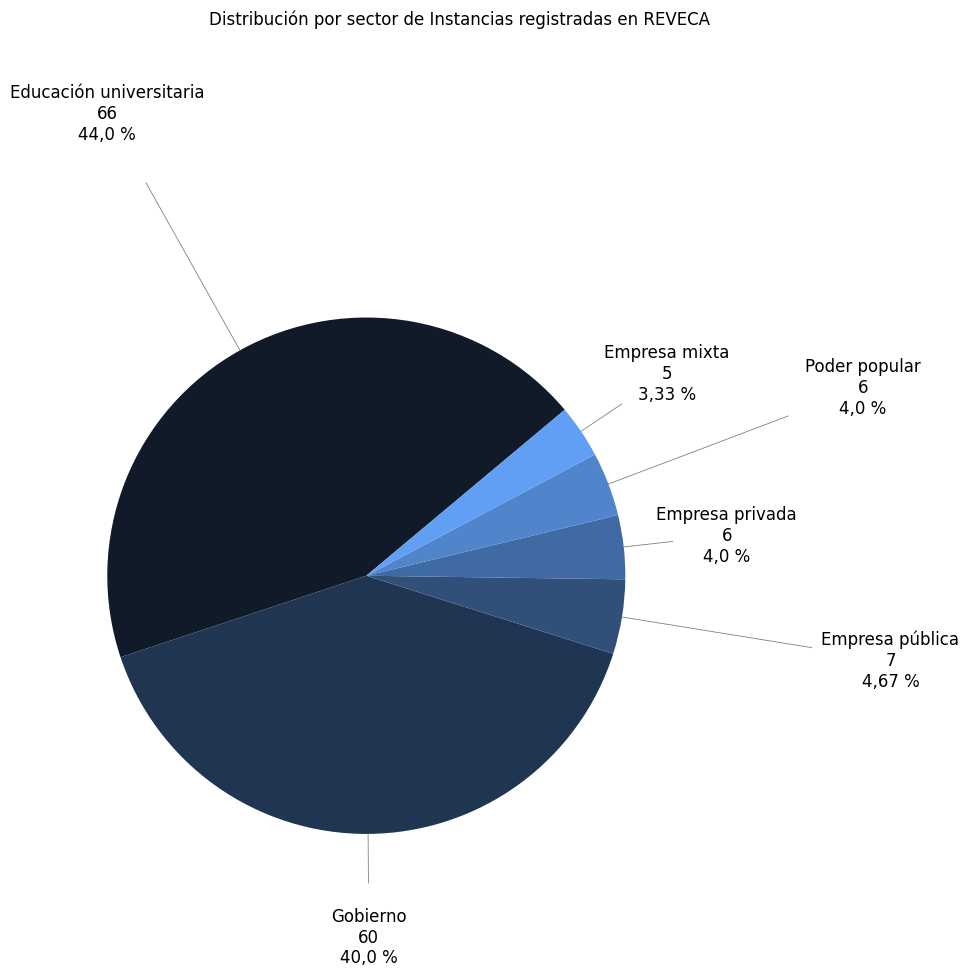

In [ ]:
# prompt: crea un gráfico de torta de la columna 'Sector' del dataframe 'filtered_instancia'
# Obtener los conteos de cada sector
sector_counts0 = instancia['SECTOR'].value_counts()

# Crear el gráfico de torta
plt.figure(figsize=(10, 10))
b_color = [96, 159, 244]
color = generate_gradient_colors(b_color, len(sector_counts0))  # Usar la longitud de sector_counts

# Usar sector_counts.index para las etiquetas y sector_counts.values para los tamaños
plt.pie(sector_counts0.values, startangle=40, colors=color)
plt.axis('equal')  # Para asegurar que el gráfico sea un círculo



# Asignando sector_counts.values a siz
siz0 = sector_counts0.values

# Use `range(len(sector_counts))` to match the pie chart slices.
for i, sector0 in enumerate(sector_counts0.index): # Iterate through index and values of sector_counts
    # Calcular la posición de la etiqueta usando theta1 and theta2 attributes
    # Use the correct axes object. Since you're creating a new figure, use `plt.gca()` to get the current axes.
    ax = plt.gca()
    angle = np.deg2rad((ax.patches[i].theta1 + ax.patches[i].theta2) / 2)
    x = np.cos(angle)
    y = np.sin(angle)

    # Ajustar la distancia de las etiquetas al centro
    offset = 2.05 if i % 2 == 0 else 1.4 # Intercalar el offset para índices pares e impares

    # Crear la etiqueta con múltiples líneas y separadores de miles
    # Use sector instead of filtered_instancia['SECTOR'][i]
    ax.text(x * offset, y * offset, f"{sector0}\n{colocar_separador_miles(siz0[i])}\n{cambiar_separador(round(siz0[i] / sum(siz0) * 100, 2))} %",
            ha='center', va='center', fontsize=12)

    # Dibujar línea guía
    ax.plot([x, x * 0.85 * offset], [y, y * 0.85 * offset], color='gray', linestyle='-', linewidth=0.6)

plt.title('Distribución por sector de Instancias registradas en REVECA', loc= 'center', y = 1.15)
plt.show()

A CONTINUACIÓN SE MUESTRA UN DATAFRAME CON LAS INSTANCIAS QUE COMPLETARON EL REGISTRO DE SUS DATOS EN LA SECCIÓN DE DATOS DE INSTANCIAS (Sacar a excel para generar reporte)

In [ ]:

# Example usage (assuming 'instancia' is your DataFrame and 'RIF' is the column):
# Replace 'RIF' with the actual name of your column
filtered_instancia = filter_non_null_column(instancia, 'RIF')

"""
# Exportar el DataFrame filtered_instancia a un archivo Excel
filtered_instancia.to_excel('filtered_instancia.xlsx', index=False)

# Mostrar un mensaje de éxito
print('\nEl DataFrame ha sido exportado exitosamente a filtered_instancia.xlsx\n')
"""

filtered_instancia.head()

RIF                          NOMBRE DE LA ORGANIZACIÓN  \
0  G-20009847-3  ACADEMIA DE CIENCIAS AGRÍCOLAS DE VENEZUELA (A...   
1  G-20008147-3  AGENCIA BOLIVARIANA PARA ACTIVIDADES ESPACIALE...   
3  J-30867296-3  ASOCIACIÓN VENEZOLANA DE GESTIÓN DE INVESTIGAC...   
5  J-50184408-9                            BIOSYNTHESIS MEDICAL CA   
6  G-20017212-6  CENTRO DE INVESTIGACIONES CIENTÍFICAS PARA LA ...   

            SECTOR    ESTADO                 MUNICIPIO            PARROQUIA  \
0         Gobierno   Barinas  ALBERTO ARVELO TORREALBA  RODRÍGUEZ DOMÍNGUEZ   
1         Gobierno   Miranda                    CHACAO               CHACAO   
3  Empresa privada   Miranda                     SUCRE               PETARE   
5  Empresa privada   Miranda                    CHACAO               CHACAO   
6         Gobierno  Amazonas           AUTÓNOMO ATURES   LUIS ALBERTO GÓMEZ   

                                           DIRECCIÓN             LATITUD  \
0   carretera vía balconcito, sector quebrada negra.  08 ° 55 ' 06.19 ''   
1  CALLE BASE AEREA GENERALISIMO FRANCISCO DE MIR...  10 ° 48 ' 57.06 ''   
3  calle NAPOLEÓN con av principal de macaracuay ...  10 ° 28 ' 98.76 ''   
5  Avenida LIbertador, C.C Multicentro Empresaria...  10 ° 29 ' 28.00 ''   
6  Av. El Ejercito, cruce con principal de jose m...  05 ° 64 ' 53.98 ''   

             LONGITUD NÚMERO DE TELEFONO  ... RL PRIMER NOMBRE  \
0  70 ° 04 ' 21.65 ''  (0273) 532 - 4095  ...           maría    
1  66 ° 83 ' 67.42 ''  (0212) 207 - 5441  ...          ADOLFO    
3  66 ° 49 ' 17.98 ''  (0416) 621 - 6411  ...         MIGDALIA   
5  66 ° 51 ' 14.00 ''  (0412) 229 - 6251  ...             RAUL   
6  67 ° 60 ' 14.26 ''  (0426) 520 - 4185  ...            jesus   

  RL SEGUNDO NOMBRE RL PRIMER APELLIDO RL SEGUNDO APELLIDO  \
0         del valle            bencomo            gonzález   
1              JOSÉ              GODOY              PERNIA   
3        CONCEPCION             PEROZO              BRACHO   
5           ANTONIO              OJEDA              RONDON   
6         alexander            cegarra           rodriguez   

                                            RL CARGO        RL TELEFONO  \
0                                         presidenta  (0424) 502 - 6858   
1  pRESIDENTE DE LA AGENCIA BOLIVARIANA PARA ACTI...  (0414) 642 - 5658   
3                                         presidenta  (0212) 257 - 9198   
5                                         presidente  (0412) 229 - 6251   
6                                         presidente  (0416) 520 - 4185   

               CLASIFICACIÓN POR ACTIVIDAD ECONOMICA  \
0       Agricultura, ganadería, silvicultura y pesca   
1  Actividades profesionales, científicas y técnicas   
3  Actividades profesionales, científicas y técnicas   
5  Actividades profesionales, científicas y técnicas   
6  Actividades profesionales, científicas y técnicas   

                            CLASIFICACIÓN POR TAMAÑO CLASIFICACIÓN POR TIPO  \
0  Mediana (de 51 a 100 trabajadores y trabajadoras)                Pública   
1    Grande (más de 101 trabajadores y trabajadoras)                Pública   
3     Pequeña (hasta 50 trabajadores y trabajadoras)                Privada   
5     Pequeña (hasta 50 trabajadores y trabajadoras)                Privada   
6  Mediana (de 51 a 100 trabajadores y trabajadoras)                Pública   

  DESARROLLA ACTIVIDADES VINCULADAS A I+D  
0                                      Si  
1                                      Si  
3                                      Si  
5                                      Si  
6                                      Si  

[5 rows x 27 columns]

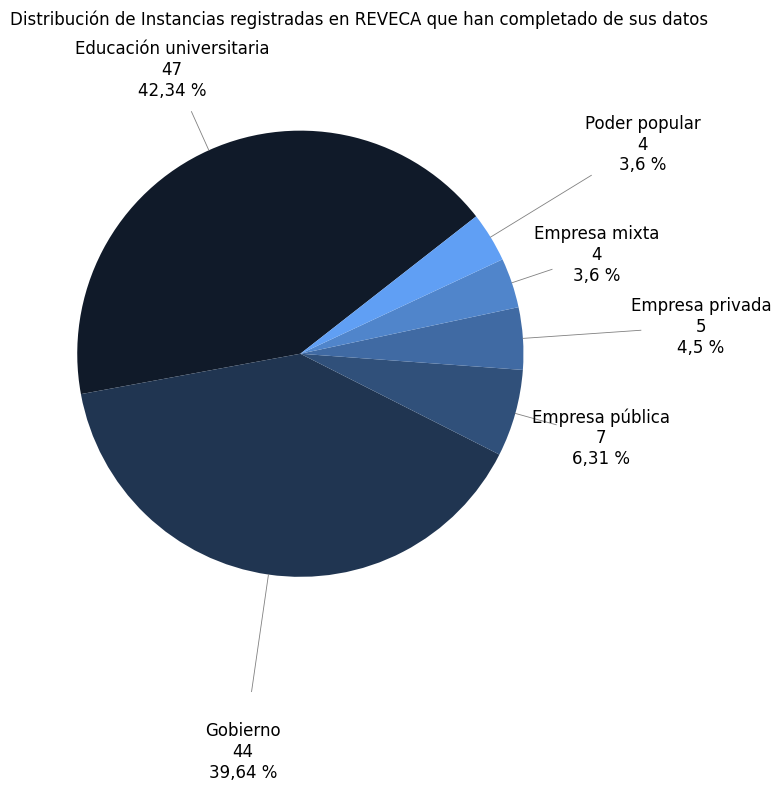

In [ ]:
# prompt: crea un gráfico de torta de la columna 'Sector' del dataframe 'filtered_instancia'
# Obtener los conteos de cada sector
sector_counts = filtered_instancia['SECTOR'].value_counts()

# Crear el gráfico de torta
plt.figure(figsize=(8, 8))
b_color = [96, 159, 244]
color = generate_gradient_colors(b_color, len(sector_counts))  # Usar la longitud de sector_counts

# Usar sector_counts.index para las etiquetas y sector_counts.values para los tamaños
plt.pie(sector_counts.values, startangle=38, colors=color)
plt.axis('equal')  # Para asegurar que el gráfico sea un círculo



# Asignando sector_counts.values a siz
siz = sector_counts.values

# Use `range(len(sector_counts))` to match the pie chart slices.
for i, sector in enumerate(sector_counts.index): # Iterate through index and values of sector_counts
    # Calcular la posición de la etiqueta usando theta1 and theta2 attributes
    # Use the correct axes object. Since you're creating a new figure, use `plt.gca()` to get the current axes.
    ax = plt.gca()
    angle = np.deg2rad((ax.patches[i].theta1 + ax.patches[i].theta2) / 2)
    x = np.cos(angle)
    y = np.sin(angle)

    # Ajustar la distancia de las etiquetas al centro
    offset = 1.4 if i % 2 == 0 else 1.8 # Intercalar el offset para índices pares e impares

    # Crear la etiqueta con múltiples líneas y separadores de miles
    # Use sector instead of filtered_instancia['SECTOR'][i]
    ax.text(x * offset, y * offset, f"{sector}\n{colocar_separador_miles(siz[i])}\n{cambiar_separador(round(siz[i] / sum(siz) * 100, 2))} %",
            ha='center', va='center', fontsize=12)

    # Dibujar línea guía
    ax.plot([x, x * 0.85 * offset], [y, y * 0.85 * offset], color='gray', linestyle='-', linewidth=0.6)

plt.title('Distribución de Instancias registradas en REVECA que han completado de sus datos', loc= 'center', y = 1.1)
plt.show()

In [ ]:
# Ejemplo de uso (asumiendo que 'instancia' es tu DataFrame):
columnas_a_filtrar = {'DESARROLLA ACTIVIDADES VINCULADAS A I+D': 'Si'}  # Reemplaza con tus criterios
df_filtrado = filtro_registros(filtered_instancia, columnas_a_filtrar)

df_filtrado

RIF                          NOMBRE DE LA ORGANIZACIÓN  \
0    G-20009847-3  ACADEMIA DE CIENCIAS AGRÍCOLAS DE VENEZUELA (A...   
1    G-20008147-3  AGENCIA BOLIVARIANA PARA ACTIVIDADES ESPACIALE...   
3    J-30867296-3  ASOCIACIÓN VENEZOLANA DE GESTIÓN DE INVESTIGAC...   
5    J-50184408-9                            BIOSYNTHESIS MEDICAL CA   
6    G-20017212-6  CENTRO DE INVESTIGACIONES CIENTÍFICAS PARA LA ...   
..            ...                                                ...   
141  G-20004105-6  UNIVERSIDAD POLITÉCNICA TERRITORIAL DEL ZULIA ...   
143  J-30840930-8         UNIVERSIDAD PRIVADA ARTURO MICHELENA (UAM)   
144  J-07034507-1  UNIVERSIDAD PRIVADA DR. RAFAEL BELLOSO CHACÍN ...   
146  J-07009697-7                  UNIVERSIDAD RAFAEL URDANETA (URU)   
149  J-08515699-2                          UNIVERSIDAD YACAMBÚ (UNY)   

                      SECTOR    ESTADO                 MUNICIPIO  \
0                   Gobierno   Barinas  ALBERTO ARVELO TORREALBA   
1                   Gobierno   Miranda                    CHACAO   
3            Empresa privada   Miranda                     SUCRE   
5            Empresa privada   Miranda                    CHACAO   
6                   Gobierno  Amazonas           AUTÓNOMO ATURES   
..                       ...       ...                       ...   
141  Educación universitaria     Zulia                   CABIMAS   
143  Educación universitaria  Carabobo                 SAN DIEGO   
144  Educación universitaria     Zulia                 MARACAIBO   
146  Educación universitaria     Zulia                 MARACAIBO   
149  Educación universitaria      Lara                PALAVECINO   

                  PARROQUIA  \
0       RODRÍGUEZ DOMÍNGUEZ   
1                    CHACAO   
3                    PETARE   
5                    CHACAO   
6        LUIS ALBERTO GÓMEZ   
..                      ...   
141                AMBROSIO   
143        URBANA SAN DIEGO   
144          JUANA DE AVILA   
146             SANTA LUCIA   
149  JOSÉ GREGORIO BASTIDAS   

                                             DIRECCIÓN             LATITUD  \
0     carretera vía balconcito, sector quebrada negra.  08 ° 55 ' 06.19 ''   
1    CALLE BASE AEREA GENERALISIMO FRANCISCO DE MIR...  10 ° 48 ' 57.06 ''   
3    calle NAPOLEÓN con av principal de macaracuay ...  10 ° 28 ' 98.76 ''   
5    Avenida LIbertador, C.C Multicentro Empresaria...  10 ° 29 ' 28.00 ''   
6    Av. El Ejercito, cruce con principal de jose m...  05 ° 64 ' 53.98 ''   
..                                                 ...                 ...   
141             uRB. AMPARO. CALLE LA ESTRELLA. N° 117  10 ° 42 ' 22.36 ''   
143  calle callejón el polvero lotes gyd2 edif aula...  10 ° 27 ' 22.81 ''   
144  Circunvalación no. 2, frente a la plaza de tor...  10 ° 38 ' 00.71 ''   
146  sector vereda del lago, avenida 2 el milagro c...  10 ° 64 ' 83.35 ''   
149  Calle 1A entre carreras 3y 4 urbanización parq...  10 ° 01 ' 70.61 ''   

               LONGITUD NÚMERO DE TELEFONO  ... RL PRIMER NOMBRE  \
0    70 ° 04 ' 21.65 ''  (0273) 532 - 4095  ...           maría    
1    66 ° 83 ' 67.42 ''  (0212) 207 - 5441  ...          ADOLFO    
3    66 ° 49 ' 17.98 ''  (0416) 621 - 6411  ...         MIGDALIA   
5    66 ° 51 ' 14.00 ''  (0412) 229 - 6251  ...             RAUL   
6    67 ° 60 ' 14.26 ''  (0426) 520 - 4185  ...            jesus   
..                  ...                ...  ...              ...   
141  71 ° 46 ' 46.52 ''  (0264) 241 - 3013  ...            PEDRO   
143  67 ° 93 ' 79.16 ''  (0241) 891 - 3039  ...         giovanni   
144  71 ° 64 ' 59.66 ''  (0261) 200 - 8901  ...            oscar   
146  71 ° 59 ' 14.20 ''  (0261) 200 - 0818  ...          alfredo   
149  69 ° 24 ' 35.56 ''  (0251) 710 - 2137  ...            juan    

    RL SEGUNDO NOMBRE RL PRIMER APELLIDO RL SEGUNDO APELLIDO  \
0           del valle            bencomo            gonzález   
1                JOSÉ              GODOY              PERNIA   
3          CO

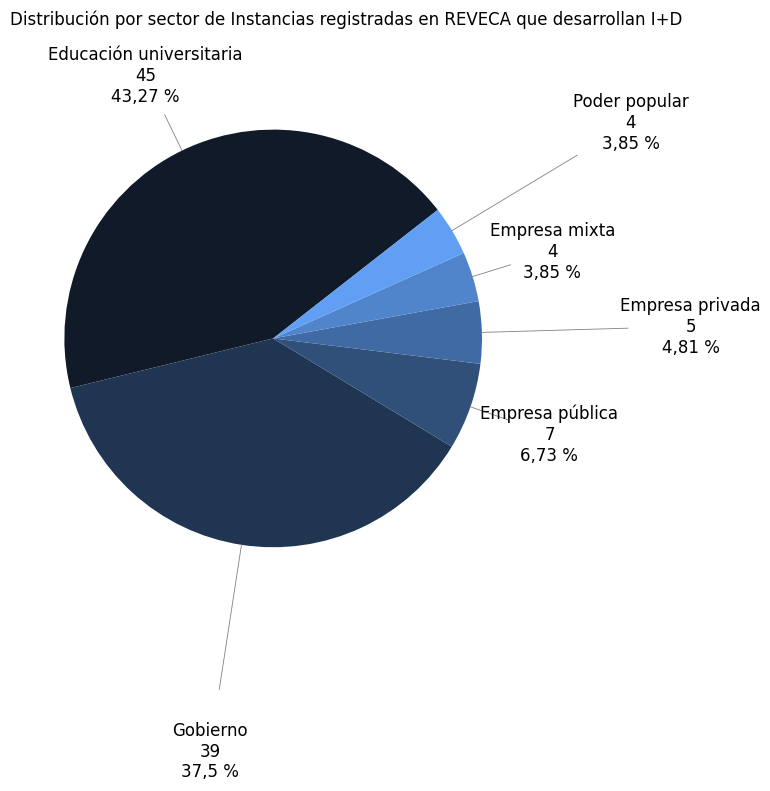

In [ ]:
# prompt: crea un gráfico de torta de la columna 'Sector' del dataframe 'filtered_instancia'
# Obtener los conteos de cada sector
sector_counts1 = df_filtrado['SECTOR'].value_counts()

# Crear el gráfico de torta
plt.figure(figsize=(8, 8))
b_color = [96, 159, 244]
color = generate_gradient_colors(b_color, len(sector_counts1))  # Usar la longitud de sector_counts

# Usar sector_counts.index para las etiquetas y sector_counts.values para los tamaños
plt.pie(sector_counts1.values, startangle=38, colors=color)
plt.axis('equal')  # Para asegurar que el gráfico sea un círculo



# Asignando sector_counts.values a siz
siz1 = sector_counts1.values

# Use `range(len(sector_counts))` to match the pie chart slices.
for i, sector1 in enumerate(sector_counts1.index): # Iterate through index and values of sector_counts
    # Calcular la posición de la etiqueta usando theta1 and theta2 attributes
    # Use the correct axes object. Since you're creating a new figure, use `plt.gca()` to get the current axes.
    ax = plt.gca()
    angle = np.deg2rad((ax.patches[i].theta1 + ax.patches[i].theta2) / 2)
    x = np.cos(angle)
    y = np.sin(angle)

    # Ajustar la distancia de las etiquetas al centro
    offset = 1.4 if i % 2 == 0 else 2 # Intercalar el offset para índices pares e impares

    # Crear la etiqueta con múltiples líneas y separadores de miles
    # Use sector instead of filtered_instancia['SECTOR'][i]
    ax.text(x * offset, y * offset, f"{sector1}\n{colocar_separador_miles(siz1[i])}\n{cambiar_separador(round(siz1[i] / sum(siz1) * 100, 2))} %",
            ha='center', va='center', fontsize=12)

    # Dibujar línea guía
    ax.plot([x, x * 0.85 * offset], [y, y * 0.85 * offset], color='gray', linestyle='-', linewidth=0.6)

plt.title('Distribución por sector de Instancias registradas en REVECA que desarrollan I+D', loc= 'center', y = 1.1)
plt.show()

A CONTINUACIÓN SE MUESTRA UN DATAFRAME CON LAS INSTANCIAS QUE INGRESARON AL REVECA, PERO NO HAN COMPLETADO EL REGISTRO DE SUS DATOS EN LA SECCIÓN DE DATOS DE INSTANCIAS (Sacar a excel para generar reporte)

In [ ]:
# Example usage (assuming 'instancia' is your DataFrame and 'RIF' is the column):
# Replace 'RIF' with the actual name of your column
filtered_instancia_null = filter_null_column(instancia, 'RIF')

"""
# Exportar el DataFrame filtered_instancia a un archivo Excel
filtered_instancia_null.to_excel('filtered_instancia_null.xlsx', index=False)

# Mostrar un mensaje de éxito
print('\nEl DataFrame ha sido exportado exitosamente a filtered_instancia_null.xlsx\n')
"""

filtered_instancia_null

RIF                          NOMBRE DE LA ORGANIZACIÓN  \
2    NaN  ASOCIACIÓN CIVIL, DEPORTIVA, EDUCATIVA Y CULTURAL   
4    NaN                   BANCO CENTRAL DE VENEZUELA (BCV)   
9    NaN  CENTRO NACIONAL DE INVESTIGACIÓN DE PESCA Y AC...   
10   NaN  CENTRO NACIONAL DE INVESTIGACIÓN, DESARROLLO E...   
14   NaN    CIRCUITO COMUNAL MATERNIDAD CONCEPCIÓN PALACIOS   
15   NaN  COLEGIO UNIVERSITARIO DE ENFERMERÍA CENTRO MÉD...   
17   NaN  COLEGIO UNIVERSITARIO DE REHABILITACIÓN MAY HA...   
18   NaN   COLEGIO UNIVERSITARIO PADRE ISAÍAS OJEDA (CUPIO)   
23   NaN                       CONSEJO COMUNAL VILLA TAMARE   
32   NaN  FUNDACIÓN CENTRO NACIONAL DE DESARROLLO E INVE...   
33   NaN                               FUNDACIÓN INFOCENTRO   
36   NaN  FUNDACIÓN INSTITUTOS DE ESTUDIOS AVANZADOS (IDEA)   
39   NaN  FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y L...   
48   NaN  FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y L...   
64   NaN  INSTITUTO DE ALTOS ESTUDIOS DE SEGURIDAD DE LA...   
66   NaN          INSTITUTO FORESTAL LATINOAMERICANO (IFLA)   
68   NaN  INSTITUTO NACIONAL DE METEOROLOGÍA E HIDROLOGÍ...   
69   NaN  INSTITUTO UNIVERSITARIO ADVENTISTA DE VENEZUEL...   
70   NaN  INSTITUTO UNIVERSITARIO DE AERONÁUTICA CIVIL M...   
71   NaN  INSTITUTO UNIVERSITARIO DE LA AUDICIÓN Y EL LE...   
72   NaN   INSTITUTO UNIVERSITARIO DE MERCADOTECNIA (ISUM)    
74   NaN  INSTITUTO UNIVERSITARIO DE TECNOLOGÍA ELÍAS CA...   
77   NaN  INSTITUTO UNIVERSITARIO DE TECNOLOGÍA POLYCOM ...   
79   NaN  INSTITUTO UNIVERSITARIO DE TECNOLOGÍA SUPERIOR...   
80   NaN  INSTITUTO UNIVERSITARIO PEDAGÓGICO MONSEÑOR RA...   
82   NaN  INSTITUTO VENEZOLANO DE INVESTIGACIONES CIENTÍ...   
88   NaN  MINISTERIO DEL PODER POPULAR PARA LA CULTURA (...   
89   NaN  MINISTERIO DEL PODER POPULAR PARA LA DEFENSA (...   
90   NaN  MINISTERIO DEL PODER POPULAR PARA LA EDUCACIÓN...   
92   NaN  MINISTERIO DEL PODER POPULAR PARA LA SALUD (MPPS)   
99   NaN                  TELECOMUNICACIONES MOVILNET, C.A.   
107  NaN                     UNIVERSIDAD DE LOS ANDES (ULA)   
117  NaN  UNIVERSIDAD NACIONAL EXPERIMENTAL DEL MAGISTER...   
129  NaN  UNIVERSIDAD POLITÉCNICA TERRITORIAL DE BARLOVE...   
138  NaN  UNIVERSIDAD POLITÉCNICA TERRITORIAL DEL ESTADO...   
142  NaN  UNIVERSIDAD POLITÉCNICA TERRITORIAL JOSÉ ANTON...   
145  NaN               UNIVERSIDAD PRIVADA MONTEÁVILA (UMA)   
147  NaN        UNIVERSIDAD TECNOLÓGICA DEL CENTRO (UNITEC)   
148  NaN  UNIVERSIDAD TERRITORIAL DELTAICA FRANCISCO TAM...   

                      SECTOR ESTADO MUNICIPIO PARROQUIA DIRECCIÓN LATITUD  \
2            Empresa privada    Nan       NaN       NaN       NaN     NaN   
4                   Gobierno    Nan       NaN       NaN       NaN     NaN   
9                   Gobierno    Nan       NaN       NaN       NaN     NaN   
10                  Gobierno    Nan       NaN       NaN       NaN     NaN   
14             Poder popular    Nan       NaN       NaN       NaN     NaN   
15   Educación universitaria    Nan       NaN       NaN       NaN     NaN   
17   Educación universitaria    Nan       NaN       NaN       NaN     NaN   
18   Educación universitaria    Nan       NaN       NaN       NaN     NaN   
23             Poder popular    Nan       NaN       NaN       NaN     NaN   
32                  Gobierno    Nan       NaN       NaN       NaN     NaN   
33                  Gobierno    Nan       NaN       NaN       NaN     NaN   
36                  Gobierno    Nan       NaN       NaN       NaN     NaN   
39                  Gobierno    Nan       NaN       NaN       NaN     NaN   
48                  Gobierno    Nan       NaN       NaN       NaN     NaN   
64                  Gobierno    Nan       NaN       NaN       NaN     NaN   
66                  Gobierno    Nan       NaN       NaN       NaN     NaN   
68                  Gobierno    Nan       NaN       NaN       NaN     NaN   
69   Educación universitaria    Nan       NaN       NaN       NaN     NaN   
70   Educación univer

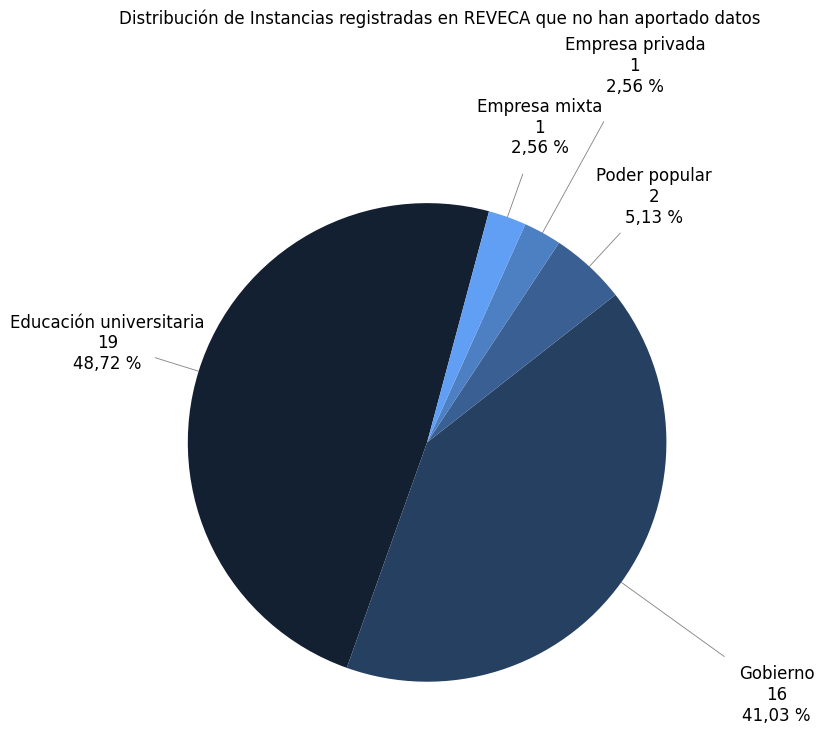

In [ ]:
# prompt: crea un gráfico de torta de la columna 'Sector' del dataframe 'filtered_instancia'
# Obtener los conteos de cada sector
sector_counts2 = filtered_instancia_null['SECTOR'].value_counts()

# Crear el gráfico de torta
plt.figure(figsize=(8, 8))
b_color = [96, 159, 244]
color = generate_gradient_colors(b_color, len(sector_counts2))  # Usar la longitud de sector_counts

# Usar sector_counts.index para las etiquetas y sector_counts.values para los tamaños
plt.pie(sector_counts2.values, startangle=75, colors=color)
plt.axis('equal')  # Para asegurar que el gráfico sea un círculo



# Asignando sector_counts.values a siz
siz2 = sector_counts2.values

# Use `range(len(sector_counts))` to match the pie chart slices.
for i, sector2 in enumerate(sector_counts2.index): # Iterate through index and values of sector_counts
    # Calcular la posición de la etiqueta usando theta1 and theta2 attributes
    # Use the correct axes object. Since you're creating a new figure, use `plt.gca()` to get the current axes.
    ax = plt.gca()
    angle = np.deg2rad((ax.patches[i].theta1 + ax.patches[i].theta2) / 2)
    x = np.cos(angle)
    y = np.sin(angle)

    # Ajustar la distancia de las etiquetas al centro
    offset = 1.4 if i % 2 == 0 else 1.8 # Intercalar el offset para índices pares e impares
    #offset = 1.35  # Colocar distancia de las etiquetas a la torta

    # Crear la etiqueta con múltiples líneas y separadores de miles
    # Use sector instead of filtered_instancia['SECTOR'][i]
    ax.text(x * offset, y * offset, f"{sector2}\n{colocar_separador_miles(siz2[i])}\n{cambiar_separador(round(siz2[i] / sum(siz2) * 100, 2))} %",
            ha='center', va='center', fontsize=12)

    # Dibujar línea guía
    ax.plot([x, x * 0.85 * offset], [y, y * 0.85 * offset], color='gray', linestyle='-', linewidth=0.6)

plt.title('Distribución de Instancias registradas en REVECA que no han aportado datos', loc= 'center', y = 1.1)
plt.show()

In [ ]:
# Lista de columnas a eliminar
columnas_a_eliminar = ['ESTADO', 'MUNICIPIO', 'PARROQUIA', 'DIRECCIÓN',
                       'LATITUD', 'LONGITUD', 'NÚMERO DE TELEFONO', 'TELEGRAM',
                       'FACEBOOK', 'INSTAGRAM', 'PÁGINA WEB', 'CORREO OFICIAL',
                       'CORREO MAS USADO', 'CLASIFICACIÓN POR ACTIVIDAD ECONOMICA',
                       'CLASIFICACIÓN POR TAMAÑO', 'CLASIFICACIÓN POR TIPO', 'DESARROLLA ACTIVIDADES VINCULADAS A I+D',
                       'RL CÉDULA', 'RL PRIMER NOMBRE', 'RL SEGUNDO NOMBRE', 'RL PRIMER APELLIDO',
                       'RL SEGUNDO APELLIDO', 'RL CARGO', 'RL TELEFONO', 'RIF']

# Llama a la función para eliminar las columnas
df_resultado = eliminar_columnas(filtered_instancia_null, columnas_a_eliminar)

agrupar_y_crear_excel(df_resultado)

Archivo Excel 'organizaciones_por_sector_sin_datos.xlsx' creado con éxito.


# 2. UNIDADES I+D

A CONTINUACIÓN SE MUESTRA UN DATAFRAME CON LAS INSTANCIAS QUE YA HAN INGRESADO EN LA SECCIÓN DE UNIDADES I+D

In [ ]:
#cambio de nombre de la columna originamente llamada 'INSTANCIA' por 'ID' e 'ID INSTANCIA' por 'ID UNIDAD'
unidadesIyD.rename(columns={'INSTANCIA': 'NOMBRE DE LA ORGANIZACIÓN'}, inplace=True)
unidadesIyD.drop_duplicates(subset=['NOMBRE DE LA UNIDAD'], inplace=True)

unidadesIyD

# Exportar el DataFrame unidadesIyD a un archivo Excel
unidadesIyD.to_excel('Reporte_UNIDADES_DEP.xlsx', index=False)

# Mostrar un mensaje de éxito
print('\nEl DataFrame ha sido exportado exitosamente a Reporte_UNIDADES_DEP.xlsx.xlsx\n')

unidadesIyD


El DataFrame ha sido exportado exitosamente a Reporte_UNIDADES_DEP.xlsx.xlsx



NOMBRE DE LA ORGANIZACIÓN  \
0    ACADEMIA DE CIENCIAS AGRÍCOLAS DE VENEZUELA (A...   
1    AGENCIA BOLIVARIANA PARA ACTIVIDADES ESPACIALE...   
2    AGENCIA BOLIVARIANA PARA ACTIVIDADES ESPACIALE...   
3    AGENCIA BOLIVARIANA PARA ACTIVIDADES ESPACIALE...   
4    AGENCIA BOLIVARIANA PARA ACTIVIDADES ESPACIALE...   
..                                                 ...   
779                  UNIVERSIDAD RAFAEL URDANETA (URU)   
780                  UNIVERSIDAD RAFAEL URDANETA (URU)   
781                          UNIVERSIDAD YACAMBÚ (UNY)   
782                          UNIVERSIDAD YACAMBÚ (UNY)   
783                          UNIVERSIDAD YACAMBÚ (UNY)   

                      SECTOR  \
0                   GOBIERNO   
1                   GOBIERNO   
2                   GOBIERNO   
3                   GOBIERNO   
4                   GOBIERNO   
..                       ...   
779  EDUCACIÓN UNIVERSITARIA   
780  EDUCACIÓN UNIVERSITARIA   
781  EDUCACIÓN UNIVERSITARIA   
782  EDUCACIÓN UNIVERSITARIA   
783  EDUCACIÓN UNIVERSITARIA   

                                   NOMBRE DE LA UNIDAD CONDICIÓN  \
0    DIRECCIóN DE INVESTIGACION E INNOVACION PRODUC...    ÓPTIMA   
1                                                  CBS   REGULAR   
2                                                  DAE    ÓPTIMA   
3                                                 DCNR     BUENA   
4                                                DII_1     BUENA   
..                                                 ...       ...   
779     LABORATORIO DE MATERIALES, SUELOS Y PAVIMENTOS    ÓPTIMA   
780                             LABORATORIO DE QUÍMICA    ÓPTIMA   
781                         COMUNICACIóN DE LA CIENCIA     BUENA   
782                        GESTIóN DE LA INVESTIGACIóN    ÓPTIMA   
783             INNOVACIóN Y TRASNFERENCIA TECNOLóGICA     BUENA   

     PROPORCIÓN EN METROS CUADRADOS    ESTADO                 MUNICIPIO  \
0                              32.0   BARINAS  ALBERTO ARVELO TORREALBA   
1                               6.0   MIRANDA                     SUCRE   
2                               NaN   MIRANDA                    CHACAO   
3                              20.0   MIRANDA                     SUCRE   
4                               NaN  CARABOBO            PUERTO CABELLO   
..                              ...       ...                       ...   
779                            56.0     ZULIA                 MARACAIBO   
780                            56.0     ZULIA                 MARACAIBO   
781                             2.0      LARA                PALAVECINO   
782                             4.0      LARA                PALAVECINO   
783                            80.0      LARA                PALAVECINO   

                  PARROQUIA  \
0       RODRÍGUEZ DOMÍNGUEZ   
1          LEONCIO MARTINEZ   
2                    CHACAO   
3          LEONCIO MARTINEZ   
4       NO URBANA BORBURATA   
..                      ...   
779             SANTA LUCIA   
780             SANTA LUCIA   
781  JOSÉ GREGORIO BASTIDAS   
782  JOSÉ GREGORIO BASTIDAS   
783  JOSÉ GREGORIO BASTIDAS   

                                             DIRECCIÓN             LATITUD  \
0      CARRETERA VìA BALCONCITO, SECTOR QUEBRADA NEGRA  08 ° 55 ' 06.19 ''   
1              BASE A[EREA GENERALISIMO FCO DE MIRANDA  10 ° 29 ' 60.11 ''   
2    EDIFICIO DE LA COMANDANCIA GENERAL DE LA AVIAC...  10 ° 29 ' 15.82 ''   
3    BASE AEREA GENERALISIMO FRANCISCO DE MIRANDA, ...  10 ° 29 ' 11.51 ''   
4                                            BORBURATA  10 ° 45 ' 45.41 ''   
..                                                 ...                 ...   
779  SECTOR VEREDAD DEL LAGO, AV. 2 EL MILAGRO CON ...  10 ° 64 ' 83.35 ''   
780  SECTOR VEREDA DEL LAGO, AVE 2 (EL MILAGRO) CON...  10 ° 64 ' 83.35 ''   
781  CALLE 1A ENTRE AVENIDAS 3 Y 4 URB. PARQUE RESI...  10 ° 01 ' 70.61 ''   
782  PARQUE RESIDENCIAL LA MORA, CALLE 1A ENTRE AVE...  10 ° 01 ' 70.61 ''  

A CONTINUACIÓN SE MUESTRA UN DATAFRAME CON LA INTERSECCIÓN DEL DATAFRAME 'instancia' Y EL DATAFRAME 'unidadesIyD', EL CUAL MUESTRA LAS INSTANCIAS QUE HAN REGISTRADO UNIDADES I+D

In [ ]:
unidades_merge = pd.merge(instancia, unidadesIyD, on='NOMBRE DE LA ORGANIZACIÓN', how='inner')

"""
# Lista de columnas a eliminar
columns_to_drop = ['TELEGRAM', 'FACEBOOK', 'INSTAGRAM', 'PÁGINA WEB',
                   'CORREO OFICIAL', 'CORREO MAS USADO', 'CLASIFICACIÓN POR ACTIVIDAD ECONOMICA', 'CLASIFICACIÓN POR TAMAÑO',
                   'CLASIFICACIÓN POR TIPO', 'DESARROLLA ACTIVIDADES VINCULADAS A I+D', 'ESTADO_x', 'MUNICIPIO_x',
                   'PARROQUIA_x', 'DIRECCIÓN_x', 'LATITUD_x', 'LONGITUD_x']

# Eliminar las columnas especificadas
unidades_merge = unidades_merge.drop(columns=columns_to_drop)
"""


# Exportar el DataFrame df_copy a un archivo Excel
unidades_merge.to_excel('unidades_merge.xlsx', index=False)

# Mostrar un mensaje de éxito
print('\nEl DataFrame ha sido exportado exitosamente a unidades_merge.xlsx\n')


unidades_merge


El DataFrame ha sido exportado exitosamente a unidades_merge.xlsx



RIF                          NOMBRE DE LA ORGANIZACIÓN  \
0    G-20009847-3  ACADEMIA DE CIENCIAS AGRÍCOLAS DE VENEZUELA (A...   
1    G-20008147-3  AGENCIA BOLIVARIANA PARA ACTIVIDADES ESPACIALE...   
2    G-20008147-3  AGENCIA BOLIVARIANA PARA ACTIVIDADES ESPACIALE...   
3    G-20008147-3  AGENCIA BOLIVARIANA PARA ACTIVIDADES ESPACIALE...   
4    G-20008147-3  AGENCIA BOLIVARIANA PARA ACTIVIDADES ESPACIALE...   
..            ...                                                ...   
771  J-07009697-7                  UNIVERSIDAD RAFAEL URDANETA (URU)   
772  J-07009697-7                  UNIVERSIDAD RAFAEL URDANETA (URU)   
773  J-08515699-2                          UNIVERSIDAD YACAMBÚ (UNY)   
774  J-08515699-2                          UNIVERSIDAD YACAMBÚ (UNY)   
775  J-08515699-2                          UNIVERSIDAD YACAMBÚ (UNY)   

                    SECTOR_x ESTADO_x               MUNICIPIO_x  \
0                   Gobierno  Barinas  ALBERTO ARVELO TORREALBA   
1                   Gobierno  Miranda                    CHACAO   
2                   Gobierno  Miranda                    CHACAO   
3                   Gobierno  Miranda                    CHACAO   
4                   Gobierno  Miranda                    CHACAO   
..                       ...      ...                       ...   
771  Educación universitaria    Zulia                 MARACAIBO   
772  Educación universitaria    Zulia                 MARACAIBO   
773  Educación universitaria     Lara                PALAVECINO   
774  Educación universitaria     Lara                PALAVECINO   
775  Educación universitaria     Lara                PALAVECINO   

                PARROQUIA_x  \
0       RODRÍGUEZ DOMÍNGUEZ   
1                    CHACAO   
2                    CHACAO   
3                    CHACAO   
4                    CHACAO   
..                      ...   
771             SANTA LUCIA   
772             SANTA LUCIA   
773  JOSÉ GREGORIO BASTIDAS   
774  JOSÉ GREGORIO BASTIDAS   
775  JOSÉ GREGORIO BASTIDAS   

                                           DIRECCIÓN_x           LATITUD_x  \
0     carretera vía balconcito, sector quebrada negra.  08 ° 55 ' 06.19 ''   
1    CALLE BASE AEREA GENERALISIMO FRANCISCO DE MIR...  10 ° 48 ' 57.06 ''   
2    CALLE BASE AEREA GENERALISIMO FRANCISCO DE MIR...  10 ° 48 ' 57.06 ''   
3    CALLE BASE AEREA GENERALISIMO FRANCISCO DE MIR...  10 ° 48 ' 57.06 ''   
4    CALLE BASE AEREA GENERALISIMO FRANCISCO DE MIR...  10 ° 48 ' 57.06 ''   
..                                                 ...                 ...   
771  sector vereda del lago, avenida 2 el milagro c...  10 ° 64 ' 83.35 ''   
772  sector vereda del lago, avenida 2 el milagro c...  10 ° 64 ' 83.35 ''   
773  Calle 1A entre carreras 3y 4 urbanización parq...  10 ° 01 ' 70.61 ''   
774  Calle 1A entre carreras 3y 4 urbanización parq...  10 ° 01 ' 70.61 ''   
775  Calle 1A entre carreras 3y 4 urbanización parq...  10 ° 01 ' 70.61 ''   

             LONGITUD_x NÚMERO DE TELEFONO  ...  ESTADO_y  \
0    70 ° 04 ' 21.65 ''  (0273) 532 - 4095  ...   BARINAS   
1    66 ° 83 ' 67.42 ''  (0212) 207 - 5441  ...   MIRANDA   
2    66 ° 83 ' 67.42 ''  (0212) 207 - 5441  ...   MIRANDA   
3    66 ° 83 ' 67.42 ''  (0212) 207 - 5441  ...   MIRANDA   
4    66 ° 83 ' 67.42 ''  (0212) 207 - 5441  ...  CARABOBO   
..                  ...                ...  ...       ...   
771  71 ° 59 ' 14.20 ''  (0261) 200 - 0818  ...     ZULIA   
772  71 ° 59 ' 14.20 ''  (0261) 200 - 0818  ...     ZULIA   
773  69 ° 24 ' 35.56 ''  (0251) 710 - 2137  ...      LARA   
774  69 ° 24 ' 35.56 ''  (0251) 710 - 2137  ...      LARA   
775  69 ° 24 ' 35.56 ''  (0251) 710 - 2137  ...      LARA   

                  MUNICIPIO_y             PARROQUIA_y  \
0    ALBERTO ARVELO TORREALBA     RODRÍGUEZ DOMÍNGUEZ   
1                       SUCRE        LEONCIO MARTINEZ   
2                      CHACAO                  CHACAO   
3                       SUCRE        LEONCIO MARTINEZ   
4              P

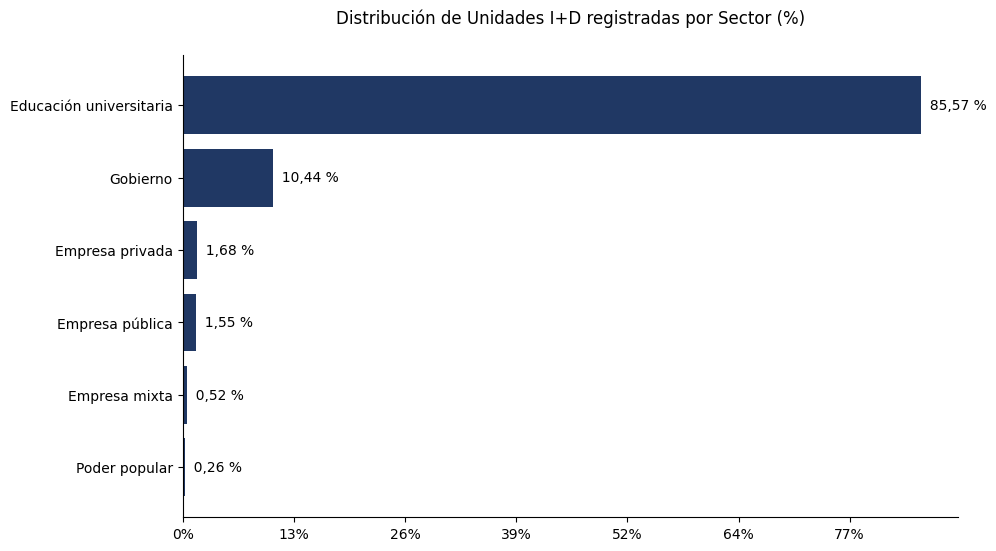

In [ ]:
# prompt: para el dataframe 'unidades_merge' escribe un código para hacer un gráfico de barras horizontales con la columna 'SECTOR', los valores de esta columna deben mostrarse de forma descendente en el gráfico

# Assuming 'unidades_merge' is your DataFrame
sector_counts = unidades_merge['SECTOR_x'].value_counts().sort_values(ascending=True)

# Create the horizontal bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
bars = plt.barh(sector_counts.index, sector_counts.values, color='#203864')
#sector_counts.sort_values(ascending=True).plot(kind='barh')

# Eliminar las líneas superior y derecha
for spine in ['top', 'right']:
    plt.gca().spines[spine].set_visible(False)

locale.setlocale(locale.LC_ALL, '')  # Set locale based on your system settings

# Formatear el eje horizontal para mostrar porcentajes
#     Calcular el total para convertir a porcentaje
total = sector_counts.sum()

ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/total:.0%}'))

# Agregar etiquetas de datos a cada barra con porcentajes a cada barra
size = sector_counts.values
i=0
for bar in bars:
  width = bar.get_width()
  plt.text(width, bar.get_y() + bar.get_height()/2,
          f'  {cambiar_separador(round(size[i]/sum(size)*100, 2))} %',
          ha='left', va='center')
  i+=1

# Etiquetas de los ejes
# plt.xlabel('Count') # Nombre eje horizontal
# plt.ylabel('Sector') # Nombre eje vertical
plt.title('Distribución de Unidades I+D registradas por Sector (%)', loc = 'center', y = 1.05)


# Mostrar gráfico
plt.show()


Formato español aplicado


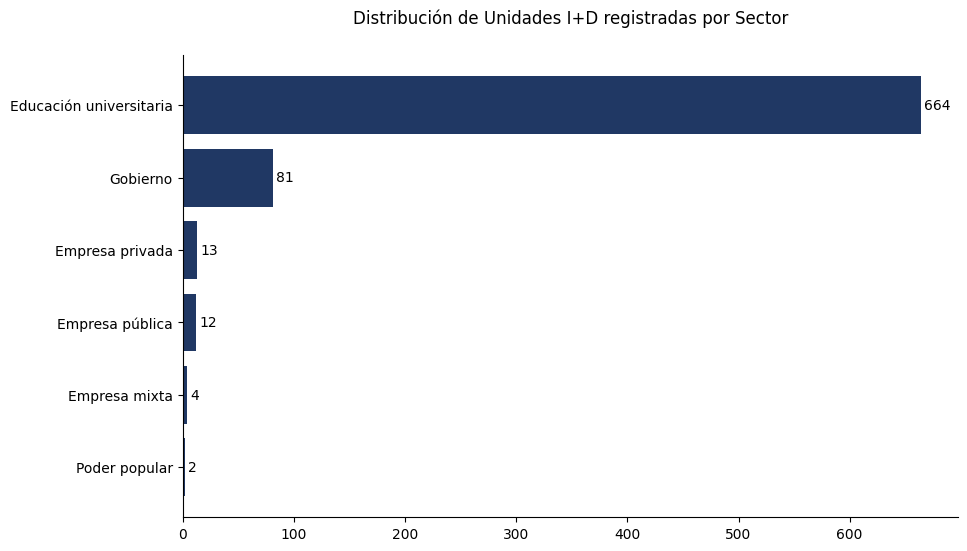

In [ ]:
# Assuming 'unidades_merge' is your DataFrame
sector_counts1 = unidades_merge['SECTOR_x'].value_counts().sort_values(ascending=True)

# Create the horizontal bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
bars1 = plt.barh(sector_counts1.index, sector_counts1.values, color='#203864')

# Eliminar las líneas superior y derecha
for spine in ['top', 'right']:
    plt.gca().spines[spine].set_visible(False)


# Configurar la localización para utilizar puntos como separadores de miles en español
try:
    locale.setlocale(locale.LC_ALL, 'es_ES.UTF-8')
except locale.Error:
    try:
        locale.setlocale(locale.LC_ALL, 'es_ES')
    except locale.Error:
        locale.setlocale(locale.LC_ALL, '')
        print("Formato español aplicado")

# Formatear el eje horizontal para mostrar separadores de miles
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: cambiar_separadores(locale.format_string("%d", int(x), grouping=True))))


# Parámetro para ajustar la distancia de las etiquetas
padding = 3  # Ajusta este valor según lo necesites

# Agregar etiquetas de datos a cada barra con separadores de miles
for bar in bars:
    width = bar.get_width()
    plt.text(width + padding, bar.get_y() + bar.get_height()/2,
             cambiar_separadores(locale.format_string("%d", int(width), grouping=True)),
             ha='left', va='center')

# Etiquetas de los ejes
plt.title('Distribución de Unidades I+D registradas por Sector', loc = 'center', y = 1.05)

# Mostrar gráfico
plt.show()

Número de unidades REGISTRADAS por Instancia

In [ ]:


# Ejemplo de uso (asumiendo que ya tienes tu DataFrame 'unidades_merge')
nombre_archivo = 'Número_Unidades_registradas_por_instancias_por_sector.xlsx'
agrupar_y_exportar_por_sector(unidades_merge, nombre_archivo)
print(f"Archivo Excel '{nombre_archivo}' creado exitosamente.")

Archivo Excel 'Número_Unidades_registradas_por_instancias_por_sector.xlsx' creado exitosamente.


Número de unidades registradas CON DATOS

In [ ]:
filtered_unidadesIyD = filter_non_null_column(unidades_merge, 'CONDICIÓN')

filtered_unidadesIyD

RIF                          NOMBRE DE LA ORGANIZACIÓN  \
0    G-20009847-3  ACADEMIA DE CIENCIAS AGRÍCOLAS DE VENEZUELA (A...   
1    G-20008147-3  AGENCIA BOLIVARIANA PARA ACTIVIDADES ESPACIALE...   
2    G-20008147-3  AGENCIA BOLIVARIANA PARA ACTIVIDADES ESPACIALE...   
3    G-20008147-3  AGENCIA BOLIVARIANA PARA ACTIVIDADES ESPACIALE...   
4    G-20008147-3  AGENCIA BOLIVARIANA PARA ACTIVIDADES ESPACIALE...   
..            ...                                                ...   
771  J-07009697-7                  UNIVERSIDAD RAFAEL URDANETA (URU)   
772  J-07009697-7                  UNIVERSIDAD RAFAEL URDANETA (URU)   
773  J-08515699-2                          UNIVERSIDAD YACAMBÚ (UNY)   
774  J-08515699-2                          UNIVERSIDAD YACAMBÚ (UNY)   
775  J-08515699-2                          UNIVERSIDAD YACAMBÚ (UNY)   

                    SECTOR_x ESTADO_x               MUNICIPIO_x  \
0                   Gobierno  Barinas  ALBERTO ARVELO TORREALBA   
1                   Gobierno  Miranda                    CHACAO   
2                   Gobierno  Miranda                    CHACAO   
3                   Gobierno  Miranda                    CHACAO   
4                   Gobierno  Miranda                    CHACAO   
..                       ...      ...                       ...   
771  Educación universitaria    Zulia                 MARACAIBO   
772  Educación universitaria    Zulia                 MARACAIBO   
773  Educación universitaria     Lara                PALAVECINO   
774  Educación universitaria     Lara                PALAVECINO   
775  Educación universitaria     Lara                PALAVECINO   

                PARROQUIA_x  \
0       RODRÍGUEZ DOMÍNGUEZ   
1                    CHACAO   
2                    CHACAO   
3                    CHACAO   
4                    CHACAO   
..                      ...   
771             SANTA LUCIA   
772             SANTA LUCIA   
773  JOSÉ GREGORIO BASTIDAS   
774  JOSÉ GREGORIO BASTIDAS   
775  JOSÉ GREGORIO BASTIDAS   

                                           DIRECCIÓN_x           LATITUD_x  \
0     carretera vía balconcito, sector quebrada negra.  08 ° 55 ' 06.19 ''   
1    CALLE BASE AEREA GENERALISIMO FRANCISCO DE MIR...  10 ° 48 ' 57.06 ''   
2    CALLE BASE AEREA GENERALISIMO FRANCISCO DE MIR...  10 ° 48 ' 57.06 ''   
3    CALLE BASE AEREA GENERALISIMO FRANCISCO DE MIR...  10 ° 48 ' 57.06 ''   
4    CALLE BASE AEREA GENERALISIMO FRANCISCO DE MIR...  10 ° 48 ' 57.06 ''   
..                                                 ...                 ...   
771  sector vereda del lago, avenida 2 el milagro c...  10 ° 64 ' 83.35 ''   
772  sector vereda del lago, avenida 2 el milagro c...  10 ° 64 ' 83.35 ''   
773  Calle 1A entre carreras 3y 4 urbanización parq...  10 ° 01 ' 70.61 ''   
774  Calle 1A entre carreras 3y 4 urbanización parq...  10 ° 01 ' 70.61 ''   
775  Calle 1A entre carreras 3y 4 urbanización parq...  10 ° 01 ' 70.61 ''   

             LONGITUD_x NÚMERO DE TELEFONO  ...               MUNICIPIO_y  \
0    70 ° 04 ' 21.65 ''  (0273) 532 - 4095  ...  ALBERTO ARVELO TORREALBA   
1    66 ° 83 ' 67.42 ''  (0212) 207 - 5441  ...                     SUCRE   
2    66 ° 83 ' 67.42 ''  (0212) 207 - 5441  ...                    CHACAO   
3    66 ° 83 ' 67.42 ''  (0212) 207 - 5441  ...                     SUCRE   
4    66 ° 83 ' 67.42 ''  (0212) 207 - 5441  ...            PUERTO CABELLO   
..                  ...                ...  ...                       ...   
771  71 ° 59 ' 14.20 ''  (0261) 200 - 0818  ...                 MARACAIBO   
772  71 ° 59 ' 14.20 ''  (0261) 200 - 0818  ...                 MARACAIBO   
773  69 ° 24 ' 35.56 ''  (0251) 710 - 2137  ...                PALAVECINO   
774  69 ° 24 ' 35.56 ''  (0251) 710 - 2137  ...                PALAVECINO   
775  69 ° 24 ' 35.56 ''  (0251) 710 - 2137  ...                PALAVECINO   

                PARROQUIA_y  \
0       RODRÍGUEZ DOMÍNGUEZ   
1          LEONCIO MARTINEZ   
2               

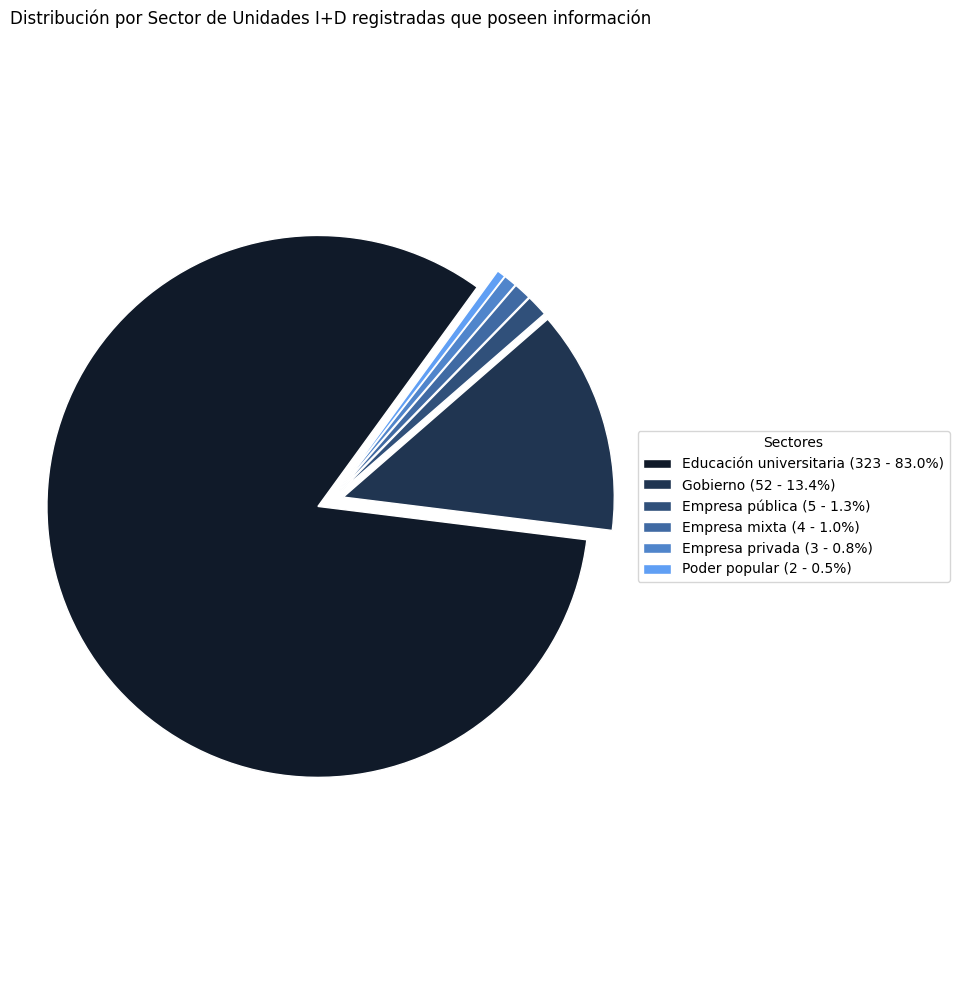

In [ ]:
# Assuming 'filtered_unidadesIyD' DataFrame exists and has a 'SECTOR' column
plt.figure(figsize=(10, 10))  # Slightly larger figure for better label spacing

# Get sector counts
sector_counts = filtered_unidadesIyD['SECTOR_x'].value_counts()
total = sector_counts.sum()

# Create gradient colors
base_color = [96, 159, 244]
colors = generate_gradient_colors(base_color, len(sector_counts))

# Create pie chart with more separation between slices (explode)
explode = [0.05] * len(sector_counts)  # Slightly separate all slices
wedges, texts = plt.pie(sector_counts.values,
                       colors=colors,
                       startangle=54,
                       explode=explode,
                       wedgeprops={'linewidth': 1, 'edgecolor': 'white'})

plt.axis('equal')  # Ensure pie is drawn as a circle

# Create a legend with percentages and counts
legend_labels = [f"{sector} ({count:,} - {count/total:.1%})"
                for sector, count in sector_counts.items()]
plt.legend(wedges, legend_labels,
          title="Sectores",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

# Add title with more informative positioning
plt.title('Distribución por Sector de Unidades I+D registradas que poseen información', fontsize=12)

# Alternatively, if you prefer labels outside with leader lines:
plt.tight_layout()  # Adjust layout to prevent label clipping
plt.subplots_adjust(left=0.1, right=0.7)  # Make space for labels

plt.show()

In [ ]:
nombre_archivo1 = 'Número_Unidades_registradas_por_instancias_por_sector_CONDATOS.xlsx'
agrupar_y_exportar_por_sector(filtered_unidadesIyD, nombre_archivo1)
print(f"Archivo Excel '{nombre_archivo1}' creado exitosamente.")

Archivo Excel 'Número_Unidades_registradas_por_instancias_por_sector_CONDATOS.xlsx' creado exitosamente.


Número de unidades registradas SIN DATOS

In [ ]:
faltantes = filter_null_column(unidades_merge, 'CONDICIÓN')

faltantes

RIF                          NOMBRE DE LA ORGANIZACIÓN  \
16   G-20017212-6  CENTRO DE INVESTIGACIONES CIENTÍFICAS PARA LA ...   
18   J-00058551-2          CENTRO MÉDICO DOCENTE LA TRINIDAD (CMDLT)   
23   G-20010269-1  CENTRO NACIONAL DE INVESTIGACIÓN Y CERTIFICACI...   
24   G-20004417-9  CENTRO NACIONAL DE TECNOLOGÍA DE INOFORMACIÓN ...   
28   G-20011386-3  COMISIÓN NACIONAL DE LAS TECNOLOGÍAS DE INFORM...   
..            ...                                                ...   
752  J-07034507-1  UNIVERSIDAD PRIVADA DR. RAFAEL BELLOSO CHACÍN ...   
757  J-07034507-1  UNIVERSIDAD PRIVADA DR. RAFAEL BELLOSO CHACÍN ...   
758  J-07034507-1  UNIVERSIDAD PRIVADA DR. RAFAEL BELLOSO CHACÍN ...   
759  J-07034507-1  UNIVERSIDAD PRIVADA DR. RAFAEL BELLOSO CHACÍN ...   
761  J-07034507-1  UNIVERSIDAD PRIVADA DR. RAFAEL BELLOSO CHACÍN ...   

                    SECTOR_x          ESTADO_x      MUNICIPIO_x  \
16                  Gobierno          Amazonas  AUTÓNOMO ATURES   
18           Empresa privada           Miranda           BARUTA   
23                  Gobierno           Miranda           BARUTA   
24                  Gobierno  Distrito capital       LIBERTADOR   
28                  Gobierno  Distrito capital       LIBERTADOR   
..                       ...               ...              ...   
752  Educación universitaria             Zulia        MARACAIBO   
757  Educación universitaria             Zulia        MARACAIBO   
758  Educación universitaria             Zulia        MARACAIBO   
759  Educación universitaria             Zulia        MARACAIBO   
761  Educación universitaria             Zulia        MARACAIBO   

            PARROQUIA_x                                        DIRECCIÓN_x  \
16   LUIS ALBERTO GÓMEZ  Av. El Ejercito, cruce con principal de jose m...   
18               BARUTA            Av. Intercomunal La Trinidad El Hatillo   
23               BARUTA  Polo Científico Tecnológico Venezolano, ubicad...   
24             CATEDRAL  av universidad, esquina el chorro, edificio aj...   
28             CATEDRAL  AV. UNIVERSIDAD, ESQUINA EL CHORRO, TORRE MINI...   
..                  ...                                                ...   
752      JUANA DE AVILA  Circunvalación no. 2, frente a la plaza de tor...   
757      JUANA DE AVILA  Circunvalación no. 2, frente a la plaza de tor...   
758      JUANA DE AVILA  Circunvalación no. 2, frente a la plaza de tor...   
759      JUANA DE AVILA  Circunvalación no. 2, frente a la plaza de tor...   
761      JUANA DE AVILA  Circunvalación no. 2, frente a la plaza de tor...   

              LATITUD_x          LONGITUD_x NÚMERO DE TELEFONO  ...  \
16   05 ° 64 ' 53.98 ''  67 ° 60 ' 14.26 ''  (0426) 520 - 4185  ...   
18   10 ° 43 ' 13.25 ''  66 ° 85 ' 52.48 ''  (0212) 949 - 6449  ...   
23   10 ° 40 ' 34.39 ''  66 ° 88 ' 87.68 ''  (0412) 398 - 0043  ...   
24   10 ° 50 ' 36.00 ''  66 ° 91 ' 20.00 ''  (0424) 190 - 6636  ...   
28   10 ° 50 ' 36.17 ''  66 ° 91 ' 18.90 ''  (0212) 535 - 8955  ...   
..                  ...                 ...                ...  ...   
752  10 ° 38 ' 00.71 ''  71 ° 64 ' 59.66 ''  (0261) 200 - 8901  ...   
757  10 ° 38 ' 00.71 ''  71 ° 64 ' 59.66 ''  (0261) 200 - 8901  ...   
758  10 ° 38 ' 00.71 ''  71 ° 64 ' 59.66 ''  (0261) 200 - 8901  ...   
759  10 ° 38 ' 00.71 ''  71 ° 64 ' 59.66 ''  (0261) 200 - 8901  ...   
761  10 ° 38 ' 00.71 ''  71 ° 64 ' 59.66 ''  (0261) 200 - 8901  ...   

    MUNICIPIO_y PARROQUIA_y DIRECCIÓN_y LATITUD_y LONGITUD_y  \
16          NaN         NaN         NaN       NaN        NaN   
18          NaN         NaN         NaN       NaN        NaN   
23          NaN         NaN         NaN       NaN        NaN   
24          NaN         NaN         NaN       NaN        NaN   
28          NaN         NaN         NaN       NaN        NaN   
..          ...         ...         ...       ...        ...   
752         NaN         NaN         NaN       NaN        NaN   
757         NaN         NaN         NaN   

In [ ]:
nombre_archivo2 = 'Número_Unidades_registradas_por_instancias_por_sector_SINDATOS.xlsx'
agrupar_y_exportar_por_sector(faltantes, nombre_archivo2)
print(f"Archivo Excel '{nombre_archivo2}' creado exitosamente.")

Archivo Excel 'Número_Unidades_registradas_por_instancias_por_sector_SINDATOS.xlsx' creado exitosamente.


In [ ]:
personal.rename(columns={'INSTANCIA': 'NOMBRE DE LA ORGANIZACIÓN', 'UNIDAD': 'NOMBRE DE LA UNIDAD'}, inplace=True)

personal

CEDULA NACIONALIDAD               NOMBRES           APELLIDOS  \
0     14247340            V         AARON ALBERTO       MUÑOZ MORALES   
1      8622864            V          ABEL VICENTE     FLAMES GONZALEZ   
2     15682177            V    ABELARDO ALEXANDER     PEREZ HERNANDEZ   
3     19461258            V     ABRAHAM DE  JESUS   FERNANDEZ SANCHEZ   
4     23004540            V        ABRAHAN MILLAN     GRATEROL BRAQUE   
...        ...          ...                   ...                 ...   
3536  27679737            V        ZULJEY GREIMAR  TRUJILLO RODRIGUEZ   
3537   8791491            V        ZULMA JOSEFINA     RODRIGUEZ PONCE   
3538   5887102            V        ZULY DEL VALLE       MILLAN BOADAS   
3539  12178462            V        ZULYS BEATRIZ     JIMÉNEZ  ROMERO    
3540  11005323            V  ZURI ZADAY DEL VALLE        GOITE AZOCAR   

                            EMAIL  EDAD ESTATUS REGISTRO  \
0        aamunozmorales@gmail.com    46           Activo   
1            abelflames@gmail.com    61           Activo   
2       abelardo.perez6@gmail.com    41           Activo   
3       afernandez.cntq@gmail.com    35           Activo   
4     abrahangraterol16@gmail.com    30           Activo   
...                           ...   ...              ...   
3536     trujillozuljey@gmail.com    24           Activo   
3537    rodriguezulma65@gmail.com    59           Activo   
3538            zumibo2@yahoo.com    63           Activo   
3539      zulyjimenez21@gmail.com    52           Activo   
3540            goite27@gmail.com    55           Activo   

                     NIVEL ESTUDIO                 PROFESION  \
0                        DOCTORADO                    FÍSICA   
1                        DOCTORADO                 EDUCACIÓN   
2                       INGENIERÍA               INFORMÁTICA   
3                       INGENIERÍA    INGENIERÍA METALÚRGICA   
4                       INGENIERÍA  INGENIERÍA DE PRODUCCIÓN   
...                            ...                       ...   
3536  LICENCIATURA U OTRO PREGRADO                   TURISMO   
3537                      MAESTRÍA                  ECOLOGÍA   
3538                      MAESTRÍA                 EDUCACIÓN   
3539                      MAESTRÍA                  HISTORIA   
3540  LICENCIATURA U OTRO PREGRADO            ADMINISTRACIÓN   

                         AREA  ...                 CLASIFICACION  \
0          CIENCIAS NATURALES  ...  INVESTIGADOR O INVESTIGADORA   
1         ARTES Y HUMANIDADES  ...  INVESTIGADOR O INVESTIGADORA   
2     INGENIERÍA Y TECNOLOGÍA  ...                           NaN   
3     INGENIERÍA Y TECNOLOGÍA  ...  INVESTIGADOR O INVESTIGADORA   
4          CIENCIAS AGRÍCOLAS  ...              PERSONAL TÉCNICO   
...                       ...  ...                           ...   
3536        CIENCIAS SOCIALES  ...  INVESTIGADOR O INVESTIGADORA   
3537  INGENIERÍA Y TECNOLOGÍA  ...  INVESTIGADOR O INVESTIGADORA   
3538      ARTES Y HUMANIDADES  ...  INVESTIGADOR O INVESTIGADORA   
3539        CIENCIAS SOCIALES  ...  INVESTIGADOR O INVESTIGADORA   
3540        CIENCIAS SOCIALES  ...                           NaN   

                               MODALIDAD CONTRATO  \
0     PERSONAL DEL SECTOR EDUCACIÓN UNIVERSITARIA   
1     PERSONAL DEL SECTOR EDUCACIÓN UNIVERSITARIA   
2                                             NaN   
3                             PERSONAL CONTRATADO   
4                             PERSONAL CONTRATADO   
...                                           ...   
3536  PERSONAL DEL SECTOR EDUCACIÓN UNIVERSITARIA   
3537  PERSONAL DEL SECTOR EDUCACIÓN UNIVERSITARIA   
3538  PERSONAL DEL SECTOR EDUCACIÓN UNIVERSITARIA   
3539  PERSONAL DEL SECTOR EDUCACIÓN UNIVERSITARIA   
3540                                          NaN   

                                    NOMBRE DE LA UNIDAD  \
0     INSTITUTO DE INVESTIGACIONES MéDICAS Y BIOTECN...   
1     CENTRO DE ESTUDIOS DE EDUCACIóN EMANCIPADORA Y...   
2     VICE

In [ ]:
# prompt: hacer un merger entre el dataframe 'unidadesIyD' y 'personal' por la columna 'NOMBRE DE LA ORGANIZACIÓN'

# Merge the 'unidadesIyD' and 'personal' DataFrames
personal_df = pd.merge(unidadesIyD, personal, on='NOMBRE DE LA UNIDAD', how='inner')

# Display the merged DataFrame (optional)
personal_df

# Exportar el DataFrame personal_df a un archivo Excel
personal_df.to_excel('personal_df.xlsx', index=False)

# Mostrar un mensaje de éxito
print('\nEl DataFrame ha sido exportado exitosamente a personal_df.xlsx\n')


El DataFrame ha sido exportado exitosamente a personal_df.xlsx



# Capítulo 2

## Gráfico 1. Distribución del personal dedicado a las actividades de I+D de acuerdo al sector del Sncti

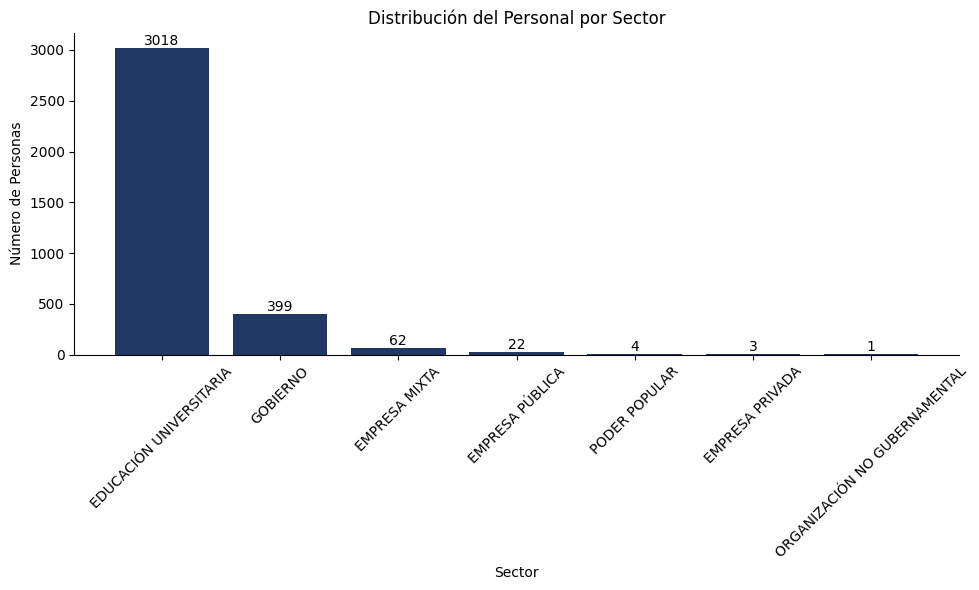

In [ ]:
# prompt: crea un gráfico de barras verticales del dataframe 'personal_df' de la columna 'SECTOR' que se muestren los resultados de forma descendente, que coloque las etiquetas de datos sobre las barras

# Assuming 'personal_df' DataFrame exists and has a 'SECTOR' column.
plt.figure(figsize=(10, 6))

# Count occurrences of each sector, sort in descending order
sector_counts = personal_df['SECTOR'].value_counts().sort_values(ascending=False)

# Create the vertical bar chart
bars = plt.bar(sector_counts.index, sector_counts.values, color='#203864')

# Eliminar las líneas superior y derecha
for spine in ['top', 'right']:
    plt.gca().spines[spine].set_visible(False)

# Add data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

# Customize the plot (optional)
plt.xlabel('Sector')
plt.ylabel('Número de Personas')
plt.title('Distribución del Personal por Sector')
plt.xticks(ha='center', rotation = 45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping

plt.show()

## Gráfico 2. Distribución del personal dedicado a I+D por sexo

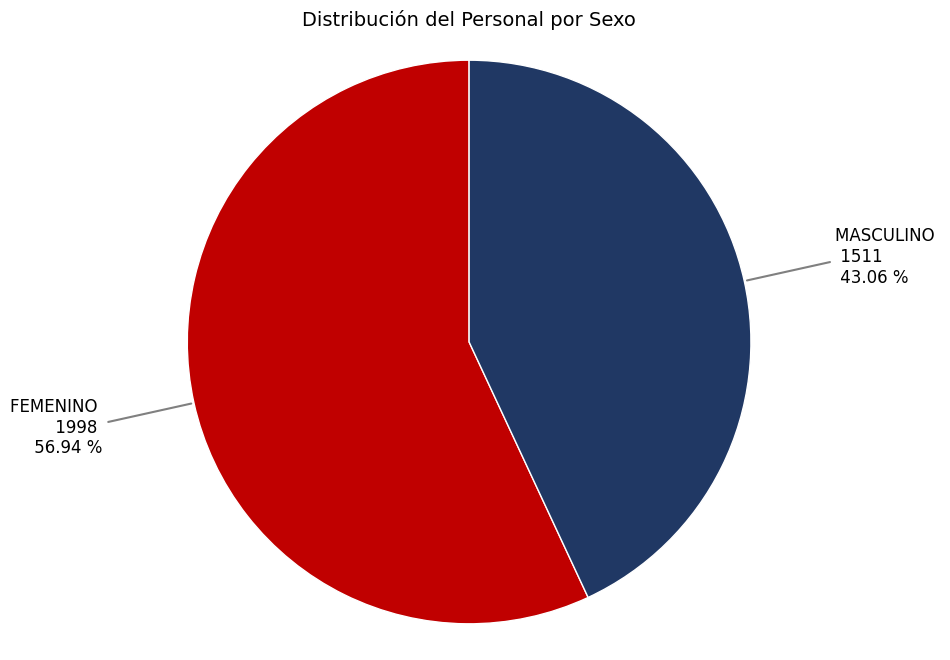

In [ ]:
# prompt: Genera un código que cree un gráfico de torta (pie chart) para visualizar la distribución de valores de la columna 'SEXO' del DataFrame 'personal_df'. El código debe realizar lo siguiente:
# Contar la cantidad de valores únicos en la columna especificada.
# Crear un gráfico de torta con colores personalizados y un ángulo de inicio de 90 grados.
# Asegurar que el gráfico sea circular manteniendo una relación de aspecto uniforme.
# Añadir etiquetas de datos a cada porción del gráfico, mostrando el nombre de la categoría, el conteo de valores y el porcentaje correspondiente.
# Ajustar la posición de las etiquetas para que estén fuera del gráfico y sean legibles.
# Mostrar el gráfico resultante.
# El código debe ser modular, permitiendo cambiar fácilmente la columna a graficar y los colores del gráfico.

# Assuming 'personal_df' DataFrame exists and has a 'SEXO' column.
plt.figure(figsize=(8, 8))

# Define custom colors for the pie chart
colors = ['#c00000', '#203864']  # Example colors

# Count occurrences of each sex
sex_counts = personal_df['SEXO'].value_counts()

# Create the pie chart with custom colors and start angle
wedges, texts, autotexts = plt.pie(sex_counts.values, colors=colors, autopct='', startangle=90,
                                  wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, textprops={'fontsize': 12})


# Set aspect ratio to be equal so that pie chart is circular
plt.axis('equal')

# Add labels outside the pie chart
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1) / 2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw = dict(arrowprops=dict(arrowstyle="-", color='gray', lw=1.5, connectionstyle=connectionstyle),
              va="center", ha=horizontalalignment)
    plt.gca().annotate(f"{sex_counts.index[i]} \n {sex_counts.values[i]} \n {sex_counts.values[i]/sex_counts.sum()*100:.2f} %", xy=(x, y), xytext=(1.3 * np.sign(x), 1.4 * y),
                       fontsize=12, **kw)


# Add a title
plt.title('Distribución del Personal por Sexo', fontsize=14)

# Display the chart
plt.show()

## Gráfico 3. Distribución del personal dedicado a I+D por área de conocimiento

In [ ]:
# Rellenar valores NaN en la columna 'AREA DEL CONOCIMIENTO' con 'No indica'
personal_df['AREA DEL CONOCIMIENTO'] = personal_df['AREA DEL CONOCIMIENTO'].fillna('No indica')


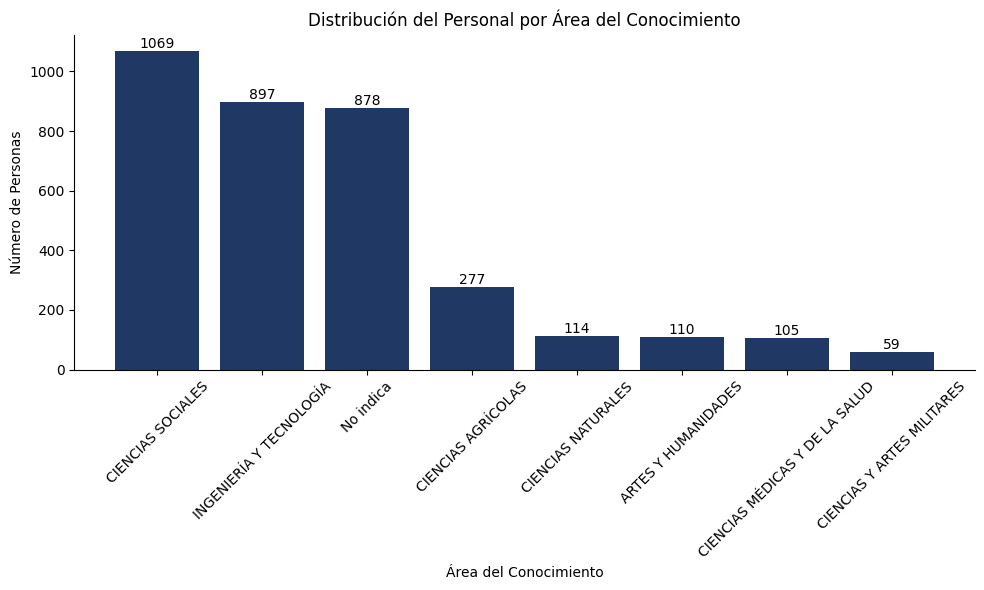

In [ ]:
# prompt: Genera un código que cree un gráfico de barras verticales para visualizar la distribución de valores en la columna 'AREA DEL CONOCIMIENTO' del DataFrame 'personal_df'. El código debe realizar lo siguiente:
# Asumir que existe un DataFrame llamado personal_df con una columna llamada 'AREA DEL CONOCIMIENTO'.
# Contar las ocurrencias de cada valor único en la columna 'AREA DEL CONOCIMIENTO' y ordenarlas en orden descendente.
# Crear un gráfico de barras verticales con el color '#203864' para las barras.
# Eliminar las líneas del borde superior y derecho del gráfico para un estilo más limpio.
# Añadir etiquetas de datos encima de cada barra, mostrando el valor correspondiente.
# Personalizar el gráfico con etiquetas para los ejes X e Y, un título y ajustar la alineación de las etiquetas del eje X para mejorar la legibilidad.
# Ajustar el diseño para evitar superposiciones y mostrar el gráfico resultante.


# Assuming 'personal_df' DataFrame exists and has a 'AREA DEL CONOCIMIENTO' column.
plt.figure(figsize=(10, 6))

# Count occurrences of each area of knowledge, sort in descending order
area_counts = personal_df['AREA DEL CONOCIMIENTO'].value_counts().sort_values(ascending=False)

# Create the vertical bar chart
bars = plt.bar(area_counts.index, area_counts.values, color='#203864')

# Remove the top and right spines
for spine in ['top', 'right']:
    plt.gca().spines[spine].set_visible(False)

# Add data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

# Customize the plot
plt.xlabel('Área del Conocimiento')
plt.ylabel('Número de Personas')
plt.title('Distribución del Personal por Área del Conocimiento')
plt.xticks(rotation=45, ha='center')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping

plt.show()

## Gráfico 4. Distribución del personal dedicado a I+D por grado académico

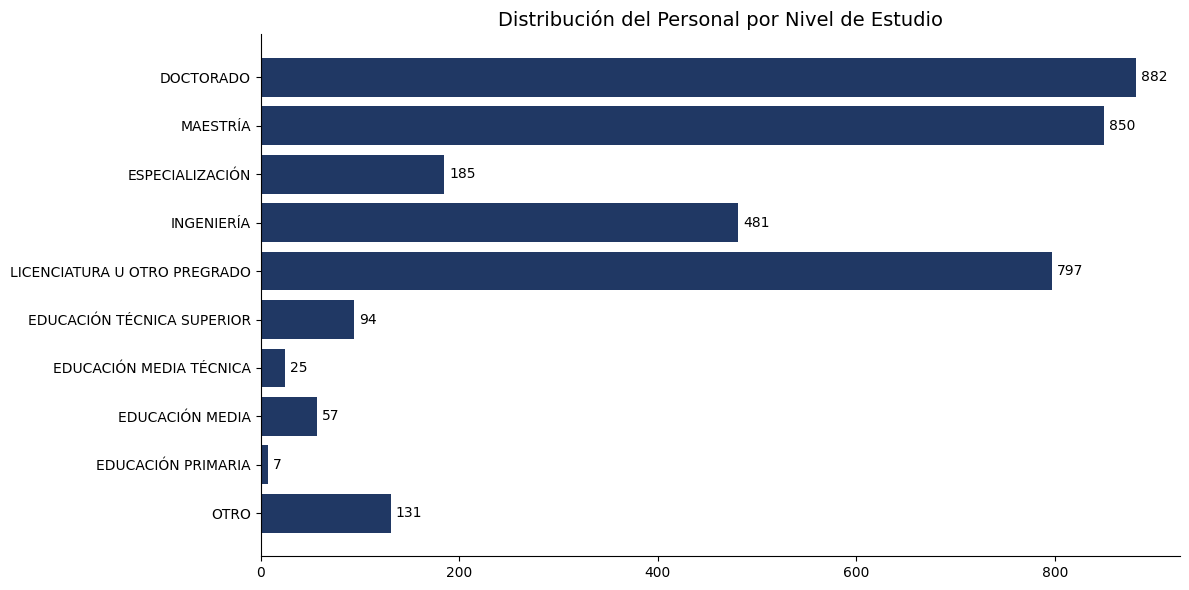

In [ ]:
# prompt: Genera un código en Python que cree un gráfico de barras horizontales para visualizar la distribución de valores en una columna específica de un DataFrame. El código debe realizar lo siguiente:
# Contar las ocurrencias de cada valor único en la columna 'NIVEL ESTUDIO' del DataFrame 'personal_df' y ordenarlas en el siguiente orden: DOCTORADO, MAESTRÍA, ESPECIALIZACIÓN, INGENIERÍA, LICENCIATURA U OTRO PREGRADO, EDUCACIÓN TÉCNICA SUPERIOR, EDUCACIÓN MEDIA TÉCNICA, EDUCACIÓN MEDIA, EDUCACIÓN PRIMARIA, OTRO.
# Crear un gráfico de barras horizontales con un color específico para las barras.
# Eliminar las líneas del borde superior y derecho del gráfico para un estilo más limpio.
# Formatear el eje horizontal para mostrar los números en formato entero con separadores de miles.
# Establecer los ticks del eje horizontal con un incremento de 5 en 5, basado en el valor máximo de los datos.
# Añadir etiquetas de datos al final de cada barra, mostrando el valor correspondiente.
# Personalizar el título del gráfico, colocándolo en la parte superior izquierda.
# Ajustar el tamaño de la figura para una mejor visualización y mostrar el gráfico resultante.

# Assuming 'personal_df' DataFrame is already loaded

# Define the desired order for the 'NIVEL ESTUDIO' categories
nivel_estudio_order = ['OTRO', 'EDUCACIÓN PRIMARIA', 'EDUCACIÓN MEDIA', 'EDUCACIÓN MEDIA TÉCNICA',
                       'EDUCACIÓN TÉCNICA SUPERIOR', 'LICENCIATURA U OTRO PREGRADO', 'INGENIERÍA',
                       'ESPECIALIZACIÓN', 'MAESTRÍA', 'DOCTORADO'
                      ]

# Count occurrences of each 'NIVEL ESTUDIO' and reorder
nivel_estudio_counts = personal_df['NIVEL ESTUDIO'].value_counts().reindex(nivel_estudio_order, fill_value=0)


plt.figure(figsize=(12, 6))

bars = plt.barh(nivel_estudio_counts.index, nivel_estudio_counts.values, color='#203864')

# Remove top and right spines
for spine in ['top', 'right']:
    plt.gca().spines[spine].set_visible(False)

# Format x-axis ticks with thousands separator
ax = plt.gca()
formatter = ticker.FuncFormatter(lambda x, pos: "{:,}".format(int(x)))
ax.xaxis.set_major_formatter(formatter)

# Add data labels
for bar in bars:
    width = bar.get_width()
    plt.text(width+5, bar.get_y() + bar.get_height()/2, int(width), ha='left', va='center')

# Customize title
plt.title('Distribución del Personal por Nivel de Estudio', loc='center', fontsize=14)

plt.tight_layout()
plt.show()


## Gráfico 5. Personal dedicado a I+D por división político territorial

In [ ]:
# Rellenar valores NaN en la columna 'ESTADO' con 'No indica'
personal_df['ESTADO'] = personal_df['ESTADO'].fillna('No indica')

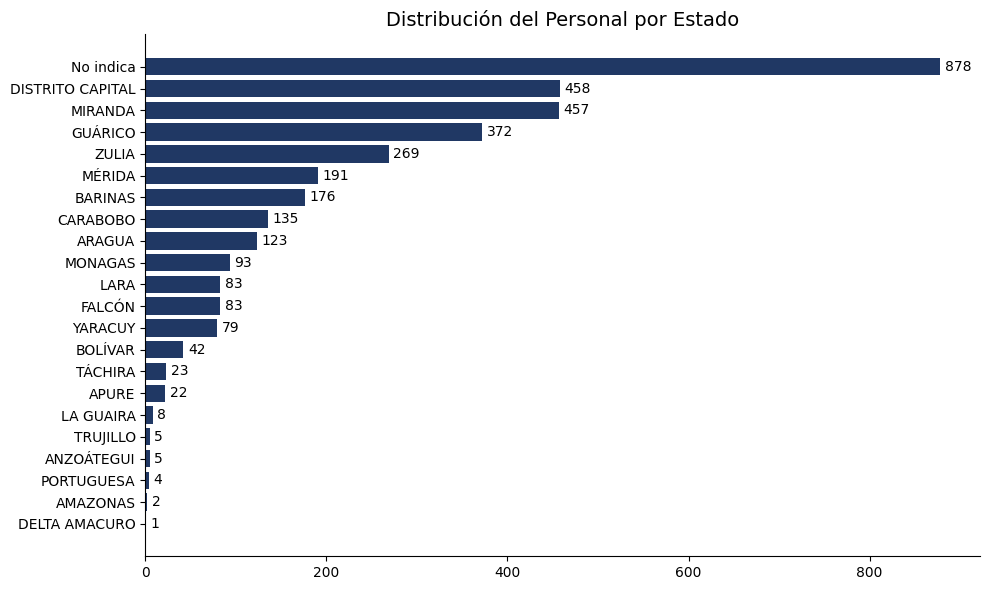

In [ ]:
# prompt: Genera un código en Python que cree un gráfico de barras horizontales para visualizar la distribución de valores en una columna específica de un DataFrame. El código debe realizar lo siguiente:
# # Contar las ocurrencias de cada valor único en la columna 'ESTADO' del DataFrame 'personal_df' y ordenarlas de forma descendente.
# # Crear un gráfico de barras horizontales con el color '#203864' para las barras.
# # Eliminar las líneas del borde superior y derecho del gráfico para un estilo más limpio.
# # Formatear el eje horizontal para mostrar los números en formato entero con separadores de miles.
# # Añadir etiquetas de datos al final de cada barra, mostrando el valor correspondiente.
# # Personalizar el título del gráfico, colocándolo en la parte superior izquierda.
# # Ajustar el tamaño de la figura para una mejor visualización y mostrar el gráfico resultante.

# Assuming 'personal_df' DataFrame exists and has an 'ESTADO' column.

plt.figure(figsize=(10, 6))

# Count occurrences of each state, sort in descending order
estado_counts = personal_df['ESTADO'].value_counts().sort_values(ascending=True)

# Create the horizontal bar chart
bars = plt.barh(estado_counts.index, estado_counts.values, color='#203864')

# Remove the top and right spines
for spine in ['top', 'right']:
    plt.gca().spines[spine].set_visible(False)

# Format x-axis ticks with thousands separator
ax = plt.gca()
formatter = ticker.FuncFormatter(lambda x, pos: "{:,}".format(int(x)))
ax.xaxis.set_major_formatter(formatter)

# Add data labels at the end of each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width+5, bar.get_y() + bar.get_height()/2, int(width), ha='left', va='center')

# Customize the plot
plt.title('Distribución del Personal por Estado', loc='center', fontsize=14) # Title at top-left
plt.tight_layout() # Adjust layout

plt.show()


## Gráfico 6. Distribución del personal dedicado a I+D por modalidad de contrato

In [ ]:
personal_df['MODALIDAD CONTRATO'] = personal_df['MODALIDAD CONTRATO'].fillna('No indica')

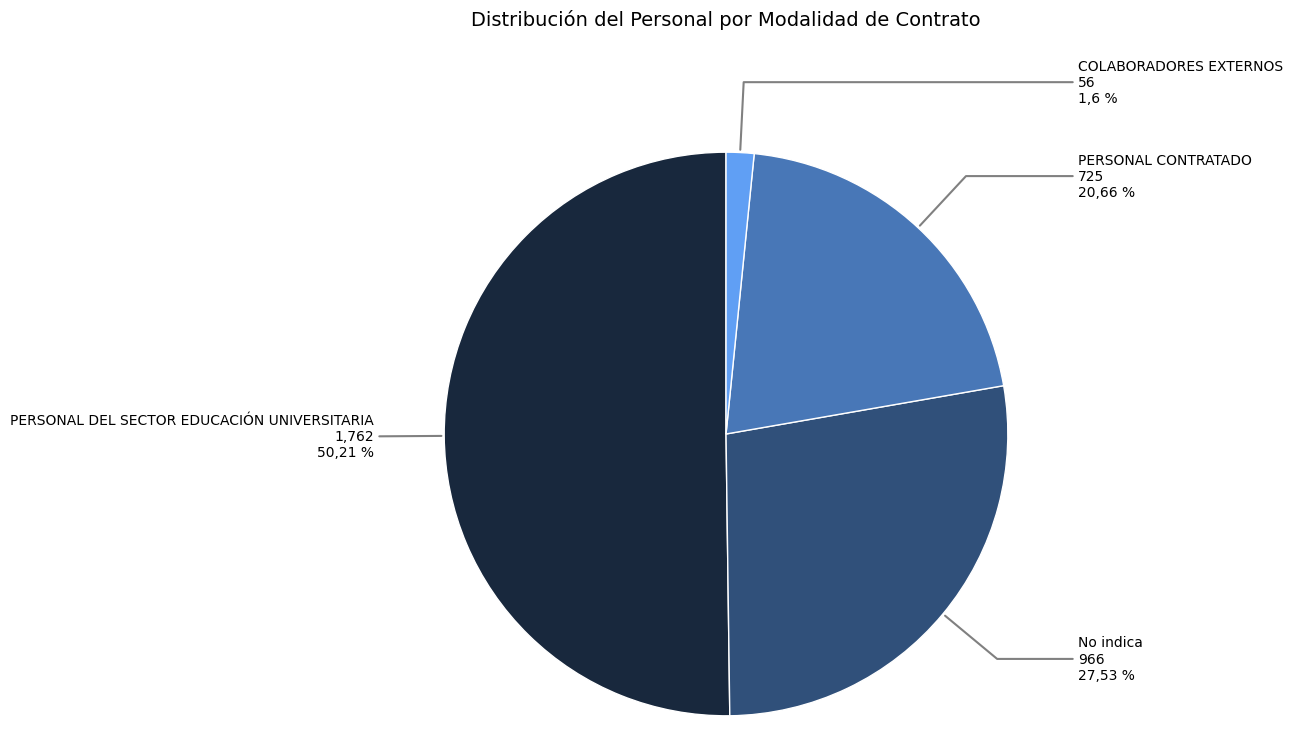

In [ ]:
# prompt: Genera un código en Python que cree un gráfico de torta (pie chart) para visualizar la distribución de valores en una columna específica de un DataFrame. El código debe realizar lo siguiente:
# Obtener los conteos de cada valor único en la columna 'MODALIDAD CONTRATO' del DataFrame personal_df.
# Crear un gráfico de torta.
# Generar un gradiente de colores personalizados para las porciones del gráfico, basado en un color base y la cantidad de valores únicos en la columna.
# Asegurar que el gráfico sea un círculo perfecto.
# Añadir etiquetas de datos a cada porción del gráfico, mostrando el nombre del sector, el conteo de valores (con separadores de miles) y el porcentaje correspondiente (con el separador decimal correcto).
# Intercalar la distancia de las etiquetas al centro del gráfico para índices pares e impares, utilizando un offset diferente.
# Dibujar líneas guía que conecten las etiquetas con las porciones correspondientes del gráfico.
# Personalizar el título del gráfico, colocándolo en la parte superior centrada.
# Mostrar el gráfico resultante.

def colocar_separador_miles(numero):
    return "{:,}".format(numero)

def cambiar_separador(numero):
    return str(numero).replace('.', ',')

"""
def generate_gradient_colors(base_color, num_colors):
    # Normalize base color to be between 0 and 1
    normalized_base_color = [x / 255.0 for x in base_color]

    # Generate gradient colors using matplotlib's LinearSegmentedColormap
    cmap = plt.cm.LinearSegmentedColormap.from_list("custom_cmap", [normalized_base_color, 'white'], N=num_colors)

    return [colors.rgb2hex(cmap(i)) for i in range(num_colors)]
"""

# Assuming 'personal_df' DataFrame exists and has a 'MODALIDAD CONTRATO' column.
plt.figure(figsize=(8, 8))

# Count occurrences of each contract modality
contract_counts = personal_df['MODALIDAD CONTRATO'].value_counts()

# Define base color for gradient
base_color = [96, 159, 244]
# Generate gradient colors


colors = generate_gradient_colors(base_color, len(contract_counts))

# Create the pie chart
wedges, texts, autotexts = plt.pie(contract_counts.values, autopct='', startangle=90, colors=colors,
                                  wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, textprops={'fontsize': 10})

#labels=contract_counts.index,
# Set aspect ratio to be equal so that pie chart is circular
plt.axis('equal')

# Add labels outside the pie chart with custom formatting
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1) / 2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    #offset = 1.75 if i % 2 == 0 else 2.5  # Intercalar offset para índices pares e impares
    offset = 1.25
    kw = dict(arrowprops=dict(arrowstyle="-", color='gray', lw=1.5, connectionstyle=connectionstyle),
              va="center", ha=horizontalalignment)
    plt.gca().annotate(f"{contract_counts.index[i]}\n{colocar_separador_miles(contract_counts.values[i])}\n{cambiar_separador(round(contract_counts.values[i]/contract_counts.sum()*100, 2))} %",
                       xy=(x, y), xytext=(offset * np.sign(x), offset * y), fontsize=10, **kw)

plt.title('Distribución del Personal por Modalidad de Contrato', loc= 'center', y = 1.15, fontsize=14)
plt.show()

# 3. Gastos de Inversión

In [ ]:
gastos_inversion

INSTANCIA       FECHA  \
0    INSTITUTO NACIONAL DE GEOLOGÍA Y MINERÍA (INGE...  2025-04-14   
1    UNIVERSIDAD POLITÉCNICA TERRITORIAL DEL ESTADO...  2024-12-17   
2    MINISTERIO DEL PODER POPULAR PARA LA CULTURA (...  2025-04-15   
3        COLEGIO UNIVERSITARIO DE PSICOPEDAGOGÍA (CUP)  2025-04-21   
4    FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y L...  2024-12-12   
..                                                 ...         ...   
144  UNIVERSIDAD NACIONAL EXPERIMENTAL SIMÓN BOLÍVA...  2025-03-25   
145  INSTITUTO UNIVERSITARIO DE TECNOLOGÍA RUFINO B...  2025-02-21   
146  FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y L...  2025-02-03   
147                         CULTORES/TECNÓLOGOS LNAVAS  2025-01-22   
148  INSTITUTO UNIVERSITARIO DE TECNOLOGÍA POLYCOM ...  2025-04-21   

     ORGANIZACION  ARRENDAMIENTO DE BIENES MUEBLES  GASTOS BASICOS  \
0             247                              NaN             NaN   
1              96                              0.0         30000.0   
2             248                              NaN             NaN   
3             249                              NaN             NaN   
4              67                              NaN             NaN   
..            ...                              ...             ...   
144           220                              0.0             0.0   
145           171                              0.0           320.0   
146           149                              0.0             0.0   
147           146                          60000.0         12000.0   
148           251                              NaN             NaN   

     GASTOS DE REPRESENTACION  PAGO DE SERVICIOS  MATERIALES  \
0                         NaN                NaN         NaN   
1                         0.0                0.0    600000.0   
2                         NaN                NaN         NaN   
3                         NaN                NaN         NaN   
4                         NaN                NaN         NaN   
..                        ...                ...         ...   
144                       0.0                0.0         0.0   
145                       0.0                0.0         0.0   
146                       0.0                0.0         0.0   
147                  180000.0           180000.0    190000.0   
148                       NaN                NaN         NaN   

     ADQUISICION DE BIENES MUEBLES  MEJORA DE BIENES MUEBLES  ...  \
0                              NaN                       NaN  ...   
1                              0.0                       0.0  ...   
2                              NaN                       NaN  ...   
3                              NaN                       NaN  ...   
4                              NaN                       NaN  ...   
..                             ...                       ...  ...   
144                            0.0                       0.0  ...   
145                            0.0                       0.0  ...   
146                            0.0                       0.0  ...   
147                       960000.0                  360000.0  ...   
148                            NaN                       NaN  ...   

     UNIVERSITARIO PERSONAL DE APOYO QUE CONTRIBUYE A I+D  \
0                                                  NaN      
1                                                  0.0      
2                                                  NaN      
3                                                  NaN      
4                                                  NaN      
..                                                 ...      
144                                                0.0      
145                                                0.0      
146                                                0.0      
147                                                0.0      
148                                                NaN      

     OTROS INVESTIGADORES E INVE

In [ ]:
gastos_inversion.rename(columns={'INSTANCIA': 'NOMBRE DE LA ORGANIZACIÓN'}, inplace=True)

# prompt: para el dataframe 'gastos_inversion' escribe un código que convierta a float todos los valores de a partir de la cuarta columna hasta la última

# Iterate through columns starting from the fourth one and convert values to float
for col in gastos_inversion.columns[3:]:
  gastos_inversion[col] = pd.to_numeric(gastos_inversion[col], errors='coerce')

# prompt: para el dataframe 'gastos_merge' escribe un código que sume todos valores de la columnas a partir de la cuarta hasta la última. Posteriormente agregar una columna al final donde aparezca el valor total de la suma. Al final que muestre el dataframe

# Sumar los valores de las columnas desde la cuarta hasta la última
gastos_inversion['Total Gastos'] = gastos_inversion.iloc[:, 3:].sum(axis=1)

# Mostrar el DataFrame con la nueva columna
gastos_inversion

NOMBRE DE LA ORGANIZACIÓN       FECHA  \
0    INSTITUTO NACIONAL DE GEOLOGÍA Y MINERÍA (INGE...  2025-04-14   
1    UNIVERSIDAD POLITÉCNICA TERRITORIAL DEL ESTADO...  2024-12-17   
2    MINISTERIO DEL PODER POPULAR PARA LA CULTURA (...  2025-04-15   
3        COLEGIO UNIVERSITARIO DE PSICOPEDAGOGÍA (CUP)  2025-04-21   
4    FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y L...  2024-12-12   
..                                                 ...         ...   
144  UNIVERSIDAD NACIONAL EXPERIMENTAL SIMÓN BOLÍVA...  2025-03-25   
145  INSTITUTO UNIVERSITARIO DE TECNOLOGÍA RUFINO B...  2025-02-21   
146  FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y L...  2025-02-03   
147                         CULTORES/TECNÓLOGOS LNAVAS  2025-01-22   
148  INSTITUTO UNIVERSITARIO DE TECNOLOGÍA POLYCOM ...  2025-04-21   

     ORGANIZACION  ARRENDAMIENTO DE BIENES MUEBLES  GASTOS BASICOS  \
0             247                              NaN             NaN   
1              96                              0.0         30000.0   
2             248                              NaN             NaN   
3             249                              NaN             NaN   
4              67                              NaN             NaN   
..            ...                              ...             ...   
144           220                              0.0             0.0   
145           171                              0.0           320.0   
146           149                              0.0             0.0   
147           146                          60000.0         12000.0   
148           251                              NaN             NaN   

     GASTOS DE REPRESENTACION  PAGO DE SERVICIOS  MATERIALES  \
0                         NaN                NaN         NaN   
1                         0.0                0.0    600000.0   
2                         NaN                NaN         NaN   
3                         NaN                NaN         NaN   
4                         NaN                NaN         NaN   
..                        ...                ...         ...   
144                       0.0                0.0         0.0   
145                       0.0                0.0         0.0   
146                       0.0                0.0         0.0   
147                  180000.0           180000.0    190000.0   
148                       NaN                NaN         NaN   

     ADQUISICION DE BIENES MUEBLES  MEJORA DE BIENES MUEBLES  ...  \
0                              NaN                       NaN  ...   
1                              0.0                       0.0  ...   
2                              NaN                       NaN  ...   
3                              NaN                       NaN  ...   
4                              NaN                       NaN  ...   
..                             ...                       ...  ...   
144                            0.0                       0.0  ...   
145                            0.0                       0.0  ...   
146                            0.0                       0.0  ...   
147                       960000.0                  360000.0  ...   
148                            NaN                       NaN  ...   

     OTROS INVESTIGADORES E INVESTIGADORAS  OTROS PERSONAL TECNICO  \
0                                      NaN                     NaN   
1                                      0.0                     0.0   
2                                      NaN                     NaN   
3                                      NaN                     NaN   
4                                      NaN                     NaN   
..                                     ...                     ...   
144                                    0.0                     0.0   
145                                    0.0                     0.0   
146                                    0.0                     0.0   
147                               360000.0       

In [ ]:
# prompt: hacer un merger entre el dataframe 'instancia' y 'gastos_inversion' por la columna 'NOMBRE DE LA ORGANIZACIÓN'

# Merge the 'unidadesIyD' and 'personal' DataFrames
gastos_merge = pd.merge(instancia, gastos_inversion, on='NOMBRE DE LA ORGANIZACIÓN', how='inner')

# Display the merged DataFrame (optional)
gastos_merge

# Exportar el DataFrame personal_df a un archivo Excel
gastos_merge.to_excel('gastos_merge.xlsx', index=False)

# Mostrar un mensaje de éxito
print('\nEl DataFrame ha sido exportado exitosamente a gastos_merge.xlsx.xlsx\n')


El DataFrame ha sido exportado exitosamente a gastos_merge.xlsx.xlsx



# Capítulo 3

## Gráfico 7. Distribución del gasto de inversión en infraestructura para las actividades de I+D (montos se expresan en millones de bolívares)

In [ ]:
columnas_grafico_7 = [
    'ARRENDAMIENTO DE BIENES MUEBLES', 'GASTOS BASICOS', 'GASTOS DE REPRESENTACION', 'PAGO DE SERVICIOS',
    'MATERIALES', 'ADQUISICION DE BIENES MUEBLES', 'MEJORA DE BIENES MUEBLES', 'OBLIGACIONES DE LEY DE RESGUARDO A LAS TIC',
    'PRESERVACION DE INFORMACION', 'INTERPRETACION Y DIFUCION DE INFORMACION', 'ACTIVIDADES TECNICAS DE APOYO A LA CYT', 'RECOLECCION Y ANALISIS DE DATOS CIENTIFICOS',
    'FORMACION DE PERSONAL DEDICADO A I+D', 'EQUIPOS E INSTRUCTIVOS', 'LICENCIAMIENTO', 'OTROS'
    ]

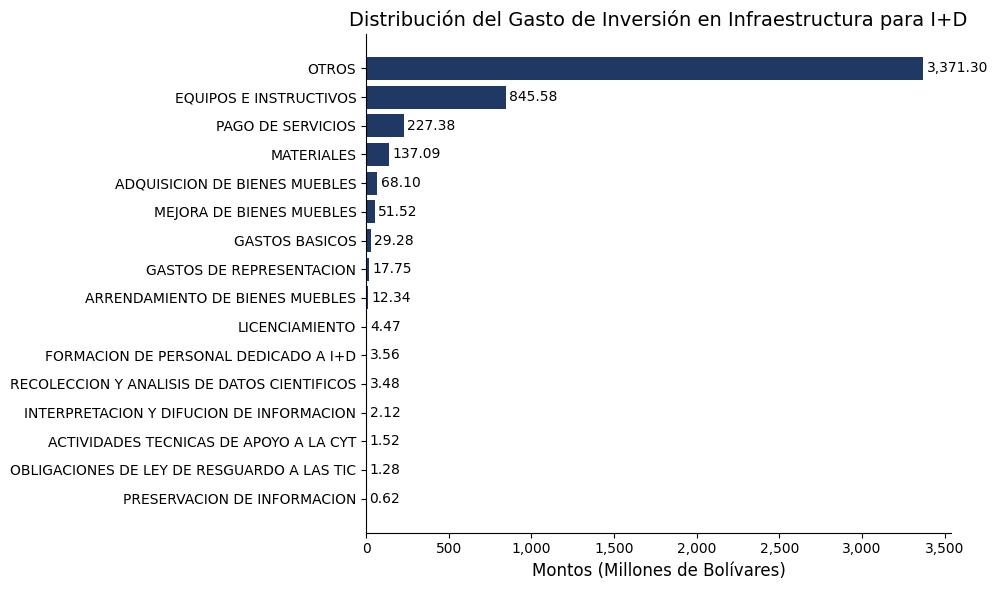

In [ ]:
# prompt: escribe un código que para el dataframe 'gastos_merge' haga un gráfico de barras horizontales con los totales de las columnas mencionadas en la lista 'columnas_grafico_7'. Estos valores deben estar ordenados en forma descendente


# Calculate the sum of each column specified in columnas_grafico_7
column_sums = gastos_merge[columnas_grafico_7].sum()

# Sort the sums in descending order
column_sums_sorted = column_sums.sort_values(ascending=True)

# Divide the values by one million
column_sums_sorted_millions = column_sums_sorted / 1_000_000

# Create the horizontal bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(column_sums_sorted_millions.index, column_sums_sorted_millions.values, color='#203864')

# Remove top and right spines
for spine in ['top', 'right']:
    plt.gca().spines[spine].set_visible(False)

# Format x-axis ticks with millions separator
ax = plt.gca()
formatter = ticker.FuncFormatter(lambda x, pos: "{:,.0f}".format(x))
ax.xaxis.set_major_formatter(formatter)

# Add data labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 20, bar.get_y() + bar.get_height()/2, "{:,.2f}".format(width), ha='left', va='center')

# Customize title and labels
plt.xlabel('Montos (Millones de Bolívares)', fontsize=12)
plt.title('Distribución del Gasto de Inversión en Infraestructura para I+D', loc='center', fontsize=14)
plt.tight_layout()
plt.show()


## Gráfico 8. Distribución del gasto de inversión por personal dedicado a I+D (montos se expresan en millones de bolívares)

In [ ]:
columnas_grafico_8 = [
		     'INVESTIGADORES E INVESTIGADORAS', 'PERSONAL TECNICO', 'PERSONAL DE APOYO QUE CONTRIBUYE A I+D', 'EXTERNOS INVESTIGADORES E INVESTIGADORAS',
		     'EXTERNOS PERSONAL TECNICO', 'EXTERNOS PERSONAL DE APOYO QUE CONTRIBUYE A I+D', 'UNIVERSITARIO INVESTIGADORES E INVESTIGADORAS', 'UNIVERSITARIO PERSONAL TECNICO',
		     'UNIVERSITARIO PERSONAL DE APOYO QUE CONTRIBUYE A I+D', 'OTROS INVESTIGADORES E INVESTIGADORAS', 'OTROS PERSONAL TECNICO', 'OTROS UNIVERSITARIO PERSONAL DE APOYO QUE CONTRIBUYE A I+D'
		     ]


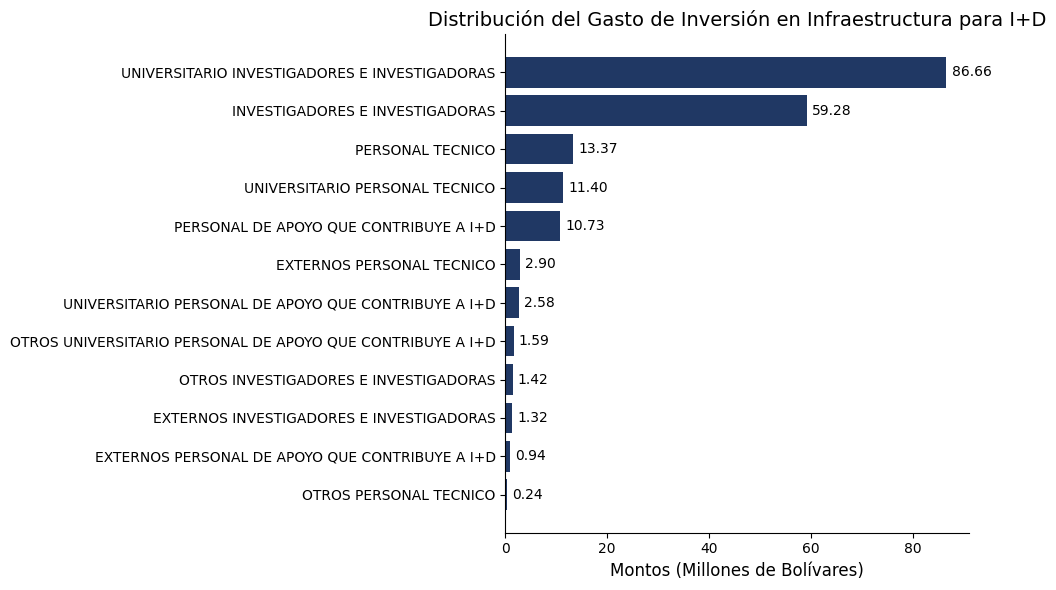

In [ ]:
# Calculate the sum of each column specified in columnas_grafico_7
column_sums2 = gastos_merge[columnas_grafico_8].sum()

# Sort the sums in descending order
column_sums_sorted2 = column_sums2.sort_values(ascending=True)

# Divide the values by one million
column_sums_sorted_millions2 = column_sums_sorted2 / 1_000_000

# Create the horizontal bar chart
plt.figure(figsize=(10, 6))
bars2 = plt.barh(column_sums_sorted_millions2.index, column_sums_sorted_millions2.values, color='#203864')

# Remove top and right spines
for spine in ['top', 'right']:
    plt.gca().spines[spine].set_visible(False)

# Format x-axis ticks with millions separator
ax = plt.gca()
formatter = ticker.FuncFormatter(lambda x, pos: "{:,.0f}".format(x))
ax.xaxis.set_major_formatter(formatter)

# Add data labels
for bar in bars2:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2, "{:,.2f}".format(width), ha='left', va='center')

# Customize title and labels
plt.xlabel('Montos (Millones de Bolívares)', fontsize=12)
plt.title('Distribución del Gasto de Inversión en Infraestructura para I+D', loc='center', fontsize=14)
plt.tight_layout()
plt.show()

## Gráfico 9. Distribución del gasto de inversión en personal e infraestructura (los montos están expresados en millones de bolívares)

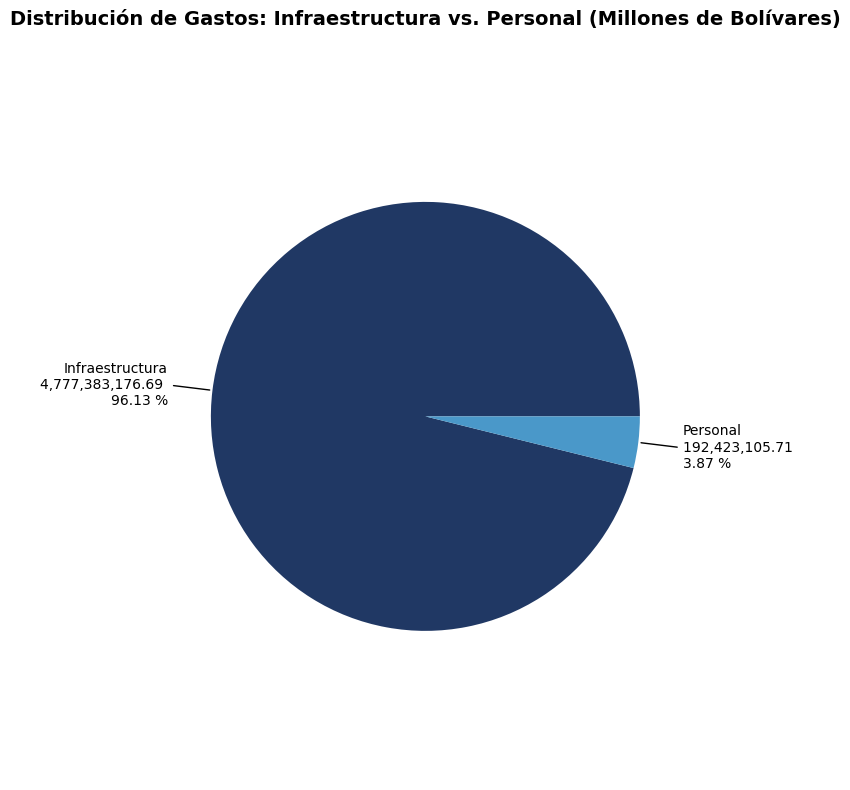

In [ ]:
# prompt: para el dataframe 'gastos_merge' escribe un código para un gráfico de torta en el cual se vea representado como gastos de infraestructura la suma de los totales de las columnas mencionadas en la lista 'columnas_grafico_7' y como gastos de personal como la suma de los totales de las columnas mencionadas en la lista 'columnas_grafico_8'
# Genere un gradiente de colores personalizados para las porciones del gráfico, basado en un color base y la cantidad de valores únicos en la columna.
# Asegurar que el gráfico sea un círculo perfecto.
# Añadir etiquetas de datos a cada porción del gráfico, mostrando el nombre del sector, el conteo de valores (con separadores de miles) y el porcentaje correspondiente (con el separador decimal correcto).
# Ajustar la posición de las etiquetas para que estén fuera del gráfico y sean legibles.
# Dibujar líneas guía que conecten las etiquetas con las porciones correspondientes del gráfico.
# Personalizar el título del gráfico, colocándolo en la parte superior centrada.


# Sumar los gastos de infraestructura
gastos_infraestructura = gastos_merge[columnas_grafico_7].sum().sum()

# Sumar los gastos de personal
gastos_personal = gastos_merge[columnas_grafico_8].sum().sum()

# Crear los datos para el gráfico de torta
labels = ['Infraestructura', 'Personal']
sizes = [gastos_infraestructura, gastos_personal]

# Crear un gradiente de colores personalizado
base_color = '#203864'  # Color base
colors = [base_color, plt.get_cmap('Blues')(0.6)]  # Gradiente basado en el color base

# Crear el gráfico de torta
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    sizes,
    colors=colors,
    autopct='',
    startangle=0,
    pctdistance=0.85,
    textprops={'fontsize': 12}
)

# Asegurar que el gráfico sea un círculo perfecto
plt.axis('equal')

# Añadir etiquetas de datos fuera del gráfico con líneas guía

kw = dict(arrowprops=dict(arrowstyle="-"), zorder=0, va="center")

for i, (wedge, label, size) in enumerate(zip(wedges, labels, sizes)):
    ang = (wedge.theta2 - wedge.theta1) / 2. + wedge.theta1  # Ángulo medio de la porción
    y = np.sin(np.deg2rad(ang))  # Coordenada y
    x = np.cos(np.deg2rad(ang))  # Coordenada x
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]  # Alineación horizontal
    connectionstyle = f"angle,angleA=0,angleB={ang}"  # Estilo de la línea guía
    kw["arrowprops"].update({"connectionstyle": connectionstyle})

    # Texto de la etiqueta con nombre, valor y porcentaje
    label_text = f"{label}\n{size:,.2f} \n{sizes[i]/sum(sizes)*100:.2f} %"
    plt.annotate(
        label_text,
        xy=(x, y),
        xytext=(1.2 * np.sign(x), 1.2 * y),
        horizontalalignment=horizontalalignment,
        **kw
    )

# Personalizar el título del gráfico
plt.title('Distribución de Gastos: Infraestructura vs. Personal (Millones de Bolívares)',
          fontsize=14, fontweight='bold', pad=20, loc='center')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

## Gráfico 10. Distribución del gasto de inversión total por sectores del Sncti (los montos están expresados en millones de bolívares)

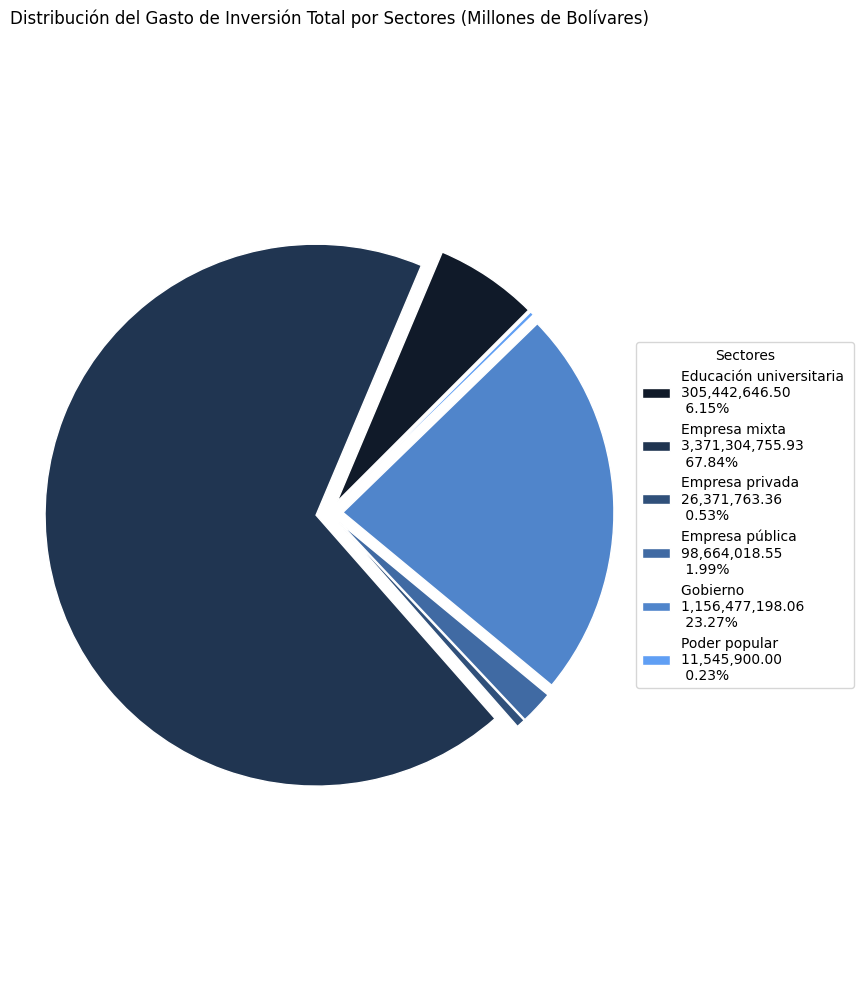

In [ ]:
# Agrupar por 'SECTOR' y sumar 'Total General Gastos de inversión'
sector_gastos = gastos_merge.groupby('SECTOR')['Total Gastos'].sum()
total_gastos = sector_gastos.sum()

# Crear un gradiente de colores personalizado
base_color = [96, 159, 244]  # Convertido a formato matplotlib [0-1]
colors = generate_gradient_colors(base_color, len(sector_gastos))

# Configuración del gráfico
plt.figure(figsize=(10, 10))
explode = [0.05] * len(sector_gastos)  # Separación entre porciones

# Crear el gráfico de torta
wedges, texts = plt.pie(
    sector_gastos,
    colors=colors,
    startangle=45,
    explode=explode,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
    textprops={'fontsize': 10}
)

# Asegurar que el gráfico sea un círculo perfecto
plt.axis('equal')

# Crear leyenda con formato mejorado
legend_labels = [
    f"{sector} \n{gasto:,.2f} \n {gasto/total_gastos:.2%}"
    for sector, gasto in sector_gastos.items()
]

plt.legend(
    wedges,
    legend_labels,
    title="Sectores",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
    fontsize=10
)

# Configurar título y layout
plt.title(
    'Distribución del Gasto de Inversión Total por Sectores (Millones de Bolívares)',
    fontsize=12,
    pad=20
)

# Ajustar layout para evitar cortes
plt.tight_layout()
plt.subplots_adjust(left=0.1, right=0.7)  # Espacio para la leyenda

plt.show()

# Capítulo 4

In [ ]:
unidadesIyD

NOMBRE DE LA ORGANIZACIÓN  \
0    ACADEMIA DE CIENCIAS AGRÍCOLAS DE VENEZUELA (A...   
1    AGENCIA BOLIVARIANA PARA ACTIVIDADES ESPACIALE...   
2    AGENCIA BOLIVARIANA PARA ACTIVIDADES ESPACIALE...   
3    AGENCIA BOLIVARIANA PARA ACTIVIDADES ESPACIALE...   
4    AGENCIA BOLIVARIANA PARA ACTIVIDADES ESPACIALE...   
..                                                 ...   
779                  UNIVERSIDAD RAFAEL URDANETA (URU)   
780                  UNIVERSIDAD RAFAEL URDANETA (URU)   
781                          UNIVERSIDAD YACAMBÚ (UNY)   
782                          UNIVERSIDAD YACAMBÚ (UNY)   
783                          UNIVERSIDAD YACAMBÚ (UNY)   

                      SECTOR  \
0                   GOBIERNO   
1                   GOBIERNO   
2                   GOBIERNO   
3                   GOBIERNO   
4                   GOBIERNO   
..                       ...   
779  EDUCACIÓN UNIVERSITARIA   
780  EDUCACIÓN UNIVERSITARIA   
781  EDUCACIÓN UNIVERSITARIA   
782  EDUCACIÓN UNIVERSITARIA   
783  EDUCACIÓN UNIVERSITARIA   

                                   NOMBRE DE LA UNIDAD CONDICIÓN  \
0    DIRECCIóN DE INVESTIGACION E INNOVACION PRODUC...    ÓPTIMA   
1                                                  CBS   REGULAR   
2                                                  DAE    ÓPTIMA   
3                                                 DCNR     BUENA   
4                                                DII_1     BUENA   
..                                                 ...       ...   
779     LABORATORIO DE MATERIALES, SUELOS Y PAVIMENTOS    ÓPTIMA   
780                             LABORATORIO DE QUÍMICA    ÓPTIMA   
781                         COMUNICACIóN DE LA CIENCIA     BUENA   
782                        GESTIóN DE LA INVESTIGACIóN    ÓPTIMA   
783             INNOVACIóN Y TRASNFERENCIA TECNOLóGICA     BUENA   

     PROPORCIÓN EN METROS CUADRADOS    ESTADO                 MUNICIPIO  \
0                              32.0   BARINAS  ALBERTO ARVELO TORREALBA   
1                               6.0   MIRANDA                     SUCRE   
2                               NaN   MIRANDA                    CHACAO   
3                              20.0   MIRANDA                     SUCRE   
4                               NaN  CARABOBO            PUERTO CABELLO   
..                              ...       ...                       ...   
779                            56.0     ZULIA                 MARACAIBO   
780                            56.0     ZULIA                 MARACAIBO   
781                             2.0      LARA                PALAVECINO   
782                             4.0      LARA                PALAVECINO   
783                            80.0      LARA                PALAVECINO   

                  PARROQUIA  \
0       RODRÍGUEZ DOMÍNGUEZ   
1          LEONCIO MARTINEZ   
2                    CHACAO   
3          LEONCIO MARTINEZ   
4       NO URBANA BORBURATA   
..                      ...   
779             SANTA LUCIA   
780             SANTA LUCIA   
781  JOSÉ GREGORIO BASTIDAS   
782  JOSÉ GREGORIO BASTIDAS   
783  JOSÉ GREGORIO BASTIDAS   

                                             DIRECCIÓN             LATITUD  \
0      CARRETERA VìA BALCONCITO, SECTOR QUEBRADA NEGRA  08 ° 55 ' 06.19 ''   
1              BASE A[EREA GENERALISIMO FCO DE MIRANDA  10 ° 29 ' 60.11 ''   
2    EDIFICIO DE LA COMANDANCIA GENERAL DE LA AVIAC...  10 ° 29 ' 15.82 ''   
3    BASE AEREA GENERALISIMO FRANCISCO DE MIRANDA, ...  10 ° 29 ' 11.51 ''   
4                                            BORBURATA  10 ° 45 ' 45.41 ''   
..                                                 ...                 ...   
779  SECTOR VEREDAD DEL LAGO, AV. 2 EL MILAGRO CON ...  10 ° 64 ' 83.35 ''   
780  SECTOR VEREDA DEL LAGO, AVE 2 (EL MILAGRO) CON...  10 ° 64 ' 83.35 ''   
781  CALLE 1A ENTRE AVENIDAS 3 Y 4 URB. PARQUE RESI...  10 ° 01 ' 70.61 ''   
782  PARQUE RESIDENCIAL LA MORA, CALLE 1A ENTRE AVE...  10 ° 01 ' 70.61 ''  

## Gráfico 11. Distribución de las unidades de I+D por sector del Sncti

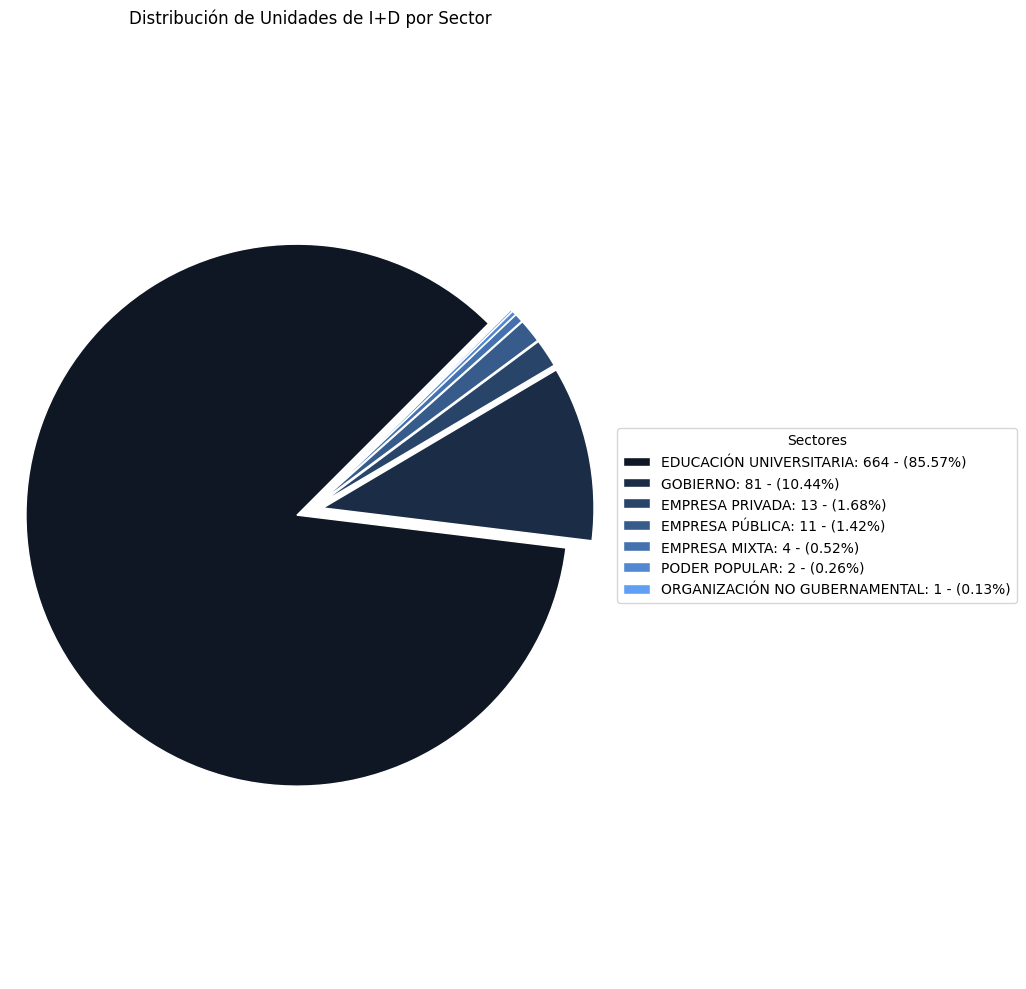

In [ ]:
"""
Crea un script en Python usando matplotlib que genere un gráfico de torta (pie chart) profesional para visualizar la distribución de unidades de I+D por sector, con las siguientes características:

Datos de entrada:
1. Usar un DataFrame llamado 'unidadesIyD' que contiene una columna 'SECTOR'
2. Calcular los conteos por sector usando value_counts()

Estilo del gráfico:
1. Tamaño de figura de 10x10 pulgadas
2. Gráfico circular perfecto (equal aspect ratio)
3. Ángulo inicial de 45 grados
4. Separación entre porciones (explode) de 0.05 para cada sector
5. Borde blanco de 1px de ancho en cada porción

Esquema de colores:
1. Usar un gradiente de colores basado en azul (RGB: [96, 159, 244])
2. Implementar la función generate_gradient_colors para generar la paleta

Leyenda mejorada:
1. Posicionada a la derecha del gráfico

Mostrar para cada sector:
1. Nombre del sector
2. Cantidad de unidades (formateado con separadores de miles)
3. Porcentaje del total (formateado a 2 decimales con signo %)
4. Título 'Sectores' para la leyenda
5. Tamaño de fuente 10

Título y formato:
1. Título centrado: 'Distribución de Unidades de I+D por Sector'
2. Tamaño de fuente 12
3. Padding de 20 unidades
4. Ajuste automático del layout para evitar cortes
5. Margen derecho amplio (0.7) para acomodar la leyenda

"""

# Asumiendo que el DataFrame 'unidadesIyD' existe y tiene una columna 'SECTOR'
plt.figure(figsize=(10, 10))

# Contar ocurrencias de cada sector
sector_counts = unidadesIyD['SECTOR'].value_counts()

# Definir color base para el gradiente
base_color = [96, 159, 244]  # Convertido a formato matplotlib [0-1]
# Generar colores del gradiente
colors = generate_gradient_colors(base_color, len(sector_counts))

# Configurar separación entre porciones
explode = [0.05] * len(sector_counts)

# Crear el gráfico de torta
wedges, texts = plt.pie(
    sector_counts,
    colors=colors,
    startangle=45,
    explode=explode,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
    textprops={'fontsize': 10}
)

# Asegurar que el gráfico sea un círculo perfecto
plt.axis('equal')

# Crear leyenda con formato mejorado
legend_labels = [
    f"{sector}: {count:,} - ({count/sector_counts.sum():.2%})"
    for sector, count in sector_counts.items()
]

plt.legend(
    wedges,
    legend_labels,
    title="Sectores",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
    fontsize=10
)

# Configurar título y layout
plt.title(
    'Distribución de Unidades de I+D por Sector',
    fontsize=12,
    pad=20,
    loc='center'
)

# Ajustar layout para evitar cortes
plt.tight_layout()
plt.subplots_adjust(left=0.1, right=0.7)  # Espacio para la leyenda

plt.show()

## Gráfico 12. Distribución de las unidades de I+D en el territorio nacional

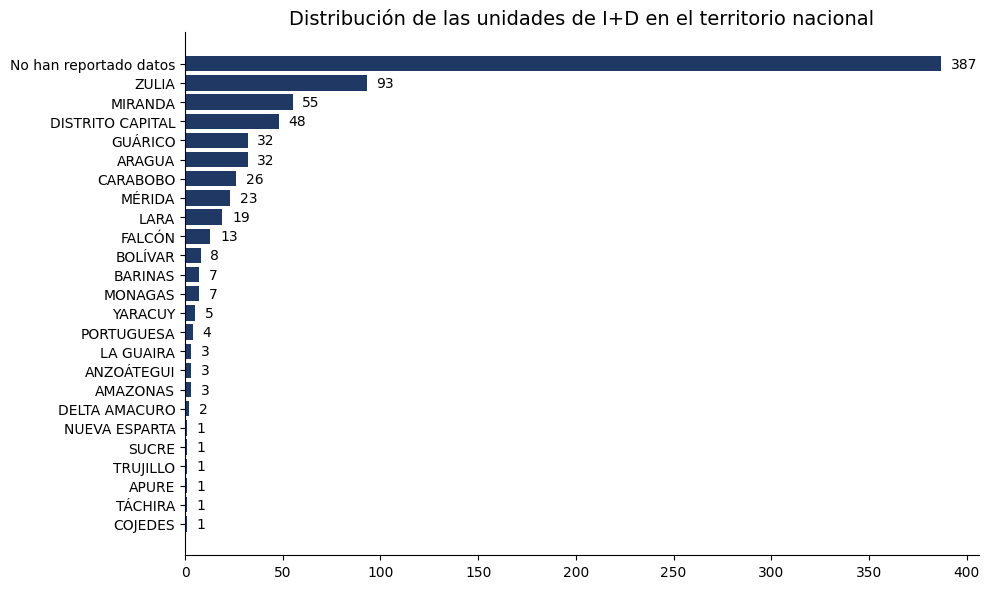

In [ ]:
"""
Crea un script Python usando matplotlib que genere un gráfico de barras horizontales profesional para visualizar la distribución
geográfica de unidades de I+D, con estas especificaciones:

Preprocesamiento de datos:
1. Rellenar valores NaN en la columna 'ESTADO' con 'No han reportado datos'
2. Contar ocurrencias por estado y ordenar en forma ascendente para mejor visualización

Configuración del gráfico:
1. Tamaño de figura de 10x6 pulgadas
2. Gráfico de barras horizontales (barh)
3. Color de barras: azul oscuro (#203864 en formato HEX)
4. Eliminar los bordes superior y derecho del gráfico

Formato y etiquetas:
1. Mostrar etiquetas de valor al final de cada barra
2. Posición: a la derecha de cada barra (ancho + 5 unidades)
3. Alineación vertical centrada respecto a la barra
4. Mostrar valores enteros sin decimales
5. Título centrado: 'Distribución de las unidades de I+D en el territorio nacional'
6. Tamaño de fuente 14
7. Ajuste automático del layout (tight_layout)

Estilo profesional:
1. Diseño limpio y minimalista
2. Buen contraste visual
3. Información numérica directamente accesible
4. Ordenamiento que facilite la comparación visual

El código resultante debe producir un gráfico claro que muestre la distribución territorial de las unidades de investigación,
destacando visualmente los estados con mayor concentración y manejando adecuadamente los casos sin datos reportados."

"""

# Fill NaN values in the 'ESTADO' column with 'No indica'
unidadesIyD['ESTADO'] = unidadesIyD['ESTADO'].fillna('No han reportado datos')

# Assuming 'unidadesIyD' DataFrame exists and has an 'ESTADO' column.
plt.figure(figsize=(10, 6))

# Count occurrences of each state, sort in descending order
estado_counts = unidadesIyD['ESTADO'].value_counts().sort_values(ascending=True)

# Create the horizontal bar chart
bars = plt.barh(estado_counts.index, estado_counts.values, color='#203864')

# Remove the top and right spines
for spine in ['top', 'right']:
    plt.gca().spines[spine].set_visible(False)

# Format x-axis ticks with thousands separator
ax = plt.gca()
#formatter = ticker.FuncFormatter(lambda x, pos: "{:,}".format(int(x)))
#ax.xaxis.set_major_formatter(formatter)

# Add data labels at the end of each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width+5, bar.get_y() + bar.get_height()/2, int(width), ha='left', va='center')

# Customize the plot
plt.title('Distribución de las unidades de I+D en el territorio nacional', loc='center', fontsize=14) # Title at top-left
plt.tight_layout() # Adjust layout

plt.show()


# Capítulo 5

In [ ]:
proyecto.head()

SECTOR                                          INSTANCIA  \
0  EDUCACIÓN UNIVERSITARIA  UNIVERSIDAD NACIONAL EXPERIMENTAL RAFAEL MARÍA...   
1  EDUCACIÓN UNIVERSITARIA  UNIVERSIDAD NACIONAL EXPERIMENTAL RAFAEL MARÍA...   
2  EDUCACIÓN UNIVERSITARIA  UNIVERSIDAD NACIONAL EXPERIMENTAL RAFAEL MARÍA...   
3  EDUCACIÓN UNIVERSITARIA  UNIVERSIDAD NACIONAL EXPERIMENTAL RAFAEL MARÍA...   
4  EDUCACIÓN UNIVERSITARIA  UNIVERSIDAD NACIONAL EXPERIMENTAL RAFAEL MARÍA...   

        FECHA                                             UNIDAD  \
0  2024-12-13  CENTRO DE INVESTIGACIóN EDUCATIVA EN BIOLOGÍA ...   
1  2024-12-13  CENTRO DE INVESTIGACIóN EDUCATIVA EN BIOLOGÍA ...   
2  2024-12-13  CENTRO DE INVESTIGACIóN EDUCATIVA EN BIOLOGÍA ...   
3  2024-12-13  CENTRO DE INVESTIGACIóN EDUCATIVA EN BIOLOGÍA ...   
4  2024-12-13  CENTRO DE INVESTIGACIóN EDUCATIVA EN BIOLOGÍA ...   

                                              TITULO  \
0  elaboración de productos QUÍMICOS de limpieza ...   
1  Estrategia Didáctica para el Desarrollo del Pr...   
2  Estrategias Creativas para un Aprendizaje Sign...   
3  ECO EDUCACIÓN como estrategia pedagógica en la...   
4  Identificación de insectos (phyllum: artrópoda...   

                                            OBJETIVO  FECHA INICIO  \
0  generar costos ECONÓMICOS como alternativa de ...           NaN   
1  determinar la Didáctica para el Desarrollo del...           NaN   
2  generar Estrategias Creativas para un Aprendiz...           NaN   
3  generar la ECO EDUCACIÓN COMO ESTRATEGIA PEDAG...           NaN   
4  determinar insectos (phyllum: artrópoda, clase...           NaN   

   FECHA_CULMINACION  FECHA PARALIZACION                   LOCALIZACION  ...  \
0                NaN                 NaN            GERMÁN rios linares  ...   
1                NaN                 NaN  parroquia GERMÁN RÍOS linares  ...   
2                NaN                 NaN  parroquia GERMÁN RÍOS linares  ...   
3                NaN                 NaN  parroquia GERMÁN RÍOS linares  ...   
4                NaN                 NaN  parroquia GERMÁN RÍOS linares  ...   

   HOMBRES  INSTITUCION       TIPO INVESTIGACION                AREA  \
0      NaN       unermb  DESARROLLO EXPERIMENTAL  CIENCIAS NATURALES   
1      NaN          NaN     INVESTIGACIÓN BÁSICA  CIENCIAS NATURALES   
2      NaN          NaN     INVESTIGACIÓN BÁSICA  CIENCIAS NATURALES   
3      NaN          NaN     INVESTIGACIÓN BÁSICA  CIENCIAS AGRÍCOLAS   
4      NaN          NaN     INVESTIGACIÓN BÁSICA  CIENCIAS AGRÍCOLAS   

  TIPO COOPERACION         TIPO PROYECTO TIPO SERVICIO ESTADO AVANCE  \
0         NACIONAL   PROYECTO PRODUCTIVO      PRODUCTO        ACTIVO   
1        NO APLICA   PROYECTO PRODUCTIVO      PRODUCTO        ACTIVO   
2        NO APLICA   PROYECTO PRODUCTIVO      PRODUCTO        ACTIVO   
3        NO APLICA   PROYECTO PRODUCTIVO      PRODUCTO        ACTIVO   
4        NO APLICA   PROYECTO PRODUCTIVO      PRODUCTO        ACTIVO   

                 TIPO PRODUCTO TIPO FINANCIAMIENTO  
0  PRODUCCIÓN A MODO DE PRUEBA             INTERNO  
1  PRODUCCIÓN A MODO DE PRUEBA            NO POSEE  
2  PRODUCCIÓN A MODO DE PRUEBA            NO POSEE  
3  PRODUCCIÓN A MODO DE PRUEBA            NO POSEE  
4  PRODUCCIÓN A MODO DE PRUEBA            NO POSEE  

[5 rows x 21 columns]

## Gráfico 13. Distribución de proyectos de I+D por sector del Sncti

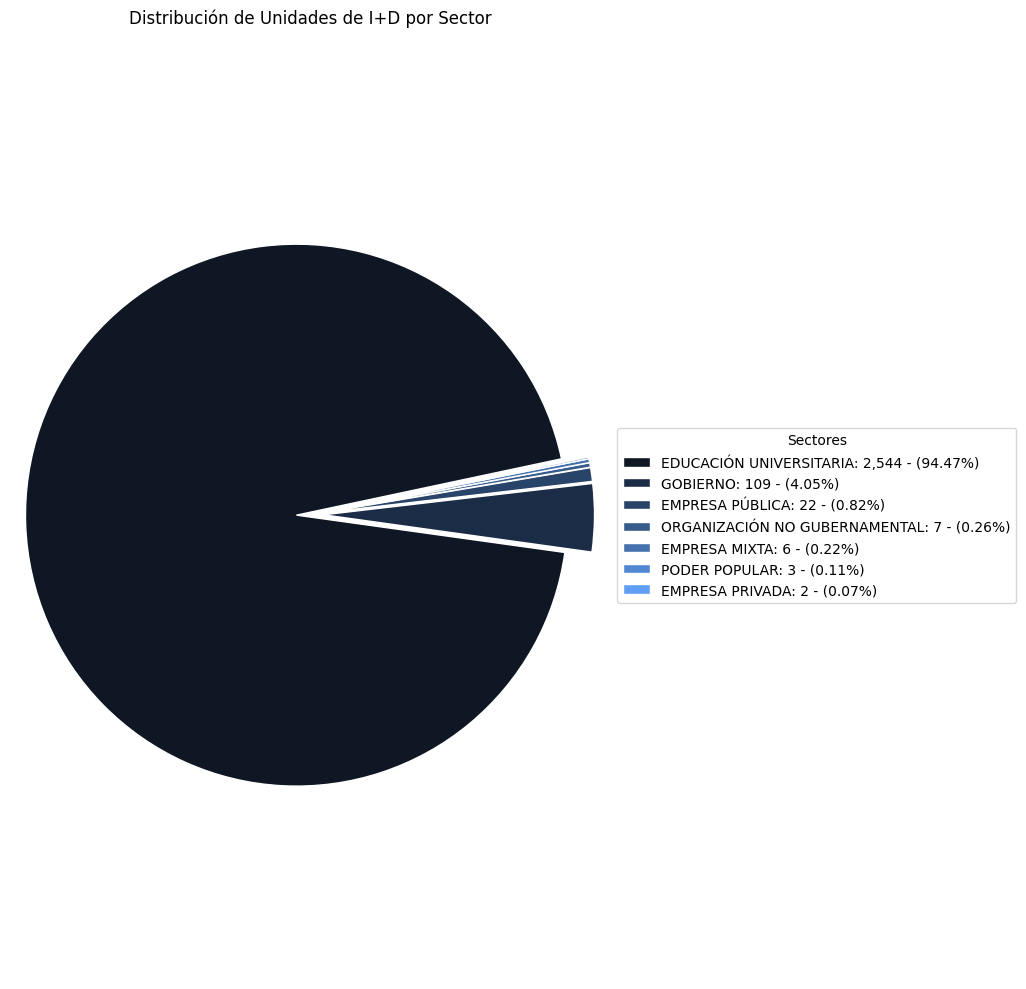

In [ ]:
# prompt: con la columna 'SECTOR' del dataframe 'proyecto' crea un gráfico de tortas con las categorías ordenadas ascendentemente y posea las siguientes características: "
# Datos de entrada:
# 1. Calcular los conteos por sector usando value_counts()
# Estilo del gráfico:
# 1. Tamaño de figura de 10x10 pulgadas
# 2. Gráfico circular perfecto (equal aspect ratio)
# 3. Ángulo inicial de 45 grados
# 4. Separación entre porciones (explode) de 0.05 para cada sector
# 5. Borde blanco de 1px de ancho en cada porción
# Esquema de colores:
# 1. Usar un gradiente de colores basado en azul (RGB: [96, 159, 244])
# 2. Implementar la función generate_gradient_colors para generar la paleta
# Leyenda mejorada:
# 1. Posicionada a la derecha del gráfico
# Mostrar para cada sector:
# 1. Nombre del sector
# 2. Cantidad de unidades (formateado con separadores de miles)
# 3. Porcentaje del total (formateado a 2 decimales con signo %)
# 4. Título 'Sectores' para la leyenda
# 5. Tamaño de fuente 10
# Título y formato:
# 1. Título centrado: 'Distribución de Unidades de I+D por Sector'
# 2. Tamaño de fuente 12
# 3. Padding de 20 unidades
# 4. Ajuste automático del layout para evitar cortes
# 5. Margen derecho amplio (0.7) para acomodar la leyenda
# "


# Assuming 'proyecto' DataFrame exists and has a 'SECTOR' column.
plt.figure(figsize=(10, 10))

# Count occurrences of each sector
sector_counts = proyecto['SECTOR'].value_counts().sort_values(ascending=False) # Sort sectors

# Define base color for the gradient
base_color = [96, 159, 244]  # Converted to matplotlib format [0-1]

# Generate gradient colors
colors = generate_gradient_colors(base_color, len(sector_counts))


# Configure separation between slices
explode = [0.05] * len(sector_counts)

# Create the pie chart
wedges, texts = plt.pie(
    sector_counts,
    colors=colors,
    startangle=12,
    explode=explode,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
    textprops={'fontsize': 10}
)

# Ensure the chart is a perfect circle
plt.axis('equal')

# Create legend with improved formatting
legend_labels = [
    f"{sector}: {count:,} - ({count/sector_counts.sum():.2%})"
    for sector, count in sector_counts.items()
]

plt.legend(
    wedges,
    legend_labels,
    title="Sectores",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
    fontsize=10
)

# Configure title and layout
plt.title(
    'Distribución de Unidades de I+D por Sector',
    fontsize=12,
    pad=20,
    loc='center'
)

# Adjust layout to prevent clipping
plt.tight_layout()
plt.subplots_adjust(left=0.1, right=0.7)  # Space for the legend

plt.show()


## Gráfico 14. Distribución de los proyectos de I+D por área de conocimiento

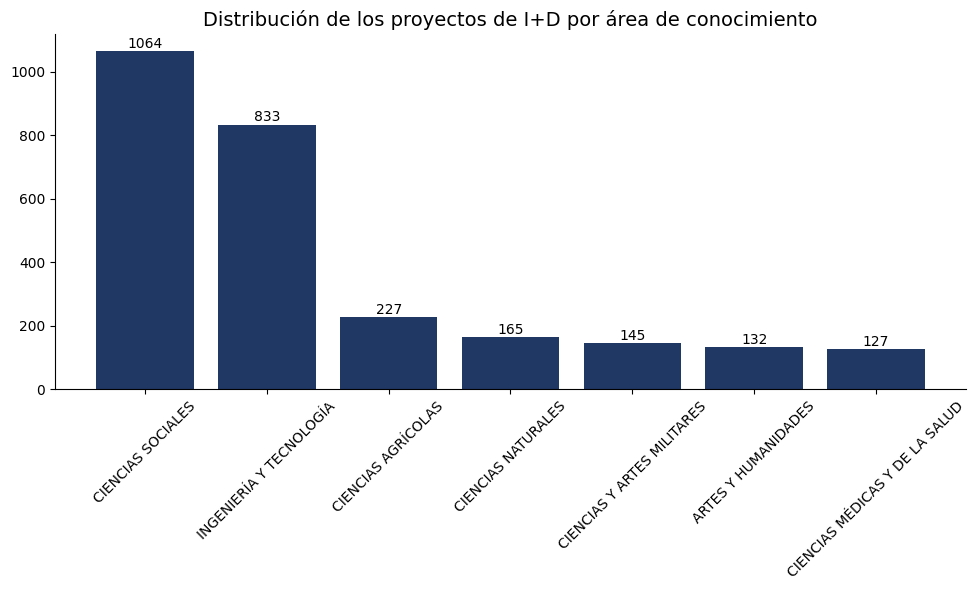

In [ ]:
# Assuming 'proyecto' DataFrame exists and has an 'AREA' column.
plt.figure(figsize=(10, 6))

# Count occurrences of each area, sort in descending order
area_counts = proyecto['AREA'].value_counts().sort_values(ascending=False)

# Create the vertical bar chart
bars = plt.bar(area_counts.index, area_counts.values, color='#203864')

# Remove the top and right spines
for spine in ['top', 'right']:
    plt.gca().spines[spine].set_visible(False)

# Add data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, yval, ha='center', va='bottom')

# Customize the plot
plt.title('Distribución de los proyectos de I+D por área de conocimiento', loc='center', fontsize=14)
plt.xticks(rotation=45, ha='center') # Rotate x-axis labels for better readability
plt.tight_layout()

plt.show()

## Gráfico 15. Distribución de proyectos de I+D por estado de avance

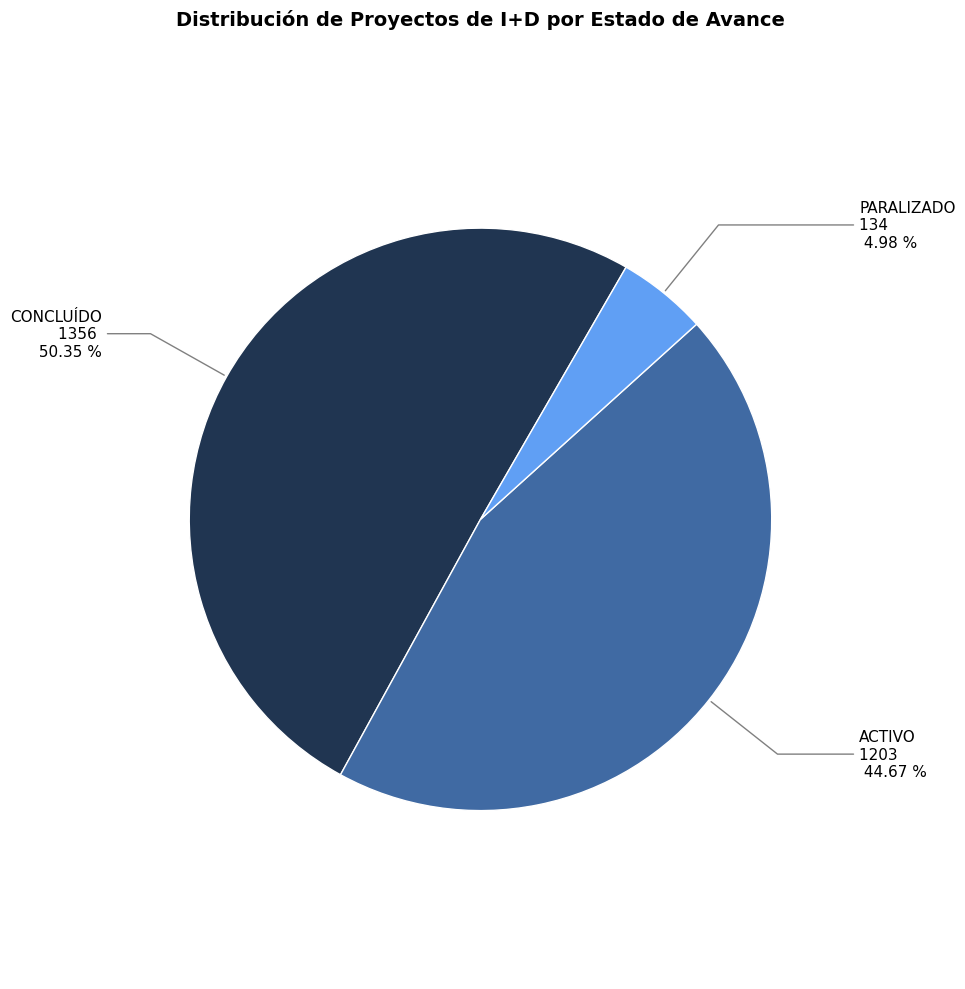

In [ ]:
"""
Crea un gráfico de torta (pie chart) profesional que muestre la distribución de proyectos de I+D por estado de avance, con las siguientes características:

1. Estilo visual:
Usar un gradiente de azules (#203864 como color base)
Tamaño de figura 10x10 pulgadas
Bordes blancos entre las porciones (wedgeprops)
Gráfico perfectamente circular (axis equal)

2. Etiquetas externas:
Mostrar fuera del gráfico con líneas guía grises
Formato de etiqueta:
Nombre del estado (primera línea)
Cantidad de proyectos (segunda línea)
Porcentaje con 2 decimales (tercera línea)
Fuente tamaño 11 para las etiquetas

3. Distribución de datos:
Ordenar por frecuencia descendente
Ángulo inicial a 60 grados
Distancia de porcentajes al 85% del radio (pctdistance)

4. Título:
Texto: 'Distribución de Proyectos de I+D por Estado de Avance'
Tamaño de fuente 14
Negrita
Padding de 25 puntos
Centrado

5. Requisitos técnicos:
Usar matplotlib
Asegurar buen espaciado (tight_layout)
Mostrar el gráfico al final

El gráfico debe generarse a partir de una columna llamada 'ESTADO AVANCE' en un DataFrame llamado 'proyecto', mostrando claramente la proporción de proyectos en cada estado con etiquetas legibles que no se solapen."

"""

# Assuming 'proyecto' DataFrame exists and has an 'ESTADO AVANCE' column.
plt.figure(figsize=(10, 10))  # Tamaño ligeramente mayor para mejor visualización

# Count occurrences of each state, sort in descending order
estado_avance_counts = proyecto['ESTADO AVANCE'].value_counts().sort_values(ascending=False)

# Define base color for the gradient
base_color = [96, 159, 244]  # Converted to matplotlib format [0-1]

# Generate gradient colors
colors = generate_gradient_colors(base_color, len(estado_avance_counts))



# Crear el gráfico de torta
wedges, texts, autotexts = plt.pie(
    estado_avance_counts,
    colors=colors,
    autopct='',
    startangle=60,
    pctdistance=0.85,
    textprops={'fontsize': 10},
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
)

# Asegurar que el gráfico sea un círculo perfecto
plt.axis('equal')

# Configuración para las etiquetas externas
kw = dict(arrowprops=dict(arrowstyle="-", color='gray'),
          zorder=0,
          va="center",
          fontsize=11)

for i, (wedge, label, count) in enumerate(zip(wedges, estado_avance_counts.index, estado_avance_counts)):
    # Calcular ángulo medio de la porción
    ang = (wedge.theta2 - wedge.theta1) / 2. + wedge.theta1
    y = np.sin(np.deg2rad(ang))  # Coordenada y
    x = np.cos(np.deg2rad(ang))  # Coordenada x

    # Determinar alineación horizontal
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})

    # Calcular porcentaje
    percentage = 100 * count / estado_avance_counts.sum()

    # Texto de la etiqueta con nombre, conteo y porcentaje
    label_text = f"{label}\n{count} \n {percentage:.2f} %"
    plt.annotate(
        label_text,
        xy=(x, y),
        xytext=(1.3 * np.sign(x), 1.3 * y),
        horizontalalignment=horizontalalignment,
        **kw
    )

# Personalizar el título del gráfico
plt.title('Distribución de Proyectos de I+D por Estado de Avance',
          fontsize=14, fontweight='bold', pad=25, loc='center')

# Ajustar layout para evitar cortes
plt.tight_layout()
plt.show()

## Gráfico 16. Distribución de proyectos de I+D por división político territorial

In [ ]:

proyecto = proyecto.rename(columns={'INSTANCIA': 'NOMBRE DE LA ORGANIZACIÓN', 'UNIDAD': 'NOMBRE DE LA UNIDAD'})
"""

# Merge the two dataframes
proyecto_merge = pd.merge(unidadesIyD, proyecto, on='NOMBRE DE LA UNIDAD', how='left')


# Exportar el DataFrame unidadesIyD a un archivo Excel
proyecto_merge.to_excel('proyecto_merge.xlsx', index=False)

# Mostrar un mensaje de éxito
print('\nEl DataFrame ha sido exportado exitosamente a proyecto_merge.xlsx\n')

proyecto_merge
"""

"\n\n# Merge the two dataframes\nproyecto_merge = pd.merge(unidadesIyD, proyecto, on='NOMBRE DE LA UNIDAD', how='left')\n\n\n# Exportar el DataFrame unidadesIyD a un archivo Excel\nproyecto_merge.to_excel('proyecto_merge.xlsx', index=False)\n\n# Mostrar un mensaje de éxito\nprint('\nEl DataFrame ha sido exportado exitosamente a proyecto_merge.xlsx\n')\n\nproyecto_merge\n"

In [ ]:
# prompt: para los dataframe 'proyecto' y 'unidadesIyD' escribe un código que verifique cada elemento coincidente de la columna 'NOMBRE DE LA UNIDAD' de ambos dataframe, cree una copia del dataframe 'proyecto' y le agregue una columna 'Estado', la cual toma los valores de la columna 'ESTADO' del dataframe 'unidadesIyD'. posteriormente muestre el dataframe copiado

# Assuming 'proyecto' and 'unidadesIyD' dataframes are already loaded.

# Check for matching elements in 'NOMBRE DE LA UNIDAD' column
matching_units = set(proyecto['NOMBRE DE LA UNIDAD']).intersection(set(unidadesIyD['NOMBRE DE LA UNIDAD']))

# Create a copy of the 'proyecto' dataframe
proyecto_copy = proyecto.copy()

# Add a new column 'Estado' to the copied dataframe
proyecto_copy['Estado'] = ''

# Iterate over matching units and update the 'Estado' column
for unit in matching_units:
    # Get the corresponding 'ESTADO' value from 'unidadesIyD'
    estado_value = unidadesIyD.loc[unidadesIyD['NOMBRE DE LA UNIDAD'] == unit, 'ESTADO'].iloc[0]

    # Update the 'Estado' column in 'proyecto_copy' for matching units
    proyecto_copy.loc[proyecto_copy['NOMBRE DE LA UNIDAD'] == unit, 'Estado'] = estado_value


# Display the copied dataframe
proyecto_copy
"""
# Exportar el DataFrame unidadesIyD a un archivo Excel
proyecto_copy.to_excel('proyecto_copy.xlsx', index=False)

# Mostrar un mensaje de éxito
print('\nEl DataFrame ha sido exportado exitosamente a proyecto_copy.xlsx\n')

proyecto_copy
"""


"\n# Exportar el DataFrame unidadesIyD a un archivo Excel\nproyecto_copy.to_excel('proyecto_copy.xlsx', index=False)\n\n# Mostrar un mensaje de éxito\nprint('\nEl DataFrame ha sido exportado exitosamente a proyecto_copy.xlsx\n')\n\nproyecto_copy\n"

## Gráfico 17. Distribución de documentos de I+D por sector del Sncti

## Gráfico 18. Distribución de documentos de I+D por tipo

## Gráfico 19. Distribución de documentos de I+D por área de conocimiento

## Gráfico 20. Distribución de la autoría de la producción de documentos de I+D por sexo

## Gráfico 21. Distribución de revistas cientícas venezolanas arbitradas por estatus de indización

## Gráfico 22. Distribución de revistas cientícas venezolanas artibtradas por instituciones según la naturaleza jurídica

## Gráfico 23. Distribución de revistas cientícas venezolanas arbitradas con artículos publicados durante el 2023

## Gráfico 24. Ditribución de productos de propiedad intelectual por modalidad de registro

## Gráfico 25. Distribución de productos de propiedad intelectual por área de conocimiento

## Gráfico 26. Distribución del estatus de las solicitudes de propiedad intelectual

## Gráfico 27. Distribución de productos de propiedad intelectual por sector del Sncti

# Capítulo 6

## Distribución de fuentes de financiamiento (Los montos están expresados en millones de bolívares)

In [ ]:
columnas_grafico_9 = [
		     'FONDOS PROVENIENTES DEL ESTADO', 'FONDOS PROVENIENTES DE INSTITUCIONES PUBLICA', 'FONDOS PROVENIENTES DE ORGANIZACION SIN FINES DE LUCRO ', 'FONDOS PROVENIENTES DE INSTITUCIONES PRIVADAS',
		     'FONDOS PROVENIENTES DE INSTITUCIONES DE EDUCACION UNIVERSITARIAS', 'FONDOS PROVENIENTES DE EMPRESAS U ORGANISMOS INTERNACIONALES'
		     ]

In [ ]:
# prompt: para el dataframe 'gastos_merge' genera un gráfico de torta con las sumatorias de cada una de las columnas mencionadas en la lista 'columnas_grafico_9'

# Calculate the sum of each column specified in columnas_grafico_9
column_sums = gastos_merge[columnas_grafico_9].sum()

# Handle NaN values (Replace NaN with 0)
column_sums = column_sums.fillna(0)  # Replace NaN with 0

# Filter out zero values to avoid the ValueError
column_sums = column_sums[column_sums != 0]

# Create the pie chart if there is data to plot
if len(column_sums) > 0:  # Check if there's any data left after filtering
    plt.figure(figsize=(10, 8))
    wedges, texts, autotexts = plt.pie(
        column_sums,
        labels=column_sums.index,
        autopct='%1.1f%%',
        startangle=90,
        textprops={'fontsize': 10}
    )

    # Equal aspect ratio ensures that pie is drawn as a circle
    plt.axis('equal')

    # Customize title and labels
    plt.title('Distribución del gasto de inversión en personal e infraestructura', fontsize=14)
    plt.tight_layout()

    # Show the plot
    plt.show()
else:
    print("No data available to generate the pie chart. All values are zero.")

No data available to generate the pie chart. All values are zero.


# 4. Globalización

4.1. Cooperación para las actividades I+D (Cantidad de proyectos en cooperación)

In [ ]:
# muestra cuantos proyectos en cooperación tiene la instancia registrada
cooperacion

SECTOR  \
0    EDUCACIÓN UNIVERSITARIA   
1    EDUCACIÓN UNIVERSITARIA   
2    EDUCACIÓN UNIVERSITARIA   
3    EDUCACIÓN UNIVERSITARIA   
4    EDUCACIÓN UNIVERSITARIA   
..                       ...   
139                 GOBIERNO   
140                 GOBIERNO   
141  EDUCACIÓN UNIVERSITARIA   
142                 GOBIERNO   
143                 GOBIERNO   

                                             INSTANCIA       FECHA  \
0              UNIVERSIDAD CATÓLICA DEL TÁCHIRA (UCAT)  2025-02-28   
1    UNIVERSIDAD MILITAR BOLIVARIANA DE VENEZUELA (...  2025-02-26   
2    UNIVERSIDAD POLITÉCNICA TERRITORIAL DEL ESTADO...  2025-03-10   
3    UNIVERSIDAD POLITÉCNICA TERRITORIAL DEL ESTADO...  2025-03-10   
4    UNIVERSIDAD POLITÉCNICA TERRITORIAL DEL ESTADO...  2025-03-10   
..                                                 ...         ...   
139  FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y L...  2024-12-23   
140  FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y L...  2024-12-23   
141  UNIVERSIDAD NACIONAL EXPERIMENTAL RAFAEL MARÍA...  2024-12-13   
142  OBSERVATORIO NACIONAL DE CIENCIA, TECNOLOGÍA E...  2024-12-12   
143  OBSERVATORIO NACIONAL DE CIENCIA, TECNOLOGÍA E...  2024-12-12   

                                          ORGANIZACION  \
0              UNIVERSIDAD CATÓLICA DEL TÁCHIRA (UCAT)   
1    UNIVERSIDAD MILITAR BOLIVARIANA DE VENEZUELA (...   
2    UNIVERSIDAD POLITÉCNICA TERRITORIAL DEL ESTADO...   
3    UNIVERSIDAD POLITÉCNICA TERRITORIAL DEL ESTADO...   
4    UNIVERSIDAD POLITÉCNICA TERRITORIAL DEL ESTADO...   
..                                                 ...   
139  FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y L...   
140  FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y L...   
141  UNIVERSIDAD NACIONAL EXPERIMENTAL RAFAEL MARÍA...   
142  OBSERVATORIO NACIONAL DE CIENCIA, TECNOLOGÍA E...   
143  OBSERVATORIO NACIONAL DE CIENCIA, TECNOLOGÍA E...   

                                  MODALIDAD ESTATUS TIPO ENTE TIPO RELACION  \
0    COOPERACIÓN FINANCIERA NO REEMBOLSABLE  ACTIVO   PRIVADO  MULTILATERAL   
1    COOPERACIÓN FINANCIERA NO REEMBOLSABLE  ACTIVO   PÚBLICO     BILATERAL   
2    COOPERACIÓN FINANCIERA NO REEMBOLSABLE  ACTIVO   PÚBLICO     BILATERAL   
3    COOPERACIÓN FINANCIERA NO REEMBOLSABLE  ACTIVO   PÚBLICO     BILATERAL   
4    COOPERACIÓN FINANCIERA NO REEMBOLSABLE  ACTIVO   PÚBLICO     BILATERAL   
..                                      ...     ...       ...           ...   
139  COOPERACIÓN FINANCIERA NO REEMBOLSABLE  ACTIVO   PÚBLICO  MULTILATERAL   
140  COOPERACIÓN FINANCIERA NO REEMBOLSABLE  ACTIVO   PÚBLICO  MULTILATERAL   
141  COOPERACIÓN FINANCIERA NO REEMBOLSABLE  ACTIVO   PÚBLICO     BILATERAL   
142  COOPERACIÓN FINANCIERA NO REEMBOLSABLE  ACTIVO   PRIVADO     BILATERAL   
143     COOPERACIÓN FINANCIERA REEMBOLSABLE  ACTIVO   PÚBLICO     BILATERAL   

     MONTO       PAIS                                          ORGANISMO  \
0      0.0        NaN  Asociacion de universidades confiadas a la com...   
1      0.0  VENEZUELA                                            müronto   
2      0.0  VENEZUELA      alcaldia bolivariana del municipio libertador   
3      0.0  VENEZUELA                              fundacion dario vivas   
4      0.0  VENEZUELA                                           cenditel   
..     ...        ...                                                ...   
139    0.0        NaN                                              uptag   
140    0.0        NaN                                              UNEFM   
141    0.0  VENEZUELA                                    fundacite zulia   
142    0.0  VENEZUELA  Centro de estudios para la seguridad y desarro...   
143    0.0  VENEZUELA  Universidad nacional experimental jose maría b...   

    TIPO ENTE NOMBRE ESTATUS NOMBRE TIPO RELACION NOMBRE  PAIS 1 NOMBRE  \
0            PRIVADO         ACTIVO         MULTILATERAL            NaN   
1            PÚBLICO         ACTIVO            BILATERAL            NaN   
2           

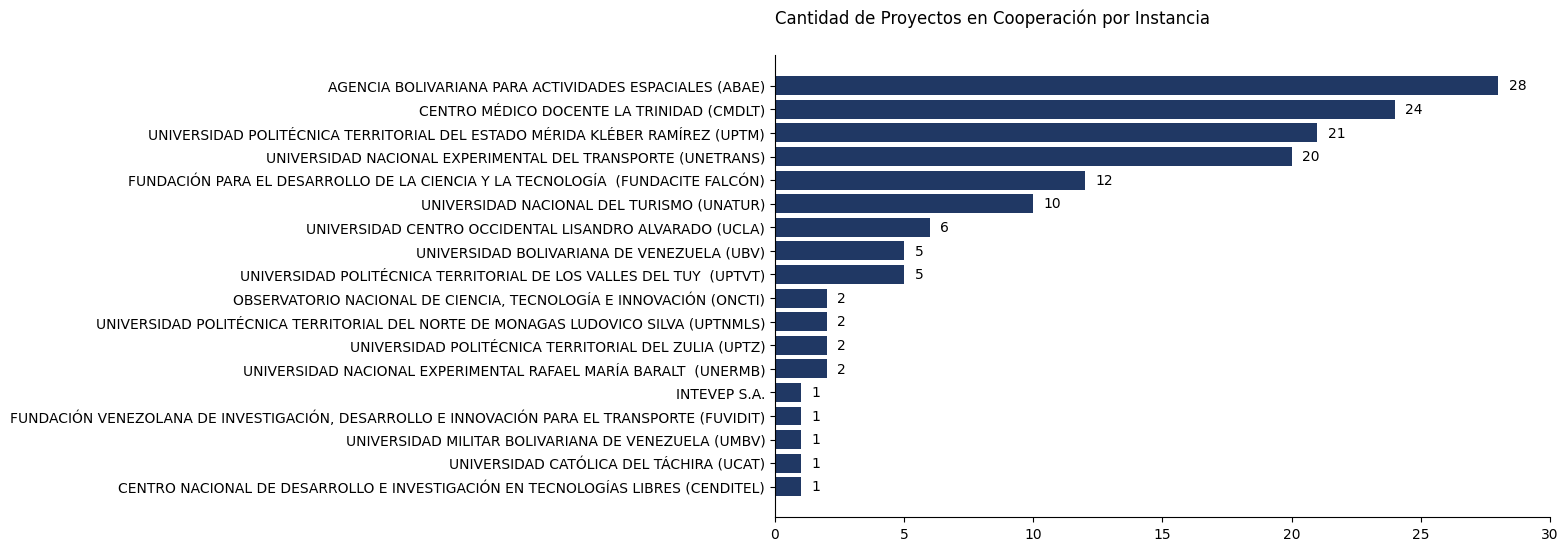

In [ ]:
# Assuming 'cooperacion' DataFrame exists and has an 'INSTANCIA' column.
instancia_counts = cooperacion['INSTANCIA'].value_counts().sort_values(ascending=True)

plt.figure(figsize=(10, 6))  # Adjust figure size as needed
bars3 = plt.barh(instancia_counts.index, instancia_counts.values, color='#203864')

# Eliminar las líneas superior y derecha
for spine in ['top', 'right']:
    plt.gca().spines[spine].set_visible(False)

# Formatear el eje horizontal para mostrar números enteros
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

# Establecer los ticks del eje horizontal de 5 en 5
max_value = int(max(instancia_counts.values))
plt.xticks(range(0, max_value + 5, 5))  # Incremento de 5 en 5

padding1 = 0.4
# Agregar etiquetas de datos a cada barra
for bar in bars3:
    width = bar.get_width()
    plt.text(width + padding1, bar.get_y() + bar.get_height() / 2, f'{int(width)}', ha='left', va='center')

plt.title('Cantidad de Proyectos en Cooperación por Instancia', loc='left', y=1.05)

plt.show()

4.2. Derechos de Propiedad (Cantidad de derechos de propiedad)

In [ ]:
# muestra cuantos derechos de propiedad tiene la instancia registrada
derechos

SECTOR                                   INSTANCIA       FECHA  \
0       7                CULTORES/TECNÓLOGOS WGIMÉNEZ  2025-03-25   
1       7                CULTORES/TECNÓLOGOS WGIMÉNEZ  2025-03-25   
2       7                CULTORES/TECNÓLOGOS WGIMÉNEZ  2025-03-25   
3       4  TELECOMUNICACIONES GRAN CARIBE, C.A. (TGC)  2024-12-12   

                                 ORGANIZACION          MODALIDAD     ESTATUS  \
0                CULTORES/TECNÓLOGOS WGIMÉNEZ              MARCA  SOLICITADA   
1                CULTORES/TECNÓLOGOS WGIMÉNEZ  MODELO INDUSTRIAL  SOLICITADA   
2                CULTORES/TECNÓLOGOS WGIMÉNEZ   DERECHO DE AUTOR  SOLICITADA   
3  TELECOMUNICACIONES GRAN CARIBE, C.A. (TGC)   DERECHO DE AUTOR  SOLICITADA   

                                           ORGANISMO       PAIS  \
0                                              oncti  VENEZUELA   
1                                              oncti  VENEZUELA   
2                                              oncti  VENEZUELA   
3  Servicio Autónomo de la Propiedad Intelectual ...  VENEZUELA   

                         AREA  SOLICITUD   MODALIDAD_NOMBRE ESTATUS NOMBRE  \
0  CIENCIAS Y ARTES MILITARES        NaN              MARCA     SOLICITADA   
1     INGENIERÍA Y TECNOLOGÍA        NaN  MODELO INDUSTRIAL     SOLICITADA   
2     INGENIERÍA Y TECNOLOGÍA        NaN   DERECHO DE AUTOR     SOLICITADA   
3     INGENIERÍA Y TECNOLOGÍA        NaN   DERECHO DE AUTOR     SOLICITADA   

  PAIS NOMBRE                 AREA NOMBRE  
0   VENEZUELA  CIENCIAS Y ARTES MILITARES  
1   VENEZUELA     INGENIERÍA Y TECNOLOGÍA  
2   VENEZUELA     INGENIERÍA Y TECNOLOGÍA  
3   VENEZUELA     INGENIERÍA Y TECNOLOGÍA

Formato español aplicado


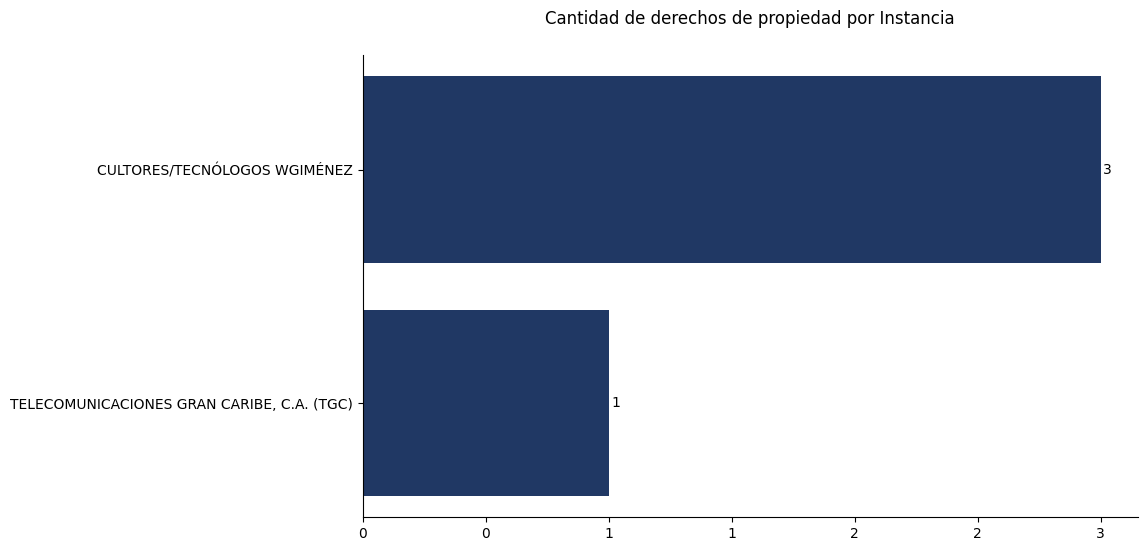

In [ ]:
# Assuming 'cooperacion' DataFrame exists and has an 'INSTANCIA' column.
instancia_counts2 = derechos['INSTANCIA'].value_counts().sort_values(ascending=True)

plt.figure(figsize=(10, 6))  # Adjust figure size as needed
bars4 = plt.barh(instancia_counts2.index, instancia_counts2.values, color='#203864')

# Eliminar las líneas superior y derecha
for spine in ['top', 'right']:
    plt.gca().spines[spine].set_visible(False)

# Configurar la localización para utilizar puntos como separadores de miles en español
try:
    locale.setlocale(locale.LC_ALL, 'es_ES.UTF-8')
except locale.Error:
    try:
        locale.setlocale(locale.LC_ALL, 'es_ES')
    except locale.Error:
        locale.setlocale(locale.LC_ALL, '')
        print("Formato español aplicado")

# Formatear el eje horizontal para mostrar separadores de miles
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: cambiar_separadores(locale.format_string("%d", int(x), grouping=True))))

padding1 = 0.01
# Agregar etiquetas de datos a cada barra
for bar in bars4:
    width = bar.get_width()
    plt.text(width + padding1, bar.get_y() + bar.get_height()/2, f'{int(width)}', ha='left', va='center')

plt.title('Cantidad de derechos de propiedad por Instancia', loc = 'center', y = 1.05)

plt.show()

# 5. Tecnologías de la Información y Comunicación (TIC)

5.1. Acceso a Internet (No sirve lo que muestra. Solo muestra las mismas instancias)

In [ ]:
acceso_internet

SECTOR  \
0                   GOBIERNO   
1                   GOBIERNO   
2    EDUCACIÓN UNIVERSITARIA   
3                   GOBIERNO   
4                   GOBIERNO   
..                       ...   
145                 GOBIERNO   
146            PODER POPULAR   
147  EDUCACIÓN UNIVERSITARIA   
148  EDUCACIÓN UNIVERSITARIA   
149  EDUCACIÓN UNIVERSITARIA   

                                             INSTANCIA       FECHA  ACCESO  \
0    FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y L...  2024-12-12     NaN   
1    FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y L...  2024-12-13     NaN   
2    UNIVERSIDAD NACIONAL EXPERIMENTAL FRANCISCO DE...  2024-12-13     NaN   
3    FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y L...  2024-12-13     NaN   
4    FUNDACIÓN INSTITUTO DE INGENIERÍA PARA INVESTI...  2024-12-13     NaN   
..                                                 ...         ...     ...   
145  MINISTERIO DEL PODER POPULAR PARA LA CULTURA (...  2025-04-15     NaN   
146                         CULTORES/TECNÓLOGOS LNAVAS  2025-01-22     1.0   
147      COLEGIO UNIVERSITARIO DE PSICOPEDAGOGÍA (CUP)  2025-04-21     NaN   
148   INSTITUTO UNIVERSITARIO DE MERCADOTECNIA (ISUM)   2025-04-21     NaN   
149  INSTITUTO UNIVERSITARIO DE TECNOLOGÍA POLYCOM ...  2025-04-21     NaN   

     ESTACIONES  ESTACIONES INTERNET  VELOCIDAD  
0           NaN                  NaN        NaN  
1           NaN                  NaN        NaN  
2           NaN                  NaN        NaN  
3           NaN                  NaN        NaN  
4           NaN                  NaN        NaN  
..          ...                  ...        ...  
145         NaN                  NaN        NaN  
146         4.0                  4.0        5.0  
147         NaN                  NaN        NaN  
148         NaN                  NaN        NaN  
149         NaN                  NaN        NaN  

[150 rows x 7 columns]

5.2. Acceso Remoto (No sirve lo que muestra. Solo muestra las mismas instancias)

In [ ]:
acceso_remoto

SECTOR  \
0                   GOBIERNO   
1    EDUCACIÓN UNIVERSITARIA   
2                   GOBIERNO   
3                   GOBIERNO   
4                   GOBIERNO   
..                       ...   
145                 GOBIERNO   
146                 GOBIERNO   
147  EDUCACIÓN UNIVERSITARIA   
148  EDUCACIÓN UNIVERSITARIA   
149  EDUCACIÓN UNIVERSITARIA   

                                             INSTANCIA       FECHA  CORREO  \
0    FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y L...  2024-12-12     NaN   
1    UNIVERSIDAD POLITÉCNICA TERRITORIAL DEL NORTE ...  2024-12-13     NaN   
2    FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y L...  2024-12-13     NaN   
3    FUNDACIÓN INSTITUTO DE INGENIERÍA PARA INVESTI...  2024-12-13     NaN   
4    OBSERVATORIO NACIONAL DE CIENCIA, TECNOLOGÍA E...  2024-12-12     1.0   
..                                                 ...         ...     ...   
145  INSTITUTO NACIONAL DE GEOLOGÍA Y MINERÍA (INGE...  2025-04-14     NaN   
146  MINISTERIO DEL PODER POPULAR PARA LA CULTURA (...  2025-04-15     NaN   
147      COLEGIO UNIVERSITARIO DE PSICOPEDAGOGÍA (CUP)  2025-04-21     NaN   
148   INSTITUTO UNIVERSITARIO DE MERCADOTECNIA (ISUM)   2025-04-21     NaN   
149  INSTITUTO UNIVERSITARIO DE TECNOLOGÍA POLYCOM ...  2025-04-21     NaN   

     DOCUMENTOS  APLICACIONES  BASE DATOS OTRO  
0           NaN           NaN         NaN  NaN  
1           NaN           NaN         NaN  NaN  
2           NaN           NaN         NaN  NaN  
3           NaN           NaN         NaN  NaN  
4           0.0           0.0         0.0  NaN  
..          ...           ...         ...  ...  
145         NaN           NaN         NaN  NaN  
146         NaN           NaN         NaN  NaN  
147         NaN           NaN         NaN  NaN  
148         NaN           NaN         NaN  NaN  
149         NaN           NaN         NaN  NaN  

[150 rows x 8 columns]

5.3. Seguridad (No sirve lo que muestra. Solo muestra las mismas instancias)

In [ ]:
seguridad

SECTOR  \
0                   GOBIERNO   
1                   GOBIERNO   
2                   GOBIERNO   
3                   GOBIERNO   
4                   GOBIERNO   
..                       ...   
145                 GOBIERNO   
146                 GOBIERNO   
147  EDUCACIÓN UNIVERSITARIA   
148  EDUCACIÓN UNIVERSITARIA   
149  EDUCACIÓN UNIVERSITARIA   

                                             INSTANCIA       FECHA  CLAVE  \
0    FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y L...  2024-12-12    NaN   
1    FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y L...  2024-12-13    NaN   
2    FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y L...  2024-12-13    NaN   
3    FUNDACIÓN INSTITUTO DE INGENIERÍA PARA INVESTI...  2024-12-13    NaN   
4    FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y L...  2025-01-13    1.0   
..                                                 ...         ...    ...   
145  INSTITUTO NACIONAL DE GEOLOGÍA Y MINERÍA (INGE...  2025-04-14    NaN   
146  MINISTERIO DEL PODER POPULAR PARA LA CULTURA (...  2025-04-15    NaN   
147      COLEGIO UNIVERSITARIO DE PSICOPEDAGOGÍA (CUP)  2025-04-21    NaN   
148   INSTITUTO UNIVERSITARIO DE MERCADOTECNIA (ISUM)   2025-04-21    NaN   
149  INSTITUTO UNIVERSITARIO DE TECNOLOGÍA POLYCOM ...  2025-04-21    NaN   

     BIOMETRICOS  COMBINACION  ENCRIPTADO  COPIA  CONTROL  VPN  SISTEMA  LOG  
0            NaN          NaN         NaN    NaN      NaN  NaN      NaN  NaN  
1            NaN          NaN         NaN    NaN      NaN  NaN      NaN  NaN  
2            NaN          NaN         NaN    NaN      NaN  NaN      NaN  NaN  
3            NaN          NaN         NaN    NaN      NaN  NaN      NaN  NaN  
4            0.0          0.0         1.0    1.0      1.0  0.0      0.0  0.0  
..           ...          ...         ...    ...      ...  ...      ...  ...  
145          NaN          NaN         NaN    NaN      NaN  NaN      NaN  NaN  
146          NaN          NaN         NaN    NaN      NaN  NaN      NaN  NaN  
147          NaN          NaN         NaN    NaN      NaN  NaN      NaN  NaN  
148          NaN          NaN         NaN    NaN      NaN  NaN      NaN  NaN  
149          NaN          NaN         NaN    NaN      NaN  NaN      NaN  NaN  

[150 rows x 12 columns]

5.4. Infraestructura (No sirve lo que muestra. Solo muestra las mismas instancias)

In [ ]:
infraestructura

SECTOR  \
0                   PODER POPULAR   
1         EDUCACIÓN UNIVERSITARIA   
2                        GOBIERNO   
3         EDUCACIÓN UNIVERSITARIA   
4         EDUCACIÓN UNIVERSITARIA   
5         EDUCACIÓN UNIVERSITARIA   
6         EDUCACIÓN UNIVERSITARIA   
7         EDUCACIÓN UNIVERSITARIA   
8         EDUCACIÓN UNIVERSITARIA   
9         EDUCACIÓN UNIVERSITARIA   
10        EDUCACIÓN UNIVERSITARIA   
11                       GOBIERNO   
12        EDUCACIÓN UNIVERSITARIA   
13                       GOBIERNO   
14                       GOBIERNO   
15                EMPRESA PRIVADA   
16                       GOBIERNO   
17                       GOBIERNO   
18        EDUCACIÓN UNIVERSITARIA   
19                       GOBIERNO   
20        EDUCACIÓN UNIVERSITARIA   
21                       GOBIERNO   
22        EDUCACIÓN UNIVERSITARIA   
23        EDUCACIÓN UNIVERSITARIA   
24        EDUCACIÓN UNIVERSITARIA   
25        EDUCACIÓN UNIVERSITARIA   
26        EDUCACIÓN UNIVERSITARIA   
27        EDUCACIÓN UNIVERSITARIA   
28        EDUCACIÓN UNIVERSITARIA   
29                       GOBIERNO   
30                       GOBIERNO   
31        EDUCACIÓN UNIVERSITARIA   
32        EDUCACIÓN UNIVERSITARIA   
33        EDUCACIÓN UNIVERSITARIA   
34        EDUCACIÓN UNIVERSITARIA   
35                       GOBIERNO   
36                EMPRESA PÚBLICA   
37                       GOBIERNO   
38                  EMPRESA MIXTA   
39  ORGANIZACIÓN NO GUBERNAMENTAL   
40        EDUCACIÓN UNIVERSITARIA   
41                EMPRESA PRIVADA   
42                EMPRESA PRIVADA   
43                EMPRESA PÚBLICA   
44        EDUCACIÓN UNIVERSITARIA   
45        EDUCACIÓN UNIVERSITARIA   
46                  EMPRESA MIXTA   
47                       GOBIERNO   
48                       GOBIERNO   
49        EDUCACIÓN UNIVERSITARIA   
50        EDUCACIÓN UNIVERSITARIA   
51                       GOBIERNO   
52                  PODER POPULAR   
53                       GOBIERNO   
54                       GOBIERNO   
55                       GOBIERNO   

                                            INSTANCIA       FECHA  SERVIDORES  \
0                                     CONSEJO COMUNAL  2025-01-08         1.0   
1   UNIVERSIDAD NACIONAL EXPERIMENTAL RAFAEL MARÍA...  2024-12-13         1.0   
2   FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y L...  2024-12-23         4.0   
3                   UNIVERSIDAD RAFAEL URDANETA (URU)  2025-01-08         5.0   
4   UNIVERSIDAD NACIONAL EXPERIMENTAL FRANCISCO DE...  2024-12-13         2.0   
5   UNIVERSIDAD NACIONAL EXPERIMENTAL FRANCISCO DE...  2024-12-13         2.0   
6   UNIVERSIDAD NACIONAL EXPERIMENTAL FRANCISCO DE...  2024-12-13         1.0   
7   UNIVERSIDAD POLITÉCNICA TERRITORIAL DEL ZULIA ...  2024-12-20         0.0   
8   UNIVERSIDAD POLITÉCNICA TERRITORIAL DEL ESTADO...  2024-12-17         4.0   
9   UNIVERSIDAD NACIONAL EXPERIMENTAL DE LOS LLANO...  2024-12-13         1.0   
10  UNIVERSIDAD POLITÉCNICA TERRITORIAL DEL NORTE ...  2024-12-13         2.0   
11  COMISIÓN NACIONAL DE LAS TECNOLOGÍAS DE INFORM...  2024-12-26         2.0   
12  UNIVERSIDAD CENTRO OCCIDENTAL LISANDRO ALVARAD...  2024-12-17         1.0   
13  FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y L...  2025-01-14         0.0   
14  ACADEMIA DE CIENCIAS AGRÍCOLAS DE VENEZUELA (A...  2025-01-13         2.0   
15                            BIOSYNTHESIS MEDICAL CA  2025-01-20         3.0   
16  CENTRO NACIONAL DE DESARROLLO E INVESTIGACIÓN ...  2024-12-16        13.0   
17  SUPERINTENDENCIA DE SERVICIOS DE CERTIFICACIÓN...  2025-01-13        13.0   
18  UNIVERSIDAD NACIONAL EXPERIMENTAL SUR DEL LAGO...  2024-12-13         8.0   
19       CENTRO NACIONAL DE TECNOLOGÍA QUÍMICA (CNTQ)  2025-01-13        27.0   
20          UNIVERSIDAD NACIONAL DEL TURISMO (UNATUR)  2024-12-13         1.0   
21  FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y L...  2025-01-13         1.0   
22  UNIVERSIDAD POLITÉCNICA TERRITORIAL DEL ESTADO... 

5.5. Mantenimiento (No sirve lo que muestra. Solo muestra las mismas instancias)

In [ ]:
mantenimiento

SECTOR  \
0    EDUCACIÓN UNIVERSITARIA   
1                   GOBIERNO   
2    EDUCACIÓN UNIVERSITARIA   
3                   GOBIERNO   
4                   GOBIERNO   
..                       ...   
145                 GOBIERNO   
146  EDUCACIÓN UNIVERSITARIA   
147  EDUCACIÓN UNIVERSITARIA   
148  EDUCACIÓN UNIVERSITARIA   
149  EDUCACIÓN UNIVERSITARIA   

                                             INSTANCIA       FECHA  \
0    UNIVERSIDAD POLITÉCNICA TERRITORIAL DE BARLOVE...  2025-04-08   
1    INSTITUTO VENEZOLANO DE INVESTIGACIONES CIENTÍ...  2025-04-09   
2     COLEGIO UNIVERSITARIO PADRE ISAÍAS OJEDA (CUPIO)  2025-04-10   
3    INSTITUTO NACIONAL DE GEOLOGÍA Y MINERÍA (INGE...  2025-04-14   
4    FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y L...  2024-12-12   
..                                                 ...         ...   
145  MINISTERIO DEL PODER POPULAR PARA LA CULTURA (...  2025-04-15   
146  INSTITUTO UNIVERSITARIO DE TECNOLOGÍA RUFINO B...  2025-02-21   
147      COLEGIO UNIVERSITARIO DE PSICOPEDAGOGÍA (CUP)  2025-04-21   
148   INSTITUTO UNIVERSITARIO DE MERCADOTECNIA (ISUM)   2025-04-21   
149  INSTITUTO UNIVERSITARIO DE TECNOLOGÍA POLYCOM ...  2025-04-21   

    SOPORTE PARA EL SOFTWARE DE LA OFICINA  \
0                                      NaN   
1                                      NaN   
2                                      NaN   
3                                      NaN   
4                                      NaN   
..                                     ...   
145                                    NaN   
146                                  MIXTO   
147                                    NaN   
148                                    NaN   
149                                    NaN   

    SOPORTE Y MANTENIMIENTO A CENTRO DE DATOS  \
0                                         NaN   
1                                         NaN   
2                                         NaN   
3                                         NaN   
4                                         NaN   
..                                        ...   
145                                       NaN   
146                                     MIXTO   
147                                       NaN   
148                                       NaN   
149                                       NaN   

    SOPORTE Y MANTENIMIENTO A ESTACIONES DE TRABAJO  \
0                                               NaN   
1                                               NaN   
2                                               NaN   
3                                               NaN   
4                                               NaN   
..                                              ...   
145                                             NaN   
146                                           MIXTO   
147                                             NaN   
148                                             NaN   
149                                             NaN   

    DESARROLLO DE APLICACIONES SOPORTE DE LAS APLICACIONES  \
0                          NaN                         NaN   
1                          NaN                         NaN   
2                          NaN                         NaN   
3                          NaN                         NaN   
4                          NaN                         NaN   
..                         ...                         ...   
145                        NaN                         NaN   
146       PROVEEDORES EXTERNOS        PROVEEDORES EXTERNOS   
147                        NaN                         NaN   
148                        NaN                         NaN   
149                        NaN                         NaN   

    SEGURIDAD Y PROTECCIÓN DE DATOS  
0                               NaN  
1                               NaN  
2                               NaN  
3                               NaN  
4                               NaN  
..                  

# 6. Personal I+D

6.1. Personal I+D

In [ ]:
personal.head()

CEDULA NACIONALIDAD             NOMBRES          APELLIDOS  \
0  14247340            V       AARON ALBERTO      MUÑOZ MORALES   
1   8622864            V        ABEL VICENTE    FLAMES GONZALEZ   
2  15682177            V  ABELARDO ALEXANDER    PEREZ HERNANDEZ   
3  19461258            V   ABRAHAM DE  JESUS  FERNANDEZ SANCHEZ   
4  23004540            V      ABRAHAN MILLAN    GRATEROL BRAQUE   

                         EMAIL  EDAD ESTATUS REGISTRO NIVEL ESTUDIO  \
0     aamunozmorales@gmail.com    46           Activo     DOCTORADO   
1         abelflames@gmail.com    61           Activo     DOCTORADO   
2    abelardo.perez6@gmail.com    41           Activo    INGENIERÍA   
3    afernandez.cntq@gmail.com    35           Activo    INGENIERÍA   
4  abrahangraterol16@gmail.com    30           Activo    INGENIERÍA   

                  PROFESION                     AREA  ...  \
0                    FÍSICA       CIENCIAS NATURALES  ...   
1                 EDUCACIÓN      ARTES Y HUMANIDADES  ...   
2               INFORMÁTICA  INGENIERÍA Y TECNOLOGÍA  ...   
3    INGENIERÍA METALÚRGICA  INGENIERÍA Y TECNOLOGÍA  ...   
4  INGENIERÍA DE PRODUCCIÓN       CIENCIAS AGRÍCOLAS  ...   

                  CLASIFICACION                           MODALIDAD CONTRATO  \
0  INVESTIGADOR O INVESTIGADORA  PERSONAL DEL SECTOR EDUCACIÓN UNIVERSITARIA   
1  INVESTIGADOR O INVESTIGADORA  PERSONAL DEL SECTOR EDUCACIÓN UNIVERSITARIA   
2                           NaN                                          NaN   
3  INVESTIGADOR O INVESTIGADORA                          PERSONAL CONTRATADO   
4              PERSONAL TÉCNICO                          PERSONAL CONTRATADO   

                                 NOMBRE DE LA UNIDAD  \
0  INSTITUTO DE INVESTIGACIONES MéDICAS Y BIOTECN...   
1  CENTRO DE ESTUDIOS DE EDUCACIóN EMANCIPADORA Y...   
2  VICERRECTORADO DE INVESTIGACIóN DESARROLLO E I...   
3  COORDINACIóN DE MANUFACTURA Y VALORIZACIóN DE ...   
4  DIRECCIóN DE INVESTIGACION E INNOVACION PRODUC...   

                           NOMBRE DE LA ORGANIZACIÓN       FECHA  \
0                       UNIVERSIDAD DE CARABOBO (UC)  2025-01-08   
1         UNIVERSIDAD BOLIVARIANA DE VENEZUELA (UBV)  2024-12-13   
2  UNIVERSIDAD NACIONAL EXPERIMENTAL POLITÉCNICA ...  2025-02-14   
3       CENTRO NACIONAL DE TECNOLOGÍA QUÍMICA (CNTQ)  2025-01-13   
4  ACADEMIA DE CIENCIAS AGRÍCOLAS DE VENEZUELA (A...  2025-01-13   

                TIPO       SEXO ESTADO RESIDENCIA MUNICIPIO RESIDENCIA  \
0        COORDINADOR  MASCULINO          CARABOBO                  NaN   
1  EQUIPO DE TRABAJO  MASCULINO           GUÁRICO                  NaN   
2                NaN  MASCULINO             APURE                  NaN   
3  EQUIPO DE TRABAJO  MASCULINO  DISTRITO CAPITAL               TINACO   
4  EQUIPO DE TRABAJO  MASCULINO           BARINAS                  NaN   

  PARROQUIA RESIDENCIA  
0                  NaN  
1                  NaN  
2                  NaN  
3                  NaN  
4                  NaN  

[5 rows x 25 columns]

Formato español aplicado


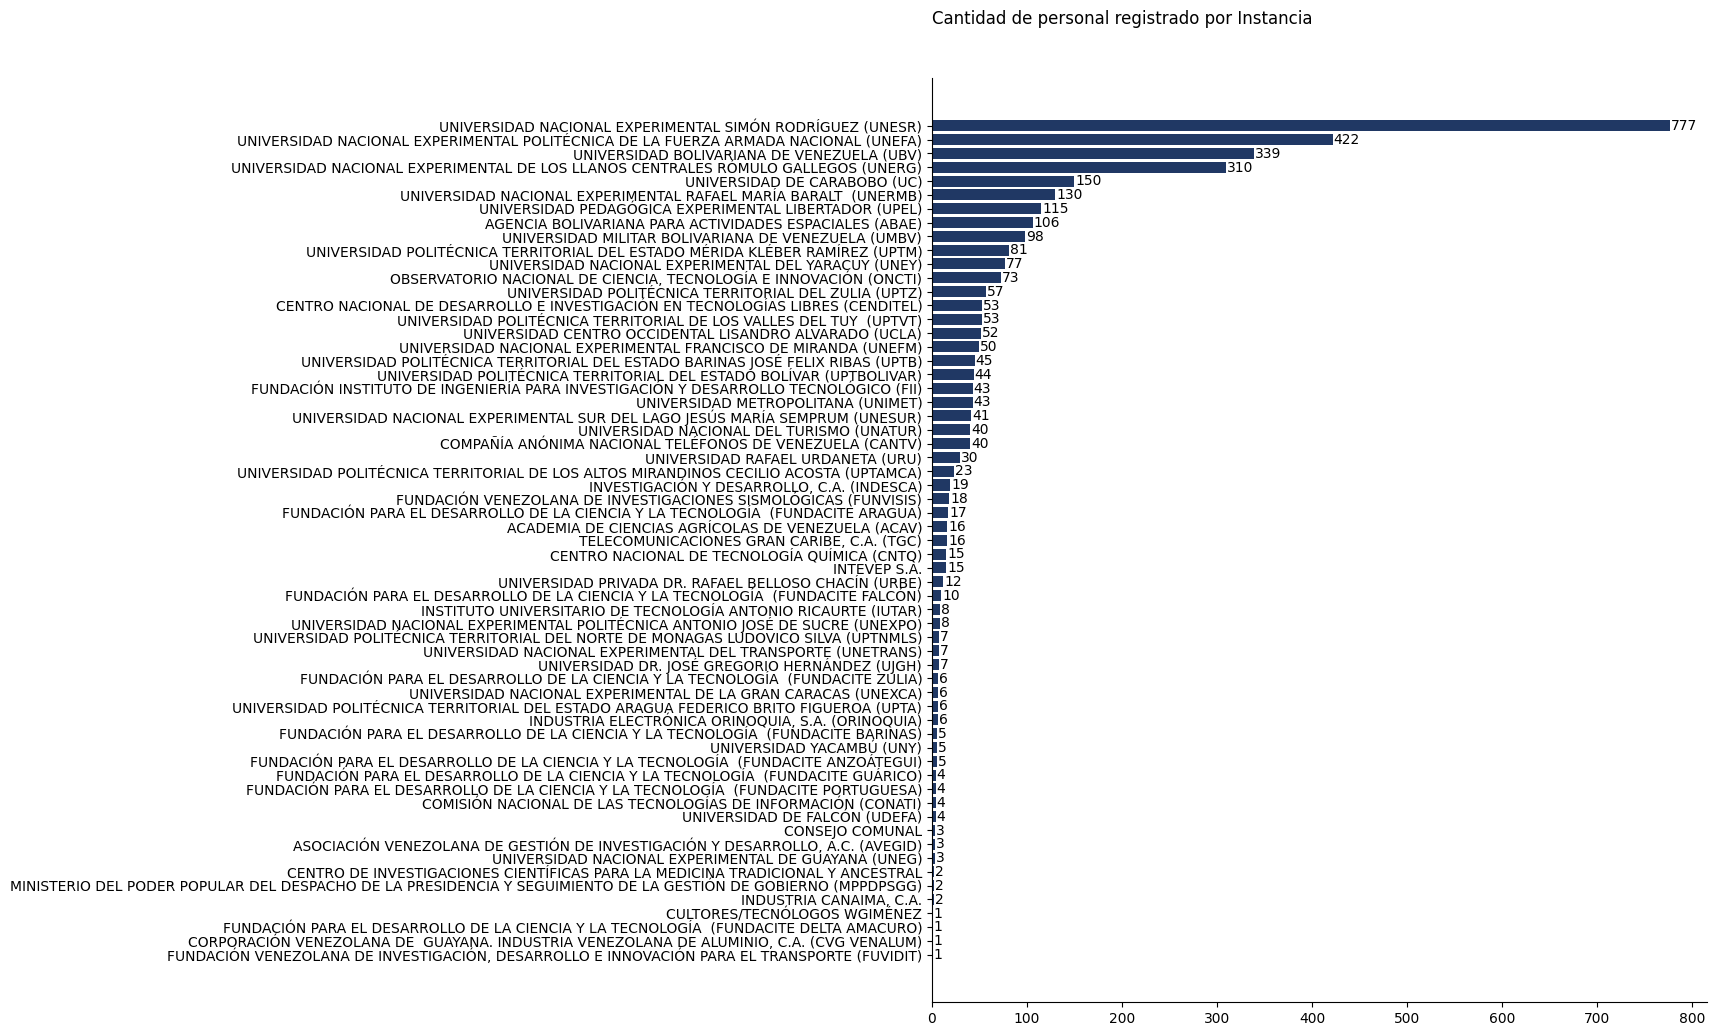

In [ ]:
# Assuming 'cooperacion' DataFrame exists and has an 'INSTANCIA' column.
instancia_counts3 = personal['NOMBRE DE LA ORGANIZACIÓN'].value_counts().sort_values(ascending=True)

plt.figure(figsize=(10, 12))  # Adjust figure size as needed
bars5 = plt.barh(instancia_counts3.index, instancia_counts3.values, color='#203864')

# Eliminar las líneas superior y derecha
for spine in ['top', 'right']:
    plt.gca().spines[spine].set_visible(False)

# Configurar la localización para utilizar puntos como separadores de miles en español
try:
    locale.setlocale(locale.LC_ALL, 'es_ES.UTF-8')
except locale.Error:
    try:
        locale.setlocale(locale.LC_ALL, 'es_ES')
    except locale.Error:
        locale.setlocale(locale.LC_ALL, '')
        print("Formato español aplicado")

# Formatear el eje horizontal para mostrar separadores de miles
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: cambiar_separadores(locale.format_string("%d", int(x), grouping=True))))

padding2 = 1
# Agregar etiquetas de datos a cada barra
for bar in bars5:
    width = bar.get_width()
    plt.text(width + padding2, bar.get_y() + bar.get_height()/2, f'{int(width)}', ha='left', va='center')

plt.title('Cantidad de personal registrado por Instancia', loc = 'left', y = 1.05)

plt.show()

In [ ]:
# Hacer un merge entre Unidades I+D y Personal

In [ ]:
# prompt: escribe un código que indique cuales registros de la columna 'NOMBRE DE LA UNIDAD' del dataframe 'personal' no se encuentran en la columna 'NOMBRE DE LA UNIDAD' del dataframe 'unidadesIyD'

# Find records in 'personal' that are not in 'unidadesIyD'
diferencia = personal[~personal['NOMBRE DE LA UNIDAD'].isin(unidadesIyD['NOMBRE DE LA UNIDAD'])]

# Print the differing records
diferencia


CEDULA NACIONALIDAD                 NOMBRES            APELLIDOS  \
161    8049893            V              ANA DORILA       ARAQUE RAMIREZ   
226   19144059            V             ANDRES JOSE         ACOSTA PEREZ   
435    5455586            V            BRENDA BELEN   TABATA DE GONZALEZ   
574   12122806            V           CESAR ENRIQUE        RAMOS BRICEÑO   
583    6867369            V           CHARY FELICIA     ORTIZ CARRASQUEL   
644   12879581            V                DANIBEL         GOITIA FERRER   
747   22692281            V              DIEGO LUIS           VERA PARRA   
781   13966349            V          DORYS VIRGINIA      VALERO CALDERON   
889   11818654            V              ELIZABETH         ROMERO BLANCO   
1106  10718407            V          FREDDY SEGUNDO      PLAZA ESCALANTE   
1283   6207458            V           HENYS ENRIQUE          PEÑA ANGULO   
1294  12349450            V             HINER EVELI        GONZALEZ PEÑA   
1329   7259257            V           INGRID MARINA     SANTANA DE REYES   
1417   9476031            V          JAVIER ANTONIO      CASTILLO TORRES   
1497   6549127            V           JESUS ENRIQUE       GONZALEZ NUÑEZ   
1590  15754922            V              JORGE LUIS              ALTUVE    
1602  16621714            V           JOSANT DANIEL      SERRANO LABARCA   
1715  12103962            V     JOSE RAFAEL ENRIQUE          PINEDA RUIZ   
1730   8683179            V  JOSEFINA DE LOS SANTOS         LOPEZ ACOSTA   
1774  12414118            V             JUAN JACOBO      ROJAS RODRIGUEZ   
1859   6868711            V     KATIUSKA DE LA CRUZ  HERNANDEZ DE TORRES   
1916  10867480            V            LEOMAR JESUS       GONZALEZ PEREZ   
2217  16520856            V       MARIA AUXILIADORA     TRASMONTE FLORES   
2310  13648294            V            MARIA SUSANA          ROJAS RIVAS   
2342   9415358            V        MARIBELL MARIBEL          DIAZ RAVELO   
2513  12160744            V        MILAGRO ENGRACIA        RIVERA ORTUÑO   
2575  13232727            V            MOISES JESUS    CORDOVEZ GONZALEZ   
2604   4419937            V           NANCY CARMINA    GONZALEZ DE OLIVO   
2618  19310961            V     NASTASSJA ALEXANDRA          GARCIA DIAZ   
2931  11125837            V            RICARDO JOSE         TORI MORALES   
3045   6870945            V             RUTH REBECA       RUBIO DE NAVAS   
3207  10283477            V           VICKY MARTIÑA    LINARES DE MORENO   

                               EMAIL  EDAD ESTATUS REGISTRO  \
161           anytaraque24@gmail.com    59           Activo   
226              aacosta@uptm.edu.ve    36           Activo   
435         brendabtabatac@gmail.com    63           Activo   
574             kaisercerb@gmail.com    49           Activo   
583                charyor@gmail.com    58           Activo   
644         danibelgoitia5@gmail.com    48           Activo   
747        diegoluisvera12@gmail.com    32           Activo   
781            dorysvalero@gmail.com    47           Activo   
889        elizabethcultca@gmail.com    51           Activo   
1106         plazae.freddy@gmail.com    54           Activo   
1283                henysp@gmail.com    58           Activo   
1294           hgonzalez@uptm.edu.ve    48           Activo   
1329    ingridsantana.lcda@gmail.com    56           Activo   
1417          jactorres685@gmail.com    56           Activo   
1497            jgonza1263@gmail.com    61           Activo   
1590       jorgeluisaltuve@gmail.com    43           Activo   
1602            josantuptm@gmail.com    41           Activo   
1715             prjre2007@gmail.com    50           Activo   
1730     josefinalopez0797@gmail.com    57           Activo   
1774           jacoborojas@gmail.com    49           Activo   
1859             katiuskah@gmail.com    56           Activo   
1916            profleomar@gmail.com    52           Activo   
2217  floresauxiliadora840@gmail.com    41        

6.3. Productividad

6.3.1. Proyectos (Solo muestra cantidad de proyectos por instancia)

In [ ]:
# muestra instancias que reportaron proyectos y cuantos tienen
proyecto

SECTOR  \
0     EDUCACIÓN UNIVERSITARIA   
1     EDUCACIÓN UNIVERSITARIA   
2     EDUCACIÓN UNIVERSITARIA   
3     EDUCACIÓN UNIVERSITARIA   
4     EDUCACIÓN UNIVERSITARIA   
...                       ...   
2688  EDUCACIÓN UNIVERSITARIA   
2689  EDUCACIÓN UNIVERSITARIA   
2690  EDUCACIÓN UNIVERSITARIA   
2691  EDUCACIÓN UNIVERSITARIA   
2692  EDUCACIÓN UNIVERSITARIA   

                              NOMBRE DE LA ORGANIZACIÓN       FECHA  \
0     UNIVERSIDAD NACIONAL EXPERIMENTAL RAFAEL MARÍA...  2024-12-13   
1     UNIVERSIDAD NACIONAL EXPERIMENTAL RAFAEL MARÍA...  2024-12-13   
2     UNIVERSIDAD NACIONAL EXPERIMENTAL RAFAEL MARÍA...  2024-12-13   
3     UNIVERSIDAD NACIONAL EXPERIMENTAL RAFAEL MARÍA...  2024-12-13   
4     UNIVERSIDAD NACIONAL EXPERIMENTAL RAFAEL MARÍA...  2024-12-13   
...                                                 ...         ...   
2688  UNIVERSIDAD POLITÉCNICA TERRITORIAL DEL ESTADO...  2025-03-10   
2689  UNIVERSIDAD POLITÉCNICA TERRITORIAL DEL ESTADO...  2025-03-10   
2690  UNIVERSIDAD POLITÉCNICA TERRITORIAL DEL ESTADO...  2025-03-10   
2691  UNIVERSIDAD POLITÉCNICA TERRITORIAL DEL ESTADO...  2025-03-10   
2692  UNIVERSIDAD POLITÉCNICA TERRITORIAL DEL ESTADO...  2025-03-10   

                                    NOMBRE DE LA UNIDAD  \
0     CENTRO DE INVESTIGACIóN EDUCATIVA EN BIOLOGÍA ...   
1     CENTRO DE INVESTIGACIóN EDUCATIVA EN BIOLOGÍA ...   
2     CENTRO DE INVESTIGACIóN EDUCATIVA EN BIOLOGÍA ...   
3     CENTRO DE INVESTIGACIóN EDUCATIVA EN BIOLOGÍA ...   
4     CENTRO DE INVESTIGACIóN EDUCATIVA EN BIOLOGÍA ...   
...                                                 ...   
2688  GRUPO DE INVESTIGACION INTERVENCION Y RESCATE ...   
2689  GRUPO DE INVESTIGACION INTERVENCION Y RESCATE ...   
2690  GRUPO DE INVESTIGACION INTERVENCION Y RESCATE ...   
2691  GRUPO DE INVESTIGACION INTERVENCION Y RESCATE ...   
2692  GRUPO DE INVESTIGACION INTERVENCION Y RESCATE ...   

                                                 TITULO  \
0     elaboración de productos QUÍMICOS de limpieza ...   
1     Estrategia Didáctica para el Desarrollo del Pr...   
2     Estrategias Creativas para un Aprendizaje Sign...   
3     ECO EDUCACIÓN como estrategia pedagógica en la...   
4     Identificación de insectos (phyllum: artrópoda...   
...                                                 ...   
2688  Revista del Semillero de Investigación del Pro...   
2689  PROGRAMA DE SOLIDARIDAD EDUCATIVA. PROYECTO DE...   
2690  El Uso del Inglés Instrumental como Herramient...   
2691                        Revista CIMIENTOS del PNFCC   
2692  ESTRATEGIAS COMUNICACIONALES EN EL MANEJO DE L...   

                                               OBJETIVO  FECHA INICIO  \
0     generar costos ECONÓMICOS como alternativa de ...           NaN   
1     determinar la Didáctica para el Desarrollo del...           NaN   
2     generar Estrategias Creativas para un Aprendiz...           NaN   
3     generar la ECO EDUCACIÓN COMO ESTRATEGIA PEDAG...           NaN   
4     determinar insectos (phyllum: artrópoda, clase...           NaN   
...                                                 ...           ...   
2688  El objetivo General de la Revista “BOSQUEJO UR...           NaN   
2689  Fortalecer el mejoramiento de los docentes y e...           NaN   
2690  Facilitar al participante, en cuatro módulos, ...           NaN   
2691  Impulsar a los profesores de los programas nac...           NaN   
2692  DISENAR Y APLICAR estrategias comunicacionales...           NaN   

      FECHA_CULMINACION  FECHA PARALIZACION  \
0                   NaN                 NaN   
1                   NaN                 NaN   
2                   NaN                 NaN   
3                   NaN                 NaN   
4                   NaN                 NaN   
...                 ...                 ...   
2688                NaN                 NaN   
2689                NaN                 NaN   
2690                NaN                 NaN   
2691    

Formato español aplicado


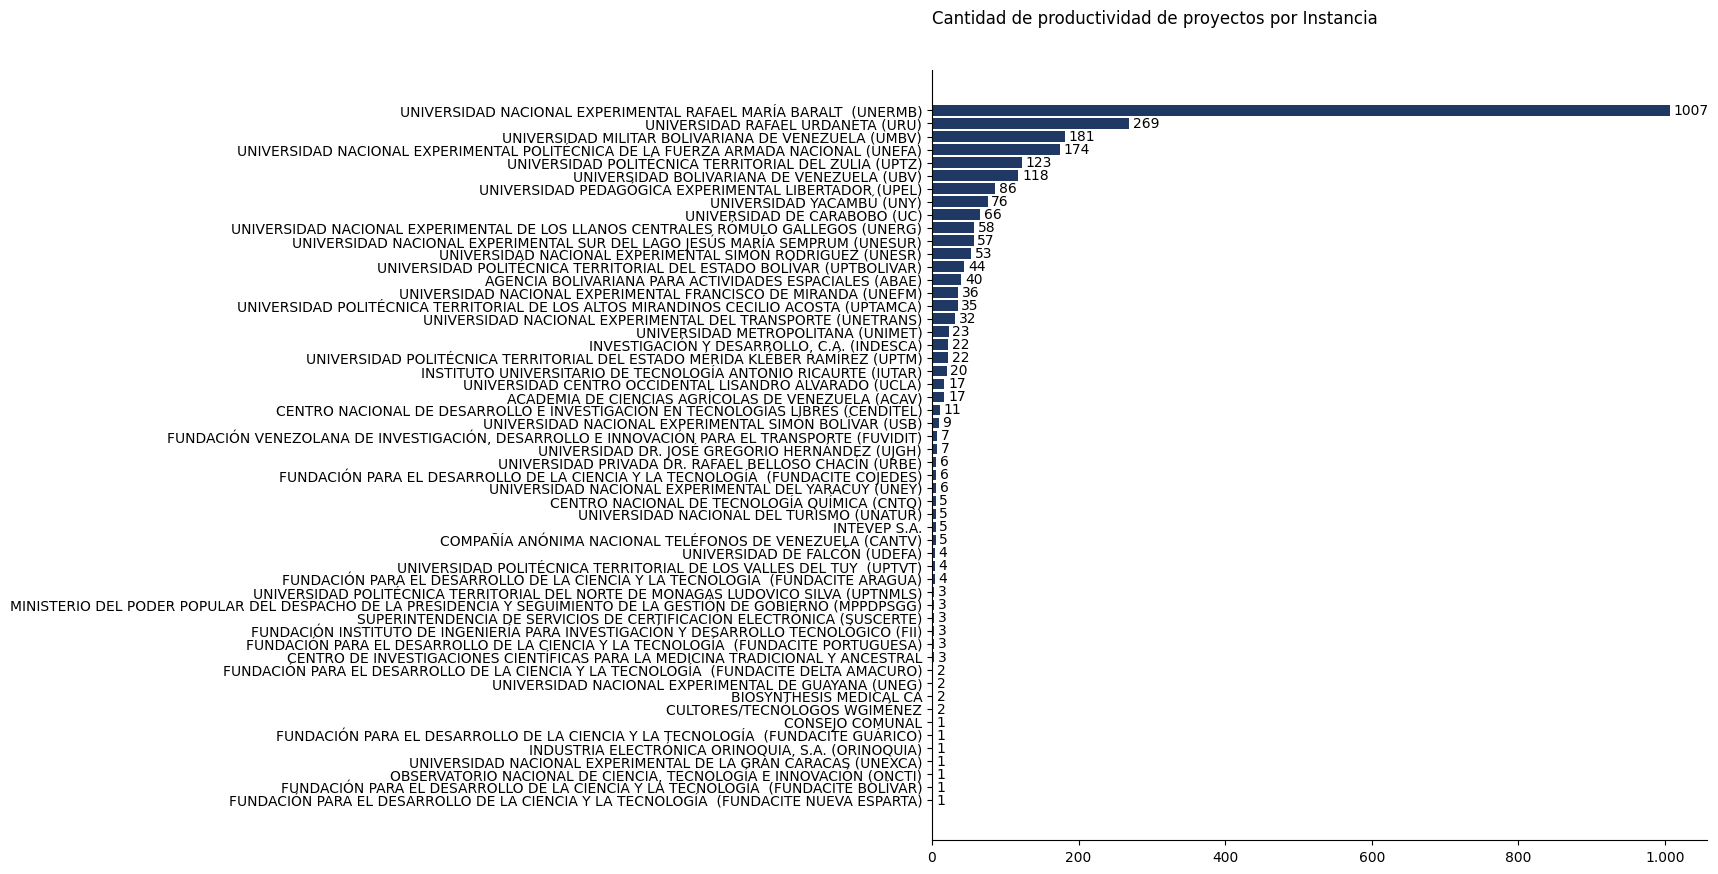

In [ ]:
# Assuming 'cooperacion' DataFrame exists and has an 'INSTANCIA' column.
instancia_counts4 = proyecto['NOMBRE DE LA ORGANIZACIÓN'].value_counts().sort_values(ascending=True)

plt.figure(figsize=(10, 10))  # Adjust figure size as needed
bars6 = plt.barh(instancia_counts4.index, instancia_counts4.values, color='#203864')

# Eliminar las líneas superior y derecha
for spine in ['top', 'right']:
    plt.gca().spines[spine].set_visible(False)

# Configurar la localización para utilizar puntos como separadores de miles en español
try:
    locale.setlocale(locale.LC_ALL, 'es_ES.UTF-8')
except locale.Error:
    try:
        locale.setlocale(locale.LC_ALL, 'es_ES')
    except locale.Error:
        locale.setlocale(locale.LC_ALL, '')
        print("Formato español aplicado")

# Formatear el eje horizontal para mostrar separadores de miles
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: cambiar_separadores(locale.format_string("%d", int(x), grouping=True))))

padding2 = 5
# Agregar etiquetas de datos a cada barra
for bar in bars6:
    width = bar.get_width()
    plt.text(width + padding2, bar.get_y() + bar.get_height()/2, f'{int(width)}', ha='left', va='center')

plt.title('Cantidad de productividad de proyectos por Instancia', loc = 'left', y = 1.05)

plt.show()

6.3.2. Intelectual (Solo muestra cantidad de productividad intelectual por instancia)

In [ ]:
# muestra instancias que reportaron productividad intelectual y cuantos tienen
intelectual

SECTOR  \
0   EDUCACIÓN UNIVERSITARIA   
1   EDUCACIÓN UNIVERSITARIA   
2   EDUCACIÓN UNIVERSITARIA   
3   EDUCACIÓN UNIVERSITARIA   
4   EDUCACIÓN UNIVERSITARIA   
5   EDUCACIÓN UNIVERSITARIA   
6   EDUCACIÓN UNIVERSITARIA   
7   EDUCACIÓN UNIVERSITARIA   
8                  GOBIERNO   
9   EDUCACIÓN UNIVERSITARIA   
10  EDUCACIÓN UNIVERSITARIA   
11  EDUCACIÓN UNIVERSITARIA   
12  EDUCACIÓN UNIVERSITARIA   
13            EMPRESA MIXTA   
14  EDUCACIÓN UNIVERSITARIA   
15  EDUCACIÓN UNIVERSITARIA   
16          EMPRESA PRIVADA   
17  EDUCACIÓN UNIVERSITARIA   
18            EMPRESA MIXTA   
19  EDUCACIÓN UNIVERSITARIA   
20  EDUCACIÓN UNIVERSITARIA   
21  EDUCACIÓN UNIVERSITARIA   
22  EDUCACIÓN UNIVERSITARIA   
23  EDUCACIÓN UNIVERSITARIA   
24  EDUCACIÓN UNIVERSITARIA   
25  EDUCACIÓN UNIVERSITARIA   
26  EDUCACIÓN UNIVERSITARIA   
27  EDUCACIÓN UNIVERSITARIA   
28  EDUCACIÓN UNIVERSITARIA   
29  EDUCACIÓN UNIVERSITARIA   
30  EDUCACIÓN UNIVERSITARIA   
31  EDUCACIÓN UNIVERSITARIA   
32  EDUCACIÓN UNIVERSITARIA   
33  EDUCACIÓN UNIVERSITARIA   
34  EDUCACIÓN UNIVERSITARIA   
35  EDUCACIÓN UNIVERSITARIA   
36  EDUCACIÓN UNIVERSITARIA   
37  EDUCACIÓN UNIVERSITARIA   
38  EDUCACIÓN UNIVERSITARIA   
39  EDUCACIÓN UNIVERSITARIA   
40  EDUCACIÓN UNIVERSITARIA   
41  EDUCACIÓN UNIVERSITARIA   
42  EDUCACIÓN UNIVERSITARIA   
43  EDUCACIÓN UNIVERSITARIA   
44  EDUCACIÓN UNIVERSITARIA   
45  EDUCACIÓN UNIVERSITARIA   
46  EDUCACIÓN UNIVERSITARIA   
47  EDUCACIÓN UNIVERSITARIA   
48  EDUCACIÓN UNIVERSITARIA   
49  EDUCACIÓN UNIVERSITARIA   
50            PODER POPULAR   
51            PODER POPULAR   
52            PODER POPULAR   

                                            INSTANCIA       FECHA  \
0   UNIVERSIDAD NACIONAL EXPERIMENTAL RAFAEL MARÍA...  2024-12-13   
1   UNIVERSIDAD NACIONAL EXPERIMENTAL RAFAEL MARÍA...  2024-12-13   
2   UNIVERSIDAD NACIONAL EXPERIMENTAL RAFAEL MARÍA...  2024-12-13   
3   UNIVERSIDAD NACIONAL EXPERIMENTAL DE LOS LLANO...  2024-12-13   
4   UNIVERSIDAD NACIONAL EXPERIMENTAL DE LOS LLANO...  2024-12-13   
5   UNIVERSIDAD NACIONAL EXPERIMENTAL FRANCISCO DE...  2024-12-13   
6   UNIVERSIDAD NACIONAL EXPERIMENTAL DE LOS LLANO...  2024-12-13   
7   UNIVERSIDAD NACIONAL EXPERIMENTAL DE LOS LLANO...  2024-12-13   
8   CENTRO NACIONAL DE DESARROLLO E INVESTIGACIÓN ...  2024-12-16   
9                        UNIVERSIDAD DE CARABOBO (UC)  2025-01-08   
10  UNIVERSIDAD NACIONAL EXPERIMENTAL SIMÓN RODRÍG...  2024-12-19   
11  UNIVERSIDAD NACIONAL EXPERIMENTAL SIMÓN RODRÍG...  2024-12-19   
12  UNIVERSIDAD NACIONAL EXPERIMENTAL FRANCISCO DE...  2024-12-13   
13         TELECOMUNICACIONES GRAN CARIBE, C.A. (TGC)  2024-12-12   
14                       UNIVERSIDAD DE CARABOBO (UC)  2025-01-08   
15  UNIVERSIDAD NACIONAL EXPERIMENTAL POLITÉCNICA ...  2025-02-14   
16                            BIOSYNTHESIS MEDICAL CA  2025-01-20   
17  UNIVERSIDAD MILITAR BOLIVARIANA DE VENEZUELA (...  2025-02-26   
18  COMPAÑÍA ANÓNIMA NACIONAL TELÉFONOS DE VENEZUE...  2024-12-19   
19  UNIVERSIDAD MILITAR BOLIVARIANA DE VENEZUELA (...  2025-02-26   
20  UNIVERSIDAD MILITAR BOLIVARIANA DE VENEZUELA (...  2025-02-26   
21  UNIVERSIDAD MILITAR BOLIVARIANA DE VENEZUELA (...  2025-02-26   
22  UNIVERSIDAD MILITAR BOLIVARIANA DE VENEZUELA (...  2025-02-26   
23  UNIVERSIDAD MILITAR BOLIVARIANA DE VENEZUELA (...  2025-02-26   
24  UNIVERSIDAD MILITAR BOLIVARIANA DE VENEZUELA (...  2025-02-26   
25  UNIVERSIDAD MILITAR BOLIVARIANA DE VENEZUELA (...  2025-02-26   
26  UNIVERSIDAD MILITAR BOLIVARIANA DE VENEZUELA (...  2025-02-26   
27  UNIVERSIDAD MILITAR BOLIVARIANA DE VENEZUELA (...  2025-02-26   
28  UNIVERSIDAD MILITAR BOLIVARIANA DE VENEZUELA (...  2025-02-26   
29  UNIVERSIDAD MILITAR BOLIVARIANA DE VENEZUELA (...  2025-02-26   
30  UNIVERSIDAD NACIONAL EXPERIMENTAL DEL TRANSPOR...  2024-12-13   
31  UNIVERSIDAD MILITAR BOLIVARIANA DE VENEZUELA (...  2025-02-26   
32  UNIVERSIDAD MILITAR BOLIVARIANA DE VENEZUELA (...  2025-02-26   


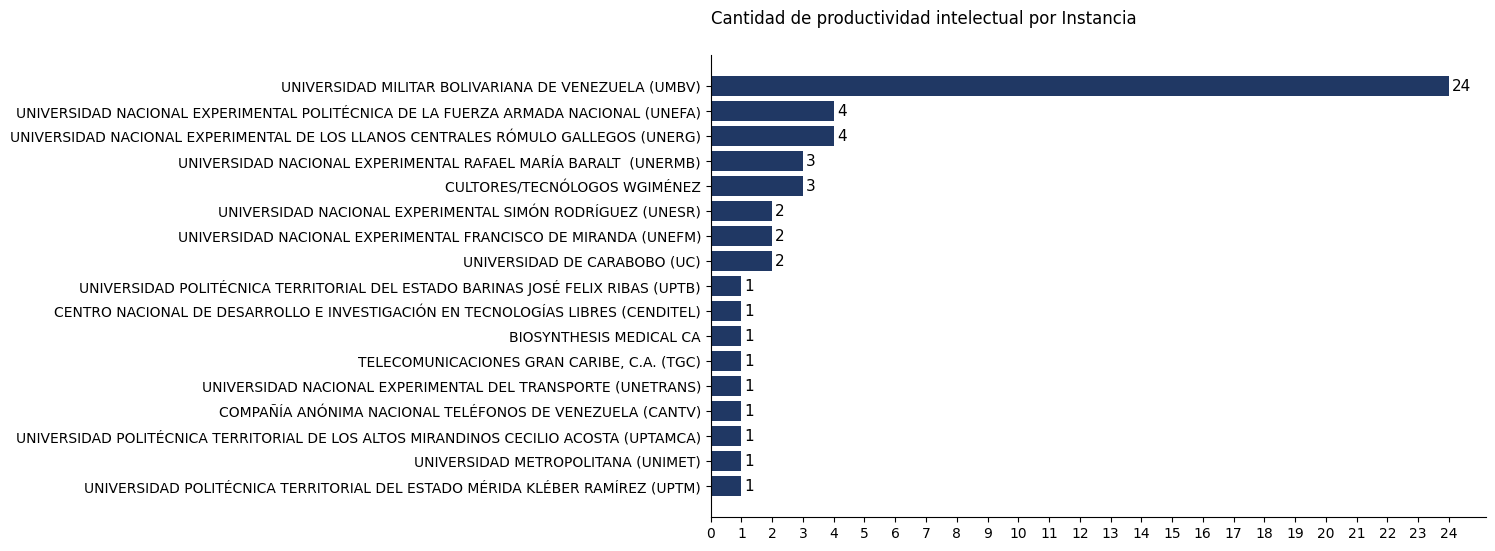

In [ ]:

# Assuming 'cooperacion' DataFrame exists and has an 'INSTANCIA' column.
instancia_counts5 = intelectual['INSTANCIA'].value_counts().sort_values(ascending=True)

plt.figure(figsize=(10, 6))  # Adjust figure size as needed
bars7 = plt.barh(instancia_counts5.index, instancia_counts5.values, color='#203864')

# Eliminar las líneas superior y derecha
for spine in ['top', 'right']:
    plt.gca().spines[spine].set_visible(False)

# Formatear el eje horizontal para mostrar números enteros
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

# Establecer los ticks del eje horizontal como enteros
plt.xticks(range(0, int(max(instancia_counts5.values)) + 1, 1))

padding3 = 0.1
# Agregar etiquetas de datos a cada barra
for bar in bars7:
    width = bar.get_width()
    plt.text(width + padding3, bar.get_y() + bar.get_height()/2, f'{int(width)}', ha='left', va='center', fontsize = 11)

plt.title('Cantidad de productividad intelectual por Instancia', loc = 'left', y = 1.05)

plt.show()

6.4. Equipos

In [ ]:
# Equipos tecnológicos
equip_tec

SECTOR  \
0                   GOBIERNO   
1                   GOBIERNO   
2                   GOBIERNO   
3                   GOBIERNO   
4    EDUCACIÓN UNIVERSITARIA   
..                       ...   
264            PODER POPULAR   
265                 GOBIERNO   
266                 GOBIERNO   
267  EDUCACIÓN UNIVERSITARIA   
268  EDUCACIÓN UNIVERSITARIA   

                                             INSTANCIA       FECHA  \
0    OBSERVATORIO NACIONAL DE CIENCIA, TECNOLOGÍA E...  2024-12-12   
1    OBSERVATORIO NACIONAL DE CIENCIA, TECNOLOGÍA E...  2024-12-12   
2    OBSERVATORIO NACIONAL DE CIENCIA, TECNOLOGÍA E...  2024-12-12   
3    OBSERVATORIO NACIONAL DE CIENCIA, TECNOLOGÍA E...  2024-12-12   
4    UNIVERSIDAD NACIONAL EXPERIMENTAL RAFAEL MARÍA...  2024-12-13   
..                                                 ...         ...   
264                       CULTORES/TECNÓLOGOS WGIMÉNEZ  2025-03-25   
265  FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y L...  2024-12-23   
266  FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y L...  2024-12-23   
267  UNIVERSIDAD MILITAR BOLIVARIANA DE VENEZUELA (...  2025-02-26   
268  UNIVERSIDAD POLITÉCNICA TERRITORIAL DEL ESTADO...  2025-03-10   

                                                UNIDAD ESTACION TRABAJO  \
0                  GERENCIA DE PROSPECTIVA TECNOLóGICA    DE ESCRITORIO   
1                  GERENCIA DE PROSPECTIVA TECNOLóGICA    DE ESCRITORIO   
2                  GERENCIA DE PROSPECTIVA TECNOLóGICA           LAPTOP   
3                  GERENCIA DE PROSPECTIVA TECNOLóGICA           LAPTOP   
4    UNIDAD DE FORMACIÓN E INNOVACIÓN DEL PROGRAMA ...    DE ESCRITORIO   
..                                                 ...              ...   
264            SHAS (SEGURIDAD HIGIENE AMBIENTE SALUD)           LAPTOP   
265                     DIRECCION DE GESTION Y CONTROL           LAPTOP   
266                     DIRECCION DE GESTION Y CONTROL    DE ESCRITORIO   
267                   VICERRECTORADO DE INVESTIGACIóN     DE ESCRITORIO   
268        GRUPO DE INVESTIGACION DE RADIOIMAGENOLOGIA    DE ESCRITORIO   

    SISTEMA OPERATIVO             ANTIGUEDAD                CONEXION  \
0               LINUX         MAYOR A 5 AÑOS            FIBRA ÓPTICA   
1             WINDOWS        MENOS DE 2 AÑOS            FIBRA ÓPTICA   
2             WINDOWS        MENOS DE 2 AÑOS             INALÁMBRICO   
3             WINDOWS  ENTRE 2 AÑOS Y 5 AÑOS             INALÁMBRICO   
4             WINDOWS         MAYOR A 5 AÑOS             INALÁMBRICO   
..                ...                    ...                     ...   
264           WINDOWS         MAYOR A 5 AÑOS               SATELITAL   
265             LINUX        MENOS DE 2 AÑOS             INALÁMBRICO   
266             LINUX        MENOS DE 2 AÑOS             BANDA ANCHA   
267           WINDOWS         MAYOR A 5 AÑOS  RED DE TELEFONÍA MÓVIL   
268             LINUX         MAYOR A 5 AÑOS             BANDA ANCHA   

     CANTIDAD SISTEMA OPERATIVO NOMBRE      ANTIGUEDAD NOMBRE  \
0          47                    LINUX         MAYOR A 5 AÑOS   
1          21                  WINDOWS        MENOS DE 2 AÑOS   
2           3                  WINDOWS        MENOS DE 2 AÑOS   
3           3                  WINDOWS  ENTRE 2 AÑOS Y 5 AÑOS   
4           1                  WINDOWS         MAYOR A 5 AÑOS   
..        ...                      ...                    ...   
264         2                  WINDOWS         MAYOR A 5 AÑOS   
265         1                    LINUX        MENOS DE 2 AÑOS   
266         1                    LINUX        MENOS DE 2 AÑOS   
267        13                  WINDOWS         MAYOR A 5 AÑOS   
268         1                    LINUX         MAYOR A 5 AÑOS   

            CONEXION NOMBRE  
0              FIBRA ÓPTICA  
1              FIBRA ÓPTICA  
2               INALÁMBRICO  
3               INALÁMBRICO  
4               INALÁMBRICO  
..                      ...  
264               SATELITAL  
265      

In [ ]:
# Equipos especializados
equip_esp

SECTOR  \
0     EDUCACIÓN UNIVERSITARIA   
1     EDUCACIÓN UNIVERSITARIA   
2     EDUCACIÓN UNIVERSITARIA   
3     EDUCACIÓN UNIVERSITARIA   
4     EDUCACIÓN UNIVERSITARIA   
...                       ...   
1670                 GOBIERNO   
1671                 GOBIERNO   
1672                 GOBIERNO   
1673                 GOBIERNO   
1674  EDUCACIÓN UNIVERSITARIA   

                                              INSTANCIA       FECHA  \
0     UNIVERSIDAD NACIONAL EXPERIMENTAL RAFAEL MARÍA...  2024-12-13   
1     UNIVERSIDAD NACIONAL EXPERIMENTAL RAFAEL MARÍA...  2024-12-13   
2     UNIVERSIDAD NACIONAL EXPERIMENTAL RAFAEL MARÍA...  2024-12-13   
3     UNIVERSIDAD NACIONAL EXPERIMENTAL RAFAEL MARÍA...  2024-12-13   
4     UNIVERSIDAD NACIONAL EXPERIMENTAL RAFAEL MARÍA...  2024-12-13   
...                                                 ...         ...   
1670  FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y L...  2024-12-23   
1671  FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y L...  2024-12-23   
1672  FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y L...  2024-12-23   
1673  FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y L...  2024-12-23   
1674  UNIVERSIDAD POLITÉCNICA TERRITORIAL DEL ESTADO...  2025-03-10   

                                           UNIDAD  \
0              CENTRO DE INVESTIGACIÓN EDUCATIVAS   
1              CENTRO DE INVESTIGACIÓN EDUCATIVAS   
2              CENTRO DE INVESTIGACIÓN EDUCATIVAS   
3              CENTRO DE INVESTIGACIÓN EDUCATIVAS   
4              CENTRO DE INVESTIGACIÓN EDUCATIVAS   
...                                           ...   
1670               DIRECCION DE GESTION Y CONTROL   
1671               DIRECCION DE GESTION Y CONTROL   
1672               DIRECCION DE GESTION Y CONTROL   
1673               DIRECCION DE GESTION Y CONTROL   
1674  GRUPO DE INVESTIGACION DE RADIOIMAGENOLOGIA   

                                    NOMBRE           MARCA  MODELO  CANTIDAD  \
0                                      CPU              HP     NaN       1.0   
1                                      cpu              hp     NaN       1.0   
2                                   laptop              hp     NaN       2.0   
3                                videobeam           epson     NaN       1.0   
4                                videobeam           epson     NaN       1.0   
...                                    ...             ...     ...       ...   
1670  dectector de humedad, fetilidad y ph          genery     NaN       1.0   
1671                  temporizador digital      classiclux     NaN       1.0   
1672             equipo de camara y video          samsung     NaN       1.0   
1673                      nevera ejecutiva  Hamilton Beach     NaN       1.0   
1674                          Negastocopio       Sin Marca     NaN       1.0   

         CONDICION  
0            BUENA  
1     NO OPERATIVA  
2     NO OPERATIVA  
3     NO OPERATIVA  
4          REGULAR  
...            ...  
1670        ÓPTIMA  
1671        ÓPTIMA  
1672        ÓPTIMA  
1673        ÓPTIMA  
1674       REGULAR  

[1675 rows x 9 columns]

In [ ]:
import difflib

# Función para calcular la similitud entre dos cadenas
def similitud(s1, s2):
    return difflib.SequenceMatcher(None, s1, s2).ratio()

# Función para encontrar cadenas con más del 90% de similitud
def encontrar_similitudes(df, columna, umbral=0.99):
    # Lista para almacenar los grupos de cadenas similares
    grupos_similares = []

    # Lista para mantener un registro de las cadenas ya procesadas
    procesadas = set()

    # Iterar sobre cada cadena en la columna
    for i, cadena1 in enumerate(df[columna]):
        if cadena1 in procesadas:
            continue  # Si ya fue procesada, saltar a la siguiente

        # Lista para almacenar cadenas similares a la actual
        similares = [cadena1]

        # Comparar con el resto de cadenas
        for j, cadena2 in enumerate(df[columna]):
            if i != j and similitud(cadena1, cadena2) > umbral:
                similares.append(cadena2)
                procesadas.add(cadena2)

        # Si se encontraron cadenas similares, agregar a la lista de grupos
        if len(similares) > 1:
            grupos_similares.append(similares)

        # Marcar la cadena actual como procesada
        procesadas.add(cadena1)

    return grupos_similares

unidadesIyD_dup = pd.read_excel('/content/drive/MyDrive/Colab_Notebooks/portfolio_oncti/reporte_reveca/Reporte_UNIDADES.xlsx')
# Encontrar cadenas con más del 90% de similitud
grupos_similares = encontrar_similitudes(unidadesIyD_dup, 'NOMBRE DE LA UNIDAD', umbral=0.9)

# Mostrar los grupos de cadenas similares
for grupo in grupos_similares:
    print(grupo)

['GERENCIA DE INVESTIGACIóN', 'GERENCIA DE INVESTIGACIÓN ']
['ALIANZA CIENTIFICO - CAMPESINA', 'ALIANZA CIENTIFICO - CAMPESINA', 'ALIANZA CIENTIFICO CAMPESINA']
['VICEMINISTERIO DE ADMINISTRACION CUENCAS HIDROGRÁFICAS ', 'VICEMINISTERIO DE ADMINISTRACION DE CUENCAS HIDROGRAFICAS']
['CENTRO DE ESTUDIOS  DE EDUCACIóN EMANCIPADORA Y PEDAGOGíA CRíTICA', 'CENTRO DE ESTUDIOS DE EDUCACIóN EMANCIPADORA Y PEDAGOGíA CRíTICA']
['CENTRO DE ESTUDIOS AMBIENTALES', 'CENTRO DE ESTUDIOS AMBIENTALES']
['CENTRO DE ESTUDIOS DE ECONOMíA POLíTICA', 'CENTRO DE ESTUDIOS DE ECONOMíA POLíTICA']
['CENTRO DE ESTUDIOS JURíDICOS VENEZOLANO', 'CENTRO DE ESTUDIOS JURíDICOS VENEZOLANO']
[' LABORATORIO DE INVESTIGACIóN EN ESTUDIOS DEL  TRABAJO (LAINET)', 'LABORATORIO DE INVESTIGACIóN EN ESTUDIOS DEL  TRABAJO (LAINET)']
['UNIDAD DE PERINATOLOGíA (DPTO. CLíNICO INTEGRAL COSTA)', 'UNIDAD DE PERINATOLOGíA (DPTO. CLíNICO INTEGRAL SUR)']
['CENTRO DE INVESTIGACION JURIDICA ', 'CENTRO DE INVESTIGACIONES JURíDICAS']
['CENTRO DE

In [ ]:
# prompt: para la lista 'grupos_similares' extraer cada elemento, que a su vez en otra lista y de cada lista extraer cada elemento para colocarlo en una tabla



# Assuming 'grupos_similares' is the list of lists you obtained from the previous code
# Example:
# grupos_similares = [['Cadena1', 'Cadena2', 'Cadena3'], ['Cadena4', 'Cadena5']]

def create_table_from_similar_groups(grupos_similares):
    """
    Extracts elements from nested lists and creates a Pandas DataFrame.
    """
    all_elements = []
    for group in grupos_similares:
        for element in group:
          all_elements.append(element)

    df = pd.DataFrame({'Similar Strings': all_elements})
    return df


# Example usage (replace with your actual 'grupos_similares' variable)
# Create the DataFrame
df_similar_strings = create_table_from_similar_groups(grupos_similares)

# Display the DataFrame
df_similar_strings

# Exportar el DataFrame filtered_instancia a un archivo Excel
df_similar_strings.to_excel('unidadesID_duplicadas.xlsx', index=False)

# Mostrar un mensaje de éxito
print('\nEl DataFrame ha sido exportado exitosamente a unidadesID_duplicadas.xlsx\n')



El DataFrame ha sido exportado exitosamente a unidadesID_duplicadas.xlsx



In [ ]:
# prompt: escribe un  código que para el dataframe 'instancias' construya una tabla donde diga si para cada registro de la columna 'NOMBRE DE LA ORGANIZACIÓN' posee información en la columna 'RIF'

def tiene_rif(row):
    """
    Función para verificar si una organización tiene un RIF.

    Args:
        row: Fila del DataFrame.

    Returns:
        'Registro completado' si tiene RIF, 'Registro incompleto' en caso contrario.
    """
    return 'Registro completado' if not pd.isnull(row['RIF']) else 'Sin datos'

# Aplicar la función a cada fila del DataFrame 'instancias'
instancia['Módulo Instancias'] = instancia.apply(tiene_rif, axis=1)

# Crear una tabla resumen
tabla_rif = instancia.groupby('NOMBRE DE LA ORGANIZACIÓN')['Módulo Instancias'].apply(lambda x: 'Registro completado' if any(x == 'Registro completado') else 'Sin datos').reset_index()

# Mostrar la tabla
tabla_rif


NOMBRE DE LA ORGANIZACIÓN    Módulo Instancias
0    ACADEMIA DE CIENCIAS AGRÍCOLAS DE VENEZUELA (A...  Registro completado
1    AGENCIA BOLIVARIANA PARA ACTIVIDADES ESPACIALE...  Registro completado
2    ASOCIACIÓN CIVIL, DEPORTIVA, EDUCATIVA Y CULTURAL            Sin datos
3    ASOCIACIÓN VENEZOLANA DE GESTIÓN DE INVESTIGAC...  Registro completado
4                     BANCO CENTRAL DE VENEZUELA (BCV)            Sin datos
..                                                 ...                  ...
145               UNIVERSIDAD PRIVADA MONTEÁVILA (UMA)            Sin datos
146                  UNIVERSIDAD RAFAEL URDANETA (URU)  Registro completado
147        UNIVERSIDAD TECNOLÓGICA DEL CENTRO (UNITEC)            Sin datos
148  UNIVERSIDAD TERRITORIAL DELTAICA FRANCISCO TAM...            Sin datos
149                          UNIVERSIDAD YACAMBÚ (UNY)  Registro completado

[150 rows x 2 columns]

In [ ]:
# prompt: escribe un  código que para el dataframe 'unidades_merge' construya una tabla donde diga si para cada registro de la columna 'NOMBRE DE LA ORGANIZACIÓN' posee información en la columna 'CONDICIÓN'. También que indique que si posee información diga 'Registro completado', si no que diga 'Sin datos'

def check_condicion(row):
  """
  Checks if a row has information in the 'CONDICIÓN' column.
  """
  if not pd.isnull(row['CONDICIÓN']):
    return 'Registro completado'
  else:
    return 'Faltan datos de la unidad'

# Apply the function to the DataFrame
unidades_merge['Módulo unidades'] = unidades_merge.apply(check_condicion, axis=1)

# Create a summary table
tabla_resumen = unidades_merge.groupby(['NOMBRE DE LA ORGANIZACIÓN', 'NOMBRE DE LA UNIDAD'])['Módulo unidades'].apply(lambda x: 'Registro completado' if any(x == 'Registro completado') else 'Faltan datos de la unidad').reset_index()

# Display the table
tabla_resumen


NOMBRE DE LA ORGANIZACIÓN  \
0    ACADEMIA DE CIENCIAS AGRÍCOLAS DE VENEZUELA (A...   
1    AGENCIA BOLIVARIANA PARA ACTIVIDADES ESPACIALE...   
2    AGENCIA BOLIVARIANA PARA ACTIVIDADES ESPACIALE...   
3    AGENCIA BOLIVARIANA PARA ACTIVIDADES ESPACIALE...   
4    AGENCIA BOLIVARIANA PARA ACTIVIDADES ESPACIALE...   
..                                                 ...   
771                  UNIVERSIDAD RAFAEL URDANETA (URU)   
772                  UNIVERSIDAD RAFAEL URDANETA (URU)   
773                          UNIVERSIDAD YACAMBÚ (UNY)   
774                          UNIVERSIDAD YACAMBÚ (UNY)   
775                          UNIVERSIDAD YACAMBÚ (UNY)   

                                   NOMBRE DE LA UNIDAD      Módulo unidades  
0    DIRECCIóN DE INVESTIGACION E INNOVACION PRODUC...  Registro completado  
1                                                  CBS  Registro completado  
2                                                  DAE  Registro completado  
3                                                 DCNR  Registro completado  
4                                                DII_1  Registro completado  
..                                                 ...                  ...  
771  LABORATORIO DE MÁQUINAS ELÉCTRICAS Y SISTEMAS ...  Registro completado  
772                             LABORATORIO DE QUÍMICA  Registro completado  
773                         COMUNICACIóN DE LA CIENCIA  Registro completado  
774                        GESTIóN DE LA INVESTIGACIóN  Registro completado  
775             INNOVACIóN Y TRASNFERENCIA TECNOLóGICA  Registro completado  

[776 rows x 3 columns]

In [ ]:
# prompt: para el dataframe 'tabla_resumen' escribe un código que filtre todos los registros de la columna 'Módulo unidades' cuyo valor sea 'Faltan datos de la unidad'

# Filter the DataFrame 'tabla_resumen'
filtered_tabla_resumen = tabla_resumen[tabla_resumen['Módulo unidades'] == 'Faltan datos de la unidad']

# Display the filtered DataFrame
filtered_tabla_resumen


NOMBRE DE LA ORGANIZACIÓN  \
16   CENTRO DE INVESTIGACIONES CIENTÍFICAS PARA LA ...   
18           CENTRO MÉDICO DOCENTE LA TRINIDAD (CMDLT)   
23   CENTRO NACIONAL DE INVESTIGACIÓN Y CERTIFICACI...   
24   CENTRO NACIONAL DE TECNOLOGÍA DE INOFORMACIÓN ...   
28   COMISIÓN NACIONAL DE LAS TECNOLOGÍAS DE INFORM...   
..                                                 ...   
752  UNIVERSIDAD PRIVADA DR. RAFAEL BELLOSO CHACÍN ...   
757  UNIVERSIDAD PRIVADA DR. RAFAEL BELLOSO CHACÍN ...   
758  UNIVERSIDAD PRIVADA DR. RAFAEL BELLOSO CHACÍN ...   
759  UNIVERSIDAD PRIVADA DR. RAFAEL BELLOSO CHACÍN ...   
761  UNIVERSIDAD PRIVADA DR. RAFAEL BELLOSO CHACÍN ...   

                                   NOMBRE DE LA UNIDAD  \
16                     LABORATORIO DE TAXONOMIA ANIMAL   
18                           GERENCIA DE INVESTIGACIóN   
23                  DIRECCION GENERAL DE INVESTIGACIÓN   
24          OFICINA DE SERVICIOS INTEGRADOS DEL ESTADO   
28   GERENCIA DE DESARROLLO DE LAS TECNOLOGIAS DE I...   
..                                                 ...   
752  COORDINACIóN DE LA MAESTRíA EN GERENCIA DE LA ...   
757    COORDINACIóN DOCTORADO EN CIENCIAS GERENCIALES    
758       COORDINACIóN DOCTORADO EN CIENCIAS POLíTICAS   
759  COORDINACIóN MAESTRíA EN GERENCIA DE PROYECTOS...   
761  COORDINACIóN POSTDOCTORADO GESTIóN DE LA CIENC...   

               Módulo unidades  
16   Faltan datos de la unidad  
18   Faltan datos de la unidad  
23   Faltan datos de la unidad  
24   Faltan datos de la unidad  
28   Faltan datos de la unidad  
..                         ...  
752  Faltan datos de la unidad  
757  Faltan datos de la unidad  
758  Faltan datos de la unidad  
759  Faltan datos de la unidad  
761  Faltan datos de la unidad  

[387 rows x 3 columns]

In [ ]:
# prompt: para los dataframe 'tabla_resumen' y 'filtered_tabla_resumen' escribe un código que verifique si en la columna 'NOMBRE DE LA ORGANIZACIÓN' del dataframe 'tabla_resumen' se encuentra 'filtered_tabla_resumen' un valor igual en su columna 'NOMBRE DE LA ORGANIZACIÓN	', cree una tabla que si no aparece diga 'Datos de unidades completos', de lo contrario diga 'Faltan datos de unidades'

def comparar_organizaciones(tabla_resumen, filtered_tabla_resumen):
  """
  Compara las columnas 'NOMBRE DE LA ORGANIZACIÓN' de dos DataFrames y crea una nueva tabla
  indicando si faltan datos de unidades.

  Args:
    tabla_resumen: DataFrame principal.
    filtered_tabla_resumen: DataFrame filtrado.

  Returns:
    Un nuevo DataFrame con una columna indicando si faltan datos de unidades.
  """

  tabla_comparacion = tabla_resumen.copy()
  tabla_comparacion['Estado de Datos'] = 'Datos de unidades completos'

  for index, row in filtered_tabla_resumen.iterrows():
    organizacion = row['NOMBRE DE LA ORGANIZACIÓN']
    if organizacion in tabla_comparacion['NOMBRE DE LA ORGANIZACIÓN'].values:
      tabla_comparacion.loc[tabla_comparacion['NOMBRE DE LA ORGANIZACIÓN'] == organizacion, 'Estado de Datos'] = 'Faltan datos de unidades'

  return tabla_comparacion


# Ejemplo de uso:
# Supongamos que ya tienes los DataFrames 'tabla_resumen' y 'filtered_tabla_resumen' definidos.
tabla_con_status = comparar_organizaciones(tabla_resumen, filtered_tabla_resumen)

# Mostrar la tabla con la columna 'Estado de Datos'
tabla_con_status


NOMBRE DE LA ORGANIZACIÓN  \
0    ACADEMIA DE CIENCIAS AGRÍCOLAS DE VENEZUELA (A...   
1    AGENCIA BOLIVARIANA PARA ACTIVIDADES ESPACIALE...   
2    AGENCIA BOLIVARIANA PARA ACTIVIDADES ESPACIALE...   
3    AGENCIA BOLIVARIANA PARA ACTIVIDADES ESPACIALE...   
4    AGENCIA BOLIVARIANA PARA ACTIVIDADES ESPACIALE...   
..                                                 ...   
771                  UNIVERSIDAD RAFAEL URDANETA (URU)   
772                  UNIVERSIDAD RAFAEL URDANETA (URU)   
773                          UNIVERSIDAD YACAMBÚ (UNY)   
774                          UNIVERSIDAD YACAMBÚ (UNY)   
775                          UNIVERSIDAD YACAMBÚ (UNY)   

                                   NOMBRE DE LA UNIDAD      Módulo unidades  \
0    DIRECCIóN DE INVESTIGACION E INNOVACION PRODUC...  Registro completado   
1                                                  CBS  Registro completado   
2                                                  DAE  Registro completado   
3                                                 DCNR  Registro completado   
4                                                DII_1  Registro completado   
..                                                 ...                  ...   
771  LABORATORIO DE MÁQUINAS ELÉCTRICAS Y SISTEMAS ...  Registro completado   
772                             LABORATORIO DE QUÍMICA  Registro completado   
773                         COMUNICACIóN DE LA CIENCIA  Registro completado   
774                        GESTIóN DE LA INVESTIGACIóN  Registro completado   
775             INNOVACIóN Y TRASNFERENCIA TECNOLóGICA  Registro completado   

                 Estado de Datos  
0    Datos de unidades completos  
1    Datos de unidades completos  
2    Datos de unidades completos  
3    Datos de unidades completos  
4    Datos de unidades completos  
..                           ...  
771  Datos de unidades completos  
772  Datos de unidades completos  
773  Datos de unidades completos  
774  Datos de unidades completos  
775  Datos de unidades completos  

[776 rows x 4 columns]

In [ ]:
# prompt: para el dataframe 'tabla_con_status', escribe un código que cuantas veces se encuentra el valor 'Faltan datos de unidades' en los valores iguales de la columna 'NOMBRE DE LA ORGANIZACIÓN' y agregue una columnada con un texto diciendo la cantidad junto a 'no poseen datos'
def count_missing_units(df):
  """
  Counts the occurrences of 'Faltan datos de la unidad' for each unique organization
  and adds a new column with the count alongside the text "no poseen datos."

  Args:
    df: The input DataFrame.

  Returns:
    The DataFrame with an added column indicating the count of missing unit data.
  """

  org_counts = df.groupby('NOMBRE DE LA ORGANIZACIÓN')['Módulo unidades'].apply(
      lambda x: (x == 'Faltan datos de la unidad').sum()
  ).reset_index(name='Cantidad de Unidades sin Datos')

  df_with_counts = df.merge(org_counts, on='NOMBRE DE LA ORGANIZACIÓN', how='left')
  df_with_counts['Cantidad de Unidades sin Datos'] = df_with_counts['Cantidad de Unidades sin Datos'].fillna(0).astype(int)

  df_with_counts['Estado de Datos'] = df_with_counts.apply(lambda row:
                                                        f"{row['Cantidad de Unidades sin Datos']} unidad(es) no posee(n) datos" if row['Módulo unidades'] == 'Faltan datos de la unidad' and row['Cantidad de Unidades sin Datos'] > 0
                                                        else f"{row['Cantidad de Unidades sin Datos']} unidad(es) no posee(n) datos" if row['Módulo unidades'] == 'Registro completado' and row['Cantidad de Unidades sin Datos'] > 0
                                                        else row['Módulo unidades'],
                                                        axis=1)

 # Paso 4: Aplicar optimizaciones solicitadas
  df_with_counts = (df_with_counts
              # Eliminar columnas especificadas
              .drop(columns=['NOMBRE DE LA UNIDAD',
                            'Cantidad de Unidades sin Datos',
                            'Módulo unidades'],
                    errors='ignore')
              # Renombrar columna
              .rename(columns={'Estado de Datos': 'Módulo unidades'})
              # Eliminar duplicados
              .drop_duplicates(subset=['NOMBRE DE LA ORGANIZACIÓN']))

  return df_with_counts


m_unidades = count_missing_units(tabla_con_status)
m_unidades



NOMBRE DE LA ORGANIZACIÓN  \
0    ACADEMIA DE CIENCIAS AGRÍCOLAS DE VENEZUELA (A...   
1    AGENCIA BOLIVARIANA PARA ACTIVIDADES ESPACIALE...   
11   ASOCIACIÓN VENEZOLANA DE GESTIÓN DE INVESTIGAC...   
12                             BIOSYNTHESIS MEDICAL CA   
14   CENTRO DE INVESTIGACIONES CIENTÍFICAS PARA LA ...   
..                                                 ...   
707  UNIVERSIDAD POLITÉCNICA TERRITORIAL DEL ZULIA ...   
743         UNIVERSIDAD PRIVADA ARTURO MICHELENA (UAM)   
744  UNIVERSIDAD PRIVADA DR. RAFAEL BELLOSO CHACÍN ...   
762                  UNIVERSIDAD RAFAEL URDANETA (URU)   
773                          UNIVERSIDAD YACAMBÚ (UNY)   

                    Módulo unidades  
0               Registro completado  
1               Registro completado  
11              Registro completado  
12              Registro completado  
14   1 unidad(es) no posee(n) datos  
..                              ...  
707  3 unidad(es) no posee(n) datos  
743  1 unidad(es) no posee(n) datos  
744  6 unidad(es) no posee(n) datos  
762             Registro completado  
773             Registro completado  

[91 rows x 2 columns]

In [ ]:
"""# Exportar el DataFrame filtered_instancia a un archivo Excel
tabla_con_status_updated.to_excel('cantidad_unidades.xlsx', index=False)

# Mostrar un mensaje de éxito
print('\nEl DataFrame ha sido exportado exitosamente a cantidad_unidades.xlsx\n')
"""

"# Exportar el DataFrame filtered_instancia a un archivo Excel\ntabla_con_status_updated.to_excel('cantidad_unidades.xlsx', index=False)\n\n# Mostrar un mensaje de éxito\nprint('\nEl DataFrame ha sido exportado exitosamente a cantidad_unidades.xlsx\n')\n"

In [ ]:
gastos_inversion

NOMBRE DE LA ORGANIZACIÓN       FECHA  \
0    INSTITUTO NACIONAL DE GEOLOGÍA Y MINERÍA (INGE...  2025-04-14   
1    UNIVERSIDAD POLITÉCNICA TERRITORIAL DEL ESTADO...  2024-12-17   
2    MINISTERIO DEL PODER POPULAR PARA LA CULTURA (...  2025-04-15   
3        COLEGIO UNIVERSITARIO DE PSICOPEDAGOGÍA (CUP)  2025-04-21   
4    FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y L...  2024-12-12   
..                                                 ...         ...   
144  UNIVERSIDAD NACIONAL EXPERIMENTAL SIMÓN BOLÍVA...  2025-03-25   
145  INSTITUTO UNIVERSITARIO DE TECNOLOGÍA RUFINO B...  2025-02-21   
146  FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y L...  2025-02-03   
147                         CULTORES/TECNÓLOGOS LNAVAS  2025-01-22   
148  INSTITUTO UNIVERSITARIO DE TECNOLOGÍA POLYCOM ...  2025-04-21   

     ORGANIZACION  ARRENDAMIENTO DE BIENES MUEBLES  GASTOS BASICOS  \
0             247                              NaN             NaN   
1              96                              0.0         30000.0   
2             248                              NaN             NaN   
3             249                              NaN             NaN   
4              67                              NaN             NaN   
..            ...                              ...             ...   
144           220                              0.0             0.0   
145           171                              0.0           320.0   
146           149                              0.0             0.0   
147           146                          60000.0         12000.0   
148           251                              NaN             NaN   

     GASTOS DE REPRESENTACION  PAGO DE SERVICIOS  MATERIALES  \
0                         NaN                NaN         NaN   
1                         0.0                0.0    600000.0   
2                         NaN                NaN         NaN   
3                         NaN                NaN         NaN   
4                         NaN                NaN         NaN   
..                        ...                ...         ...   
144                       0.0                0.0         0.0   
145                       0.0                0.0         0.0   
146                       0.0                0.0         0.0   
147                  180000.0           180000.0    190000.0   
148                       NaN                NaN         NaN   

     ADQUISICION DE BIENES MUEBLES  MEJORA DE BIENES MUEBLES  ...  \
0                              NaN                       NaN  ...   
1                              0.0                       0.0  ...   
2                              NaN                       NaN  ...   
3                              NaN                       NaN  ...   
4                              NaN                       NaN  ...   
..                             ...                       ...  ...   
144                            0.0                       0.0  ...   
145                            0.0                       0.0  ...   
146                            0.0                       0.0  ...   
147                       960000.0                  360000.0  ...   
148                            NaN                       NaN  ...   

     OTROS INVESTIGADORES E INVESTIGADORAS  OTROS PERSONAL TECNICO  \
0                                      NaN                     NaN   
1                                      0.0                     0.0   
2                                      NaN                     NaN   
3                                      NaN                     NaN   
4                                      NaN                     NaN   
..                                     ...                     ...   
144                                    0.0                     0.0   
145                                    0.0                     0.0   
146                                    0.0                     0.0   
147                               360000.0       

In [ ]:
# prompt: escribe un código que para el dataframe 'gastos_inversion' construya una tabla que para cada registro de la columna 'NOMBRE DE LA ORGANIZACIÓN' indique que si posee valores desde la cuarta hasta la penúltima columna y los valores de la columna 'Total Gastos' son iguales a cero, entonces diga 'No ha llenado datos de gastos', de lo contrario diga 'Registro de gastos completado'

def check_gastos_inversion(row):
  """
  Checks if a row in gastos_inversion has complete gasto information.
  """
  # Check if 'Total Gastos' is 0 and all values from the 4th to the penultimate column are not NaN
  if row['Total Gastos'] == 0:
    return 'No ha llenado datos de gastos'
  else:
    return 'Registro de gastos completado'

# Apply the function to the DataFrame
gastos_inversion['Módulo Gastos'] = gastos_inversion.apply(check_gastos_inversion, axis=1)

# Display the table
modulo_gastos = gastos_inversion[['NOMBRE DE LA ORGANIZACIÓN', 'Módulo Gastos']]
modulo_gastos

NOMBRE DE LA ORGANIZACIÓN  \
0    INSTITUTO NACIONAL DE GEOLOGÍA Y MINERÍA (INGE...   
1    UNIVERSIDAD POLITÉCNICA TERRITORIAL DEL ESTADO...   
2    MINISTERIO DEL PODER POPULAR PARA LA CULTURA (...   
3        COLEGIO UNIVERSITARIO DE PSICOPEDAGOGÍA (CUP)   
4    FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y L...   
..                                                 ...   
144  UNIVERSIDAD NACIONAL EXPERIMENTAL SIMÓN BOLÍVA...   
145  INSTITUTO UNIVERSITARIO DE TECNOLOGÍA RUFINO B...   
146  FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y L...   
147                         CULTORES/TECNÓLOGOS LNAVAS   
148  INSTITUTO UNIVERSITARIO DE TECNOLOGÍA POLYCOM ...   

                     Módulo Gastos  
0    No ha llenado datos de gastos  
1    Registro de gastos completado  
2    No ha llenado datos de gastos  
3    No ha llenado datos de gastos  
4    No ha llenado datos de gastos  
..                             ...  
144  No ha llenado datos de gastos  
145  Registro de gastos completado  
146  No ha llenado datos de gastos  
147  Registro de gastos completado  
148  No ha llenado datos de gastos  

[149 rows x 2 columns]

In [ ]:
# prompt: para el dataframe 'cooperacion' escribe un código que cambie el nombre de la columna 'ORGANIZACION' por el de 'NOMBRE DE LA ORGANIZACIÓN'. Luego de dicha columna cree una tabla con los valores que ahí aparecen y agregue una columna llamada 'Módulo Cooperación' y diga 'datos completados' si cada registro posee datos en mas del 75 porciento de las columnas del dataframe

# Rename the column 'ORGANIZACION' to 'NOMBRE DE LA ORGANIZACIÓN'
cooperacion.rename(columns={'ORGANIZACION': 'NOMBRE DE LA ORGANIZACIÓN'}, inplace=True)

# Create a table with unique values from 'NOMBRE DE LA ORGANIZACIÓN'
organizaciones_tabla = pd.DataFrame({'NOMBRE DE LA ORGANIZACIÓN': cooperacion['NOMBRE DE LA ORGANIZACIÓN'].unique()})

# Add a column named 'Módulo Cooperación'
organizaciones_tabla['Módulo Cooperación'] = 'datos completados'  # Initialize with default value

# Calculate the percentage of non-null values in each row
row_percentage = cooperacion.notna().mean(axis=1)

# Update 'Módulo Cooperación' to 'datos completados' if the percentage is > 75%
organizaciones_tabla.loc[row_percentage > 0.75, 'Módulo Cooperación'] = 'Datos completados'

# Display the table
organizaciones_tabla


NOMBRE DE LA ORGANIZACIÓN Módulo Cooperación
0             UNIVERSIDAD CATÓLICA DEL TÁCHIRA (UCAT)  datos completados
1   UNIVERSIDAD MILITAR BOLIVARIANA DE VENEZUELA (...  Datos completados
2   UNIVERSIDAD POLITÉCNICA TERRITORIAL DEL ESTADO...  Datos completados
3   AGENCIA BOLIVARIANA PARA ACTIVIDADES ESPACIALE...  Datos completados
4   FUNDACIÓN VENEZOLANA DE INVESTIGACIÓN, DESARRO...  Datos completados
5           CENTRO MÉDICO DOCENTE LA TRINIDAD (CMDLT)  Datos completados
6   CENTRO NACIONAL DE DESARROLLO E INVESTIGACIÓN ...  Datos completados
7                                        INTEVEP S.A.  datos completados
8   UNIVERSIDAD POLITÉCNICA TERRITORIAL DEL ZULIA ...  datos completados
9   UNIVERSIDAD POLITÉCNICA TERRITORIAL DEL NORTE ...  datos completados
10         UNIVERSIDAD BOLIVARIANA DE VENEZUELA (UBV)  datos completados
11  UNIVERSIDAD NACIONAL EXPERIMENTAL DEL TRANSPOR...  datos completados
12          UNIVERSIDAD NACIONAL DEL TURISMO (UNATUR)  datos completados
13  UNIVERSIDAD POLITÉCNICA TERRITORIAL DE LOS VAL...  datos completados
14  UNIVERSIDAD CENTRO OCCIDENTAL LISANDRO ALVARAD...  datos completados
15  UNIVERSIDAD NACIONAL EXPERIMENTAL RAFAEL MARÍA...  datos completados
16  FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y L...  Datos completados
17  OBSERVATORIO NACIONAL DE CIENCIA, TECNOLOGÍA E...  Datos completados

In [ ]:
# prompt: para el dataframe 'derechos' escribe un código que cambie el nombre de la columna 'ORGANIZACION' por el de 'NOMBRE DE LA ORGANIZACIÓN' y luego cree una tabla que indique los valores que aparecen en dicha columna y luego agregue una columna llamada 'Módulo Derechos' e indique 'Registro completo' si más del 75 porciento de las columnas del dataframe posee información

# Rename the column 'ORGANIZACION' to 'NOMBRE DE LA ORGANIZACIÓN'
derechos.rename(columns={'ORGANIZACION': 'NOMBRE DE LA ORGANIZACIÓN'}, inplace=True)

# Create a table with unique values from 'NOMBRE DE LA ORGANIZACIÓN'
organizaciones_tabla = pd.DataFrame({'NOMBRE DE LA ORGANIZACIÓN': derechos['NOMBRE DE LA ORGANIZACIÓN'].unique()})

# Add a column named 'Módulo Derechos'
organizaciones_tabla['Módulo Derechos'] = 'Registro incompleto'  # Initialize with default value

# Calculate the percentage of non-null values in each row
row_percentage = derechos.notna().mean(axis=1)

# Update 'Módulo Derechos' to 'Registro completo' if the percentage is > 75%
organizaciones_tabla.loc[row_percentage > 0.75, 'Módulo Derechos'] = 'Registro completo'

# Display the table
organizaciones_tabla


NOMBRE DE LA ORGANIZACIÓN    Módulo Derechos
0                CULTORES/TECNÓLOGOS WGIMÉNEZ  Registro completo
1  TELECOMUNICACIONES GRAN CARIBE, C.A. (TGC)  Registro completo

In [ ]:
# prompt: para el dataframe 'acceso_internet' escribe un código que cambie el nombre de la columna 'INSTANCIA' por el de 'NOMBRE DE LA ORGANIZACIÓN'. Luego cree una tabla que indique que si las columnas indicadas en la lista 'columnas_acceso_internet' poseen valores se agregue una columna llamada 'Módulo Acceso Internet' y diga 'Datos completados'

columnas_acceso_internet=['ACCESO', 'ESTACIONES', 'ESTACIONES INTERNET', 'VELOCIDAD']

# Rename the column 'INSTANCIA' to 'NOMBRE DE LA ORGANIZACIÓN'
acceso_internet.rename(columns={'INSTANCIA': 'NOMBRE DE LA ORGANIZACIÓN'}, inplace=True)

# Create a table with unique values from 'NOMBRE DE LA ORGANIZACIÓN'
organizaciones_acceso_internet = pd.DataFrame({'NOMBRE DE LA ORGANIZACIÓN': acceso_internet['NOMBRE DE LA ORGANIZACIÓN'].unique()})

# Add a column named 'Módulo Acceso Internet'
organizaciones_acceso_internet['Módulo Acceso Internet'] = 'Faltan datos'  # Initialize with default value

# Iterate through rows in 'organizaciones_acceso_internet' and check if the corresponding values in 'acceso_internet' are filled
for index, row in organizaciones_acceso_internet.iterrows():
  organizacion = row['NOMBRE DE LA ORGANIZACIÓN']
  df_temp = acceso_internet[acceso_internet['NOMBRE DE LA ORGANIZACIÓN'] == organizacion]
  if not df_temp.empty:
    if all(df_temp[col].notnull().any() for col in columnas_acceso_internet):
      organizaciones_acceso_internet.loc[index, 'Módulo Acceso Internet'] = 'Datos completados'

# Display the table
organizaciones_acceso_internet


NOMBRE DE LA ORGANIZACIÓN Módulo Acceso Internet
0    FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y L...           Faltan datos
1    FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y L...           Faltan datos
2    UNIVERSIDAD NACIONAL EXPERIMENTAL FRANCISCO DE...           Faltan datos
3    FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y L...           Faltan datos
4    FUNDACIÓN INSTITUTO DE INGENIERÍA PARA INVESTI...           Faltan datos
..                                                 ...                    ...
145  MINISTERIO DEL PODER POPULAR PARA LA CULTURA (...           Faltan datos
146                         CULTORES/TECNÓLOGOS LNAVAS      Datos completados
147      COLEGIO UNIVERSITARIO DE PSICOPEDAGOGÍA (CUP)           Faltan datos
148   INSTITUTO UNIVERSITARIO DE MERCADOTECNIA (ISUM)            Faltan datos
149  INSTITUTO UNIVERSITARIO DE TECNOLOGÍA POLYCOM ...           Faltan datos

[150 rows x 2 columns]

In [ ]:

# Cambiar el nombre de la columna 'INSTANCIA' a 'NOMBRE DE LA ORGANIZACIÓN'
acceso_remoto.rename(columns={'INSTANCIA': 'NOMBRE DE LA ORGANIZACIÓN'}, inplace=True)

# Lista de columnas a verificar
columnas_acceso_remoto = ['CORREO', 'DOCUMENTOS', 'APLICACIONES', 'BASE DATOS']  # Reemplaza con las columnas deseadas

# Función para verificar si todas las columnas tienen valores
def verificar_datos(row):
    """
    Verifica si todas las columnas especificadas tienen valores.

    Args:
        row: Fila del DataFrame.

    Returns:
        'Datos completados' si todas las columnas tienen valores, 'Faltan datos' en caso contrario.
    """
    if all(not pd.isnull(row[col]) for col in columnas_acceso_remoto):
        return 'Datos completados'
    else:
        return 'Faltan datos'

# Aplicar la función para crear la columna 'Módulo Acceso Remoto'
acceso_remoto['Módulo Acceso Remoto'] = acceso_remoto.apply(verificar_datos, axis=1)

# Crear una tabla resumen
tabla_resumen1 = acceso_remoto[['NOMBRE DE LA ORGANIZACIÓN', 'Módulo Acceso Remoto']]

# Mostrar la tabla
print(tabla_resumen1)

                             NOMBRE DE LA ORGANIZACIÓN Módulo Acceso Remoto
0    FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y L...         Faltan datos
1    UNIVERSIDAD POLITÉCNICA TERRITORIAL DEL NORTE ...         Faltan datos
2    FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y L...         Faltan datos
3    FUNDACIÓN INSTITUTO DE INGENIERÍA PARA INVESTI...         Faltan datos
4    OBSERVATORIO NACIONAL DE CIENCIA, TECNOLOGÍA E...    Datos completados
..                                                 ...                  ...
145  INSTITUTO NACIONAL DE GEOLOGÍA Y MINERÍA (INGE...         Faltan datos
146  MINISTERIO DEL PODER POPULAR PARA LA CULTURA (...         Faltan datos
147      COLEGIO UNIVERSITARIO DE PSICOPEDAGOGÍA (CUP)         Faltan datos
148   INSTITUTO UNIVERSITARIO DE MERCADOTECNIA (ISUM)          Faltan datos
149  INSTITUTO UNIVERSITARIO DE TECNOLOGÍA POLYCOM ...         Faltan datos

[150 rows x 2 columns]


In [ ]:
# Cambiar el nombre de la columna 'INSTANCIA' a 'NOMBRE DE LA ORGANIZACIÓN'
seguridad.rename(columns={'INSTANCIA': 'NOMBRE DE LA ORGANIZACIÓN'}, inplace=True)

# Lista de columnas a verificar
columnas_tic_seguridad = ['CLAVE', 'BIOMETRICOS', 'COMBINACION', 'ENCRIPTADO', 'COPIA', 'CONTROL', 'VPN', 'SISTEMA', 'LOG']  # Reemplaza con las columnas deseadas

# Función para verificar si todas las columnas tienen valores
def verificar_datos2(row):
    """
    Verifica si todas las columnas especificadas tienen valores.

    Args:
        row: Fila del DataFrame.

    Returns:
        'Datos completados' si todas las columnas tienen valores, 'Faltan datos' en caso contrario.
    """
    if all(not pd.isnull(row[col]) for col in columnas_tic_seguridad):
        return 'Datos completados'
    else:
        return 'Faltan datos'

# Aplicar la función para crear la columna 'Módulo Acceso Remoto'
seguridad['Módulo Seguridad'] = seguridad.apply(verificar_datos2, axis=1)

# Crear una tabla resumen
tabla_resumen2 = seguridad[['NOMBRE DE LA ORGANIZACIÓN', 'Módulo Seguridad']]

# Mostrar la tabla
print(tabla_resumen2)

                             NOMBRE DE LA ORGANIZACIÓN   Módulo Seguridad
0    FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y L...       Faltan datos
1    FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y L...       Faltan datos
2    FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y L...       Faltan datos
3    FUNDACIÓN INSTITUTO DE INGENIERÍA PARA INVESTI...       Faltan datos
4    FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y L...  Datos completados
..                                                 ...                ...
145  INSTITUTO NACIONAL DE GEOLOGÍA Y MINERÍA (INGE...       Faltan datos
146  MINISTERIO DEL PODER POPULAR PARA LA CULTURA (...       Faltan datos
147      COLEGIO UNIVERSITARIO DE PSICOPEDAGOGÍA (CUP)       Faltan datos
148   INSTITUTO UNIVERSITARIO DE MERCADOTECNIA (ISUM)        Faltan datos
149  INSTITUTO UNIVERSITARIO DE TECNOLOGÍA POLYCOM ...       Faltan datos

[150 rows x 2 columns]


In [ ]:

# Cambiar el nombre de la columna 'INSTANCIA' a 'NOMBRE DE LA ORGANIZACIÓN'
infraestructura.rename(columns={'INSTANCIA': 'NOMBRE DE LA ORGANIZACIÓN'}, inplace=True)

# Lista de columnas a verificar
columnas_infraestructura = ['SERVIDORES', 'CENTRO DE DATOS', 'SISTEMA OPERATIVO', 'ANTIGUEDAD']  # Reemplaza con las columnas deseadas

# Función para verificar si todas las columnas tienen valores
def verificar_datos3(row):
    """
    Verifica si todas las columnas especificadas tienen valores.

    Args:
        row: Fila del DataFrame.

    Returns:
        'Datos completados' si todas las columnas tienen valores, 'Faltan datos' en caso contrario.
    """
    if all(not pd.isnull(row[col]) for col in columnas_infraestructura):
        return 'Datos completados'
    else:
        return 'Faltan datos'

# Aplicar la función para crear la columna 'Módulo infraestructura'
infraestructura['Módulo infraestructura'] = infraestructura.apply(verificar_datos3, axis=1)

# Crear una tabla resumen con valores únicos de 'NOMBRE DE LA ORGANIZACIÓN'
tabla_resumen3 = (
    infraestructura.groupby('NOMBRE DE LA ORGANIZACIÓN')['Módulo infraestructura']
    .apply(lambda x: 'Datos completados' if any(x == 'Datos completados') else 'Faltan datos')
    .reset_index()
)

# Mostrar la tabla
print(tabla_resumen3)

                            NOMBRE DE LA ORGANIZACIÓN Módulo infraestructura
0   ACADEMIA DE CIENCIAS AGRÍCOLAS DE VENEZUELA (A...      Datos completados
1   AGENCIA BOLIVARIANA PARA ACTIVIDADES ESPACIALE...      Datos completados
2                             BIOSYNTHESIS MEDICAL CA      Datos completados
3   CENTRO DE INVESTIGACIONES CIENTÍFICAS PARA LA ...      Datos completados
4           CENTRO MÉDICO DOCENTE LA TRINIDAD (CMDLT)      Datos completados
5   CENTRO NACIONAL DE DESARROLLO E INVESTIGACIÓN ...      Datos completados
6   CENTRO NACIONAL DE TECNOLOGÍA DE INOFORMACIÓN ...      Datos completados
7        CENTRO NACIONAL DE TECNOLOGÍA QUÍMICA (CNTQ)      Datos completados
8   COMISIÓN NACIONAL DE LAS TECNOLOGÍAS DE INFORM...      Datos completados
9   COMPAÑÍA ANÓNIMA NACIONAL TELÉFONOS DE VENEZUE...      Datos completados
10                                    CONSEJO COMUNAL      Datos completados
11                       CULTORES/TECNÓLOGOS WGIMÉNEZ      Datos completados

In [ ]:
# Cambiar el nombre de la columna 'INSTANCIA' a 'NOMBRE DE LA ORGANIZACIÓN'
mantenimiento.rename(columns={'INSTANCIA': 'NOMBRE DE LA ORGANIZACIÓN'}, inplace=True)

# Lista de columnas a verificar
columnas_mantenimiento=['SOPORTE PARA EL SOFTWARE DE LA OFICINA', 'SOPORTE Y MANTENIMIENTO A CENTRO DE DATOS', 'SOPORTE Y MANTENIMIENTO A ESTACIONES DE TRABAJO', 'DESARROLLO DE APLICACIONES', 'SOPORTE DE LAS APLICACIONES', 'SEGURIDAD Y PROTECCIÓN DE DATOS']   # Reemplaza con las columnas deseadas

# Función para verificar si todas las columnas tienen valores
def verificar_datos4(row):
    """
    Verifica si todas las columnas especificadas tienen valores.

    Args:
        row: Fila del DataFrame.

    Returns:
        'Datos completados' si todas las columnas tienen valores, 'Faltan datos' en caso contrario.
    """
    if all(not pd.isnull(row[col]) for col in columnas_mantenimiento):
        return 'Datos completados'
    else:
        return 'Faltan datos'

# Aplicar la función para crear la columna 'Módulo Acceso Remoto'
mantenimiento['Módulo mantenimiento'] = mantenimiento.apply(verificar_datos4, axis=1)

# Crear una tabla resumen
tabla_resumen4 = mantenimiento[['NOMBRE DE LA ORGANIZACIÓN', 'Módulo mantenimiento']]

# Mostrar la tabla
print(tabla_resumen4)

                             NOMBRE DE LA ORGANIZACIÓN Módulo mantenimiento
0    UNIVERSIDAD POLITÉCNICA TERRITORIAL DE BARLOVE...         Faltan datos
1    INSTITUTO VENEZOLANO DE INVESTIGACIONES CIENTÍ...         Faltan datos
2     COLEGIO UNIVERSITARIO PADRE ISAÍAS OJEDA (CUPIO)         Faltan datos
3    INSTITUTO NACIONAL DE GEOLOGÍA Y MINERÍA (INGE...         Faltan datos
4    FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y L...         Faltan datos
..                                                 ...                  ...
145  MINISTERIO DEL PODER POPULAR PARA LA CULTURA (...         Faltan datos
146  INSTITUTO UNIVERSITARIO DE TECNOLOGÍA RUFINO B...    Datos completados
147      COLEGIO UNIVERSITARIO DE PSICOPEDAGOGÍA (CUP)         Faltan datos
148   INSTITUTO UNIVERSITARIO DE MERCADOTECNIA (ISUM)          Faltan datos
149  INSTITUTO UNIVERSITARIO DE TECNOLOGÍA POLYCOM ...         Faltan datos

[150 rows x 2 columns]


In [ ]:
# Cambiar el nombre de la columna 'INSTANCIA' a 'NOMBRE DE LA ORGANIZACIÓN'
personal_df.rename(columns={'NOMBRE DE LA ORGANIZACIÓN_x': 'NOMBRE DE LA ORGANIZACIÓN'}, inplace=True)

# Lista de columnas a verificar
columnas_personal=['ESTADO', 'NIVEL ESTUDIO', 'AREA', 'CLASIFICACION', 'MODALIDAD CONTRATO', 'SEXO']


In [ ]:
# prompt: para el dataframe 'personal_df' en la columna 'MODALIDAD CONTRATO' para aquellos valores que aparezca 'No indica', colocarlos como datos nulos o vacíos

# Replace 'No indica' with NaN in the 'MODALIDAD CONTRATO' column
personal_df['MODALIDAD CONTRATO'] = personal_df['MODALIDAD CONTRATO'].replace('No indica', pd.NA)


In [ ]:
def evaluar_columnas_personal(personal_df, columnas_personal):
    """
    Evalúa qué columnas tienen datos faltantes por organización y devuelve un DataFrame.

    Args:
        personal_df: DataFrame de personal.
        columnas_personal: Lista de columnas a evaluar.

    Returns:
        DataFrame con las organizaciones y columnas con datos faltantes,
        o None si no hay datos faltantes.
    """
    # Crear un DataFrame vacío para almacenar los resultados
    resultados = []

    for organizacion in personal_df['NOMBRE DE LA ORGANIZACIÓN'].unique():
        df_org = personal_df[personal_df['NOMBRE DE LA ORGANIZACIÓN'] == organizacion]
        columnas_faltantes = [
            col for col in columnas_personal
            if df_org[col].isnull().any()
        ]

        if columnas_faltantes:
            resultados.append({
                'NOMBRE DE LA ORGANIZACIÓN': organizacion,
                'Módulo Personal': f"faltan datos en: {', '.join(columnas_faltantes)}"
            })
        else:
            resultados.append({
                'NOMBRE DE LA ORGANIZACIÓN': organizacion,
                'Módulo Personal': 'Datos completos en Personal'
            })

    if resultados:
        return pd.DataFrame(resultados)
    return None

# Uso ejemplo:

resultado = evaluar_columnas_personal(personal_df, columnas_personal)

if resultado is not None:
    display(resultado)
else:
    print("No se encontraron datos faltantes en las columnas evaluadas.")

NOMBRE DE LA ORGANIZACIÓN  \
0   ACADEMIA DE CIENCIAS AGRÍCOLAS DE VENEZUELA (A...   
1   AGENCIA BOLIVARIANA PARA ACTIVIDADES ESPACIALE...   
2   ASOCIACIÓN VENEZOLANA DE GESTIÓN DE INVESTIGAC...   
3   CENTRO DE INVESTIGACIONES CIENTÍFICAS PARA LA ...   
4   CENTRO NACIONAL DE DESARROLLO E INVESTIGACIÓN ...   
5        CENTRO NACIONAL DE TECNOLOGÍA QUÍMICA (CNTQ)   
6   COMISIÓN NACIONAL DE LAS TECNOLOGÍAS DE INFORM...   
7   COMPAÑÍA ANÓNIMA NACIONAL TELÉFONOS DE VENEZUE...   
8                                     CONSEJO COMUNAL   
9   CORPORACIÓN VENEZOLANA DE  GUAYANA. INDUSTRIA ...   
10                       CULTORES/TECNÓLOGOS WGIMÉNEZ   
11  FUNDACIÓN INSTITUTO DE INGENIERÍA PARA INVESTI...   
12  FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y L...   
13  FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y L...   
14  FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y L...   
15  FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y L...   
16  FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y L...   
17  FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y L...   
18  FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y L...   
19  FUNDACIÓN VENEZOLANA DE INVESTIGACIÓN, DESARRO...   
20  FUNDACIÓN VENEZOLANA DE INVESTIGACIONES SISMOL...   
21                            INDUSTRIA CANAIMA, C.A.   
22  INDUSTRIA ELECTRÓNICA ORINOQUIA, S.A. (ORINOQUIA)   
23  INSTITUTO UNIVERSITARIO DE TECNOLOGÍA ANTONIO ...   
24                                       INTEVEP S.A.   
25         INVESTIGACIÓN Y DESARROLLO, C.A. (INDESCA)   
26  MINISTERIO DEL PODER POPULAR DEL DESPACHO DE L...   
27  OBSERVATORIO NACIONAL DE CIENCIA, TECNOLOGÍA E...   
28         TELECOMUNICACIONES GRAN CARIBE, C.A. (TGC)   
29         UNIVERSIDAD BOLIVARIANA DE VENEZUELA (UBV)   
30  UNIVERSIDAD CENTRO OCCIDENTAL LISANDRO ALVARAD...   
31                       UNIVERSIDAD DE CARABOBO (UC)   
32                      UNIVERSIDAD DE FALCÓN (UDEFA)   
33     UNIVERSIDAD DR. JOSÉ GREGORIO HERNÁNDEZ (UJGH)   
34                 UNIVERSIDAD METROPOLITANA (UNIMET)   
35  UNIVERSIDAD MILITAR BOLIVARIANA DE VENEZUELA (...   
36          UNIVERSIDAD NACIONAL DEL TURISMO (UNATUR)   
37  UNIVERSIDAD NACIONAL EXPERIMENTAL DE GUAYANA (...   
38  UNIVERSIDAD NACIONAL EXPERIMENTAL DE LA GRAN C...   
39  UNIVERSIDAD NACIONAL EXPERIMENTAL DE LOS LLANO...   
40  UNIVERSIDAD NACIONAL EXPERIMENTAL DEL TRANSPOR...   
41  UNIVERSIDAD NACIONAL EXPERIMENTAL DEL YARACUY ...   
42  UNIVERSIDAD NACIONAL EXPERIMENTAL FRANCISCO DE...   
43  UNIVERSIDAD NACIONAL EXPERIMENTAL POLITÉCNICA ...   
44  UNIVERSIDAD NACIONAL EXPERIMENTAL POLITÉCNICA ...   
45  UNIVERSIDAD NACIONAL EXPERIMENTAL RAFAEL MARÍA...   
46  UNIVERSIDAD NACIONAL EXPERIMENTAL SIMÓN RODRÍG...   
47  UNIVERSIDAD NACIONAL EXPERIMENTAL SUR DEL LAGO...   
48  UNIVERSIDAD PEDAGÓGICA EXPERIMENTAL LIBERTADOR...   
49  UNIVERSIDAD POLITÉCNICA TERRITORIAL DE LOS ALT...   
50  UNIVERSIDAD POLITÉCNICA TERRITORIAL DE LOS VAL...   
51  UNIVERSIDAD POLITÉCNICA TERRITORIAL DEL ESTADO...   
52  UNIVERSIDAD POLITÉCNICA TERRITORIAL DEL ESTADO...   
53  UNIVERSIDAD POLITÉCNICA TERRITORIAL DEL ESTADO...   
54  UNIVERSIDAD POLITÉCNICA TERRITORIAL DEL ESTADO...   
55  UNIVERSIDAD POLITÉCNICA TERRITORIAL DEL NORTE ...   
56  UNIVERSIDAD POLITÉCNICA TERRITORIAL DEL ZULIA ...   
57  UNIVERSIDAD PRIVADA DR. RAFAEL BELLOSO CHACÍN ...   
58                  UNIVERSIDAD RAFAEL URDANETA (URU)   
59                          UNIVERSIDAD YACAMBÚ (UNY)   

                                      Módulo Personal  
0                         Datos completos en Personal  
1   faltan datos en: CLASIFICACION, MODALIDAD CONT...  
2                         Datos completos en Personal  
3                         Datos completos en Personal  
4                         Datos completos en Personal  
5                         Datos completos en Personal  
6                         Datos completos en Personal  
7                         Datos completos en Personal  
8                         Datos completos en P

In [ ]:

# Exportar el DataFrame filtered_instancia a un archivo Excel
resultado.to_excel('modulo_personal.xlsx', index=False)

# Mostrar un mensaje de éxito
print('\nEl DataFrame ha sido exportado exitosamente a modulo_personal.xlsx\n')




El DataFrame ha sido exportado exitosamente a modulo_personal.xlsx



In [ ]:

"""
columna_proyecto = ['TITULO', 'OBJETIVO', 'LOCALIZACION', 'MUJERES', 'HOMBRES',
                    'INSTITUCION', 'TIPO INVESTIGACION', 'AREA', 'TIPO COOPERACION', 'TIPO PROYECTO',
                    'TIPO SERVICIO', 'ESTADO AVANCE', 'TIPO PRODUCTO', 'TIPO FINANCIAMIENTO'
                    ]
"""


"\ncolumna_proyecto = ['TITULO', 'OBJETIVO', 'LOCALIZACION', 'MUJERES', 'HOMBRES',\n                    'INSTITUCION', 'TIPO INVESTIGACION', 'AREA', 'TIPO COOPERACION', 'TIPO PROYECTO',\n                    'TIPO SERVICIO', 'ESTADO AVANCE', 'TIPO PRODUCTO', 'TIPO FINANCIAMIENTO'\n                    ]\n"

In [ ]:
# prompt: crea un código que cambien el nombre de la columna 'INSTANCIA'  por el de 'NOMBRE DE LA ORGANIZACIÓN'. Luego compruebe si en todas las columnas indicadas en la lista 'columna_proyecto' del dataframe 'proyecto' poseen datos, si poseen datos agregar en una columna el valor 'Datos completos en proyectos', si no 'Faltan datos'.

# Cambiar el nombre de la columna 'INSTANCIA' a 'NOMBRE DE LA ORGANIZACIÓN'
proyecto.rename(columns={'INSTANCIA': 'NOMBRE DE LA ORGANIZACIÓN'}, inplace=True)

# Crear una tabla resumen con valores únicos de 'NOMBRE DE LA ORGANIZACIÓN'
tabla_resumen_proyecto = pd.DataFrame({'NOMBRE DE LA ORGANIZACIÓN': proyecto['NOMBRE DE LA ORGANIZACIÓN'].unique()})

# Agregar una columna 'Módulo Proyecto' con valor inicial 'Faltan datos'
tabla_resumen_proyecto['Módulo Proyecto'] = 'Faltan datos'

# campos a evaluar
columna_proyecto = ['TITULO', 'OBJETIVO', 'LOCALIZACION','TIPO INVESTIGACION',
                    'AREA', 'TIPO COOPERACION', 'TIPO PROYECTO', 'TIPO SERVICIO',
                    'ESTADO AVANCE', 'TIPO PRODUCTO', 'TIPO FINANCIAMIENTO'
                    ]

# Iterar sobre las organizaciones y verificar si tienen datos completos en las columnas indicadas
for index, row in tabla_resumen_proyecto.iterrows():
    organizacion = row['NOMBRE DE LA ORGANIZACIÓN']
    df_temp = proyecto[proyecto['NOMBRE DE LA ORGANIZACIÓN'] == organizacion]

    if not df_temp.empty:
        if all(df_temp[col].notnull().any() for col in columna_proyecto):
            tabla_resumen_proyecto.loc[index, 'Módulo Proyecto'] = 'Datos completos en proyectos'


# Mostrar la tabla resumen
tabla_resumen_proyecto


NOMBRE DE LA ORGANIZACIÓN  \
0   UNIVERSIDAD NACIONAL EXPERIMENTAL RAFAEL MARÍA...   
1   OBSERVATORIO NACIONAL DE CIENCIA, TECNOLOGÍA E...   
2                                     CONSEJO COMUNAL   
3   UNIVERSIDAD NACIONAL EXPERIMENTAL DE LOS LLANO...   
4           UNIVERSIDAD NACIONAL DEL TURISMO (UNATUR)   
5   UNIVERSIDAD POLITÉCNICA TERRITORIAL DEL ZULIA ...   
6   CENTRO NACIONAL DE DESARROLLO E INVESTIGACIÓN ...   
7   UNIVERSIDAD NACIONAL EXPERIMENTAL FRANCISCO DE...   
8   UNIVERSIDAD POLITÉCNICA TERRITORIAL DEL ESTADO...   
9   UNIVERSIDAD NACIONAL EXPERIMENTAL SIMÓN RODRÍG...   
10  FUNDACIÓN INSTITUTO DE INGENIERÍA PARA INVESTI...   
11  UNIVERSIDAD PRIVADA DR. RAFAEL BELLOSO CHACÍN ...   
12         UNIVERSIDAD BOLIVARIANA DE VENEZUELA (UBV)   
13  UNIVERSIDAD CENTRO OCCIDENTAL LISANDRO ALVARAD...   
14  ACADEMIA DE CIENCIAS AGRÍCOLAS DE VENEZUELA (A...   
15                            BIOSYNTHESIS MEDICAL CA   
16  UNIVERSIDAD NACIONAL EXPERIMENTAL SUR DEL LAGO...   
17                       UNIVERSIDAD DE CARABOBO (UC)   
18  UNIVERSIDAD POLITÉCNICA TERRITORIAL DE LOS VAL...   
19  UNIVERSIDAD POLITÉCNICA TERRITORIAL DEL NORTE ...   
20  AGENCIA BOLIVARIANA PARA ACTIVIDADES ESPACIALE...   
21       CENTRO NACIONAL DE TECNOLOGÍA QUÍMICA (CNTQ)   
22                  UNIVERSIDAD RAFAEL URDANETA (URU)   
23  FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y L...   
24     UNIVERSIDAD DR. JOSÉ GREGORIO HERNÁNDEZ (UJGH)   
25  FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y L...   
26  FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y L...   
27  UNIVERSIDAD NACIONAL EXPERIMENTAL POLITÉCNICA ...   
28  SUPERINTENDENCIA DE SERVICIOS DE CERTIFICACIÓN...   
29  UNIVERSIDAD NACIONAL EXPERIMENTAL DEL TRANSPOR...   
30                                       INTEVEP S.A.   
31  INDUSTRIA ELECTRÓNICA ORINOQUIA, S.A. (ORINOQUIA)   
32  UNIVERSIDAD NACIONAL EXPERIMENTAL DE LA GRAN C...   
33  UNIVERSIDAD MILITAR BOLIVARIANA DE VENEZUELA (...   
34  FUNDACIÓN VENEZOLANA DE INVESTIGACIÓN, DESARRO...   
35  COMPAÑÍA ANÓNIMA NACIONAL TELÉFONOS DE VENEZUE...   
36  INSTITUTO UNIVERSITARIO DE TECNOLOGÍA ANTONIO ...   
37  FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y L...   
38  FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y L...   
39                       CULTORES/TECNÓLOGOS WGIMÉNEZ   
40  UNIVERSIDAD POLITÉCNICA TERRITORIAL DEL ESTADO...   
41  MINISTERIO DEL PODER POPULAR DEL DESPACHO DE L...   
42                 UNIVERSIDAD METROPOLITANA (UNIMET)   
43         INVESTIGACIÓN Y DESARROLLO, C.A. (INDESCA)   
44  UNIVERSIDAD PEDAGÓGICA EXPERIMENTAL LIBERTADOR...   
45                          UNIVERSIDAD YACAMBÚ (UNY)   
46  UNIVERSIDAD POLITÉCNICA TERRITORIAL DE LOS ALT...   
47  FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y L...   
48  CENTRO DE INVESTIGACIONES CIENTÍFICAS PARA LA ...   
49                      UNIVERSIDAD DE FALCÓN (UDEFA)   
50  UNIVERSIDAD NACIONAL EXPERIMENTAL DEL YARACUY ...   
51  UNIVERSIDAD NACIONAL EXPERIMENTAL DE GUAYANA (...   
52  FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y L...   
53  UNIVERSIDAD NACIONAL EXPERIMENTAL SIMÓN BOLÍVA...   

                 Módulo Proyecto  
0   Datos completos en proyectos  
1   Datos completos en proyectos  
2   Datos completos en proyectos  
3   Datos completos en proyectos  
4   Datos completos en proyectos  
5   Datos completos en proyectos  
6   Datos completos en proyectos  
7   Datos completos en proyectos  
8   Datos completos en proyectos  
9   Datos completos en proyectos  
10  Datos completos en proyectos  
11  Datos completos en proyectos  
12  Datos completos en proyectos  
13  Datos completos en proyectos  
14  Datos completos en proyectos  
15  Datos completos en proyectos  
16  Datos completos en proyectos  
17  Datos completos en proyectos  
18  Datos completos en proyectos  
19  Datos completos en proyectos  
20  Datos completos en proyectos  
21  Datos completos en proyectos  
22  Datos completos en proyectos  
23  Datos completos en proyectos  
24  Datos complet

In [ ]:
# prompt: para el dataframe 'intelectual' crea un código que cambie el nombre de la columna 'INSTANCIA'  por el de 'NOMBRE DE LA ORGANIZACIÓN'. Luego compruebe si en todas las columnas indicadas en la lista 'columnas_intelectual' del dataframe 'intelectual' poseen datos, si poseen datos agregar en una columna el valor 'Datos completos en proyectos', si no 'Faltan datos'.

# Cambiar el nombre de la columna 'INSTANCIA' a 'NOMBRE DE LA ORGANIZACIÓN'
intelectual.rename(columns={'INSTANCIA': 'NOMBRE DE LA ORGANIZACIÓN'}, inplace=True)

# Crear una tabla resumen con valores únicos de 'NOMBRE DE LA ORGANIZACIÓN'
tabla_resumen_intelectual = pd.DataFrame({'NOMBRE DE LA ORGANIZACIÓN': intelectual['NOMBRE DE LA ORGANIZACIÓN'].unique()})

# Agregar una columna 'Módulo Propiedad Intelectual' con valor inicial 'Faltan datos'
tabla_resumen_intelectual['Módulo Propiedad Intelectual'] = 'Faltan datos'

# campos a evaluar
columnas_intelectual = ['TIPO PROPIEDAD INTELECTUAL', 'ESTADO SOLICITUD', 'AREA', 'UBICACION']

# Iterar sobre las organizaciones y verificar si tienen datos completos en las columnas indicadas
for index, row in tabla_resumen_intelectual.iterrows():
    organizacion = row['NOMBRE DE LA ORGANIZACIÓN']
    df_temp = intelectual[intelectual['NOMBRE DE LA ORGANIZACIÓN'] == organizacion]

    if not df_temp.empty:
        if all(df_temp[col].notnull().any() for col in columnas_intelectual):
            tabla_resumen_intelectual.loc[index, 'Módulo Propiedad Intelectual'] = 'Datos completos en proyectos'

# Mostrar la tabla resumen
tabla_resumen_intelectual


NOMBRE DE LA ORGANIZACIÓN  \
0   UNIVERSIDAD NACIONAL EXPERIMENTAL RAFAEL MARÍA...   
1   UNIVERSIDAD NACIONAL EXPERIMENTAL DE LOS LLANO...   
2   UNIVERSIDAD NACIONAL EXPERIMENTAL FRANCISCO DE...   
3   CENTRO NACIONAL DE DESARROLLO E INVESTIGACIÓN ...   
4                        UNIVERSIDAD DE CARABOBO (UC)   
5   UNIVERSIDAD NACIONAL EXPERIMENTAL SIMÓN RODRÍG...   
6          TELECOMUNICACIONES GRAN CARIBE, C.A. (TGC)   
7   UNIVERSIDAD NACIONAL EXPERIMENTAL POLITÉCNICA ...   
8                             BIOSYNTHESIS MEDICAL CA   
9   UNIVERSIDAD MILITAR BOLIVARIANA DE VENEZUELA (...   
10  COMPAÑÍA ANÓNIMA NACIONAL TELÉFONOS DE VENEZUE...   
11  UNIVERSIDAD NACIONAL EXPERIMENTAL DEL TRANSPOR...   
12  UNIVERSIDAD POLITÉCNICA TERRITORIAL DE LOS ALT...   
13                 UNIVERSIDAD METROPOLITANA (UNIMET)   
14  UNIVERSIDAD POLITÉCNICA TERRITORIAL DEL ESTADO...   
15  UNIVERSIDAD POLITÉCNICA TERRITORIAL DEL ESTADO...   
16                       CULTORES/TECNÓLOGOS WGIMÉNEZ   

    Módulo Propiedad Intelectual  
0   Datos completos en proyectos  
1   Datos completos en proyectos  
2   Datos completos en proyectos  
3   Datos completos en proyectos  
4   Datos completos en proyectos  
5   Datos completos en proyectos  
6   Datos completos en proyectos  
7   Datos completos en proyectos  
8   Datos completos en proyectos  
9   Datos completos en proyectos  
10  Datos completos en proyectos  
11  Datos completos en proyectos  
12  Datos completos en proyectos  
13  Datos completos en proyectos  
14  Datos completos en proyectos  
15  Datos completos en proyectos  
16  Datos completos en proyectos

In [ ]:
# Cambiar el nombre de la columna 'INSTANCIA' a 'NOMBRE DE LA ORGANIZACIÓN'
p_cientifica = p_cientifica.rename(columns={'INSTANCIA': 'NOMBRE DE LA ORGANIZACIÓN'})

# Lista de columnas a verificar
columnas_cientifica = ['STATUS', 'EMAIL', 'TITULO', 'TIPO_PUBLICACION', 'TIPO', 'AREA', 'STATUS NOMBRE']

# Crear una nueva columna 'Módulo producción científica'
p_cientifica['Módulo producción científica'] = 'Datos completos en publicaciones científicas'

# Verificar si alguna de las columnas en 'columnas_cientifica' tiene valores faltantes por organización
# Instead of using transform, iterate through groups and assign values
for organizacion, group in p_cientifica.groupby('NOMBRE DE LA ORGANIZACIÓN'):
    if group[columnas_cientifica].isnull().any().any():
        p_cientifica.loc[p_cientifica['NOMBRE DE LA ORGANIZACIÓN'] == organizacion, 'Módulo producción científica'] = 'Faltan datos'

# Eliminar duplicados para mostrar solo un registro por organización
p_cientifica = p_cientifica.drop_duplicates(subset=['NOMBRE DE LA ORGANIZACIÓN'])

# Seleccionar solo las columnas 'NOMBRE DE LA ORGANIZACIÓN' and 'Módulo producción científica'
tabla_resumen_cientifica = p_cientifica[['NOMBRE DE LA ORGANIZACIÓN', 'Módulo producción científica']]

# Mostrar el DataFrame actualizado
tabla_resumen_cientifica

NOMBRE DE LA ORGANIZACIÓN  \
0    OBSERVATORIO NACIONAL DE CIENCIA, TECNOLOGÍA E...   
7    UNIVERSIDAD NACIONAL EXPERIMENTAL RAFAEL MARÍA...   
62   UNIVERSIDAD NACIONAL EXPERIMENTAL FRANCISCO DE...   
151  ACADEMIA DE CIENCIAS AGRÍCOLAS DE VENEZUELA (A...   
299  UNIVERSIDAD NACIONAL EXPERIMENTAL DE LOS LLANO...   
307         UNIVERSIDAD BOLIVARIANA DE VENEZUELA (UBV)   
318  UNIVERSIDAD POLITÉCNICA TERRITORIAL DEL ZULIA ...   
333                  UNIVERSIDAD RAFAEL URDANETA (URU)   
335                       UNIVERSIDAD DE CARABOBO (UC)   
485          UNIVERSIDAD NACIONAL DEL TURISMO (UNATUR)   
515  UNIVERSIDAD NACIONAL EXPERIMENTAL SIMÓN RODRÍG...   
540  UNIVERSIDAD POLITÉCNICA TERRITORIAL DE LOS VAL...   
542  CENTRO NACIONAL DE DESARROLLO E INVESTIGACIÓN ...   
589  UNIVERSIDAD PRIVADA DR. RAFAEL BELLOSO CHACÍN ...   
591  UNIVERSIDAD POLITÉCNICA TERRITORIAL DEL ESTADO...   
599  UNIVERSIDAD NACIONAL EXPERIMENTAL POLITÉCNICA ...   
601  UNIVERSIDAD NACIONAL EXPERIMENTAL DEL TRANSPOR...   
609                            BIOSYNTHESIS MEDICAL CA   
621  UNIVERSIDAD CENTRO OCCIDENTAL LISANDRO ALVARAD...   
633  FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y L...   
644                 UNIVERSIDAD METROPOLITANA (UNIMET)   
658                          UNIVERSIDAD YACAMBÚ (UNY)   
691  UNIVERSIDAD NACIONAL EXPERIMENTAL SIMÓN BOLÍVA...   
715  AGENCIA BOLIVARIANA PARA ACTIVIDADES ESPACIALE...   
759  UNIVERSIDAD POLITÉCNICA TERRITORIAL DEL ESTADO...   
760     UNIVERSIDAD DR. JOSÉ GREGORIO HERNÁNDEZ (UJGH)   
765       CENTRO NACIONAL DE TECNOLOGÍA QUÍMICA (CNTQ)   
808  UNIVERSIDAD PEDAGÓGICA EXPERIMENTAL LIBERTADOR...   
815                       CULTORES/TECNÓLOGOS WGIMÉNEZ   
819  UNIVERSIDAD POLITÉCNICA TERRITORIAL DEL ESTADO...   

                     Módulo producción científica  
0    Datos completos en publicaciones científicas  
7    Datos completos en publicaciones científicas  
62   Datos completos en publicaciones científicas  
151  Datos completos en publicaciones científicas  
299  Datos completos en publicaciones científicas  
307  Datos completos en publicaciones científicas  
318  Datos completos en publicaciones científicas  
333  Datos completos en publicaciones científicas  
335  Datos completos en publicaciones científicas  
485  Datos completos en publicaciones científicas  
515  Datos completos en publicaciones científicas  
540  Datos completos en publicaciones científicas  
542  Datos completos en publicaciones científicas  
589  Datos completos en publicaciones científicas  
591  Datos completos en publicaciones científicas  
599  Datos completos en publicaciones científicas  
601  Datos completos en publicaciones científicas  
609  Datos completos en publicaciones científicas  
621  Datos completos en publicaciones científicas  
633  Datos completos en publicaciones científicas  
644  Datos completos en publicaciones científicas  
658  Datos completos en publicaciones científicas  
691  Datos completos en publicaciones científicas  
715  Datos completos en publicaciones científicas  
759  Datos completos en publicaciones científicas  
760  Datos completos en publicaciones científicas  
765  Datos completos en publicaciones científicas  
808  Datos completos en publicaciones científicas  
815  Datos completos en publicaciones científicas  
819  Datos completos en publicaciones científicas

In [ ]:
# Cambiar el nombre de la columna 'INSTANCIA' a 'NOMBRE DE LA ORGANIZACIÓN'
p_grado = p_grado.rename(columns={'INSTANCIA': 'NOMBRE DE LA ORGANIZACIÓN'})

# Lista de columnas a verificar
columnas_grado = ['MUJERES', 'HOMBRES', 'TIPO TEXTO', 'AREA', 'PAIS']

# Crear una nueva columna 'Módulo producción científica'
p_grado['Módulo productividad grado'] = 'Datos completos en publicaciones científicas'

# Verificar si alguna de las columnas en 'columnas_cientifica' tiene valores faltantes por organización
# Instead of using transform, iterate through groups and assign values
for organizacion, group in p_grado.groupby('NOMBRE DE LA ORGANIZACIÓN'):
    if group[columnas_grado].isnull().any().any():
        p_grado.loc[p_grado['NOMBRE DE LA ORGANIZACIÓN'] == organizacion, 'Módulo productividad grado'] = 'Faltan datos'

# Eliminar duplicados para mostrar solo un registro por organización
p_grado = p_grado.drop_duplicates(subset=['NOMBRE DE LA ORGANIZACIÓN'])

# Seleccionar solo las columnas 'NOMBRE DE LA ORGANIZACIÓN' and 'Módulo producción científica'
tabla_resumen_grado = p_grado[['NOMBRE DE LA ORGANIZACIÓN', 'Módulo productividad grado']]

# Mostrar el DataFrame actualizado
tabla_resumen_grado

NOMBRE DE LA ORGANIZACIÓN  \
0    UNIVERSIDAD NACIONAL EXPERIMENTAL DE LOS LLANO...   
5    UNIVERSIDAD NACIONAL EXPERIMENTAL RAFAEL MARÍA...   
19                        UNIVERSIDAD DE CARABOBO (UC)   
43   UNIVERSIDAD NACIONAL EXPERIMENTAL FRANCISCO DE...   
45   UNIVERSIDAD NACIONAL EXPERIMENTAL SIMÓN RODRÍG...   
47                   UNIVERSIDAD RAFAEL URDANETA (URU)   
49   UNIVERSIDAD CENTRO OCCIDENTAL LISANDRO ALVARAD...   
57   UNIVERSIDAD PRIVADA DR. RAFAEL BELLOSO CHACÍN ...   
66   UNIVERSIDAD NACIONAL EXPERIMENTAL POLITÉCNICA ...   
67   UNIVERSIDAD MILITAR BOLIVARIANA DE VENEZUELA (...   
80   UNIVERSIDAD NACIONAL EXPERIMENTAL DEL TRANSPOR...   
81          UNIVERSIDAD BOLIVARIANA DE VENEZUELA (UBV)   
150                 UNIVERSIDAD METROPOLITANA (UNIMET)   
151  UNIVERSIDAD POLITÉCNICA TERRITORIAL DE LOS ALT...   
154  UNIVERSIDAD POLITÉCNICA TERRITORIAL DEL ZULIA ...   
155  UNIVERSIDAD PEDAGÓGICA EXPERIMENTAL LIBERTADOR...   
306                          UNIVERSIDAD YACAMBÚ (UNY)   
378  UNIVERSIDAD POLITÉCNICA TERRITORIAL DEL ESTADO...   
380  UNIVERSIDAD NACIONAL EXPERIMENTAL POLITÉCNICA ...   
386  UNIVERSIDAD POLITÉCNICA TERRITORIAL DEL ESTADO...   
388  UNIVERSIDAD NACIONAL EXPERIMENTAL SUR DEL LAGO...   

                       Módulo productividad grado  
0    Datos completos en publicaciones científicas  
5    Datos completos en publicaciones científicas  
19   Datos completos en publicaciones científicas  
43   Datos completos en publicaciones científicas  
45   Datos completos en publicaciones científicas  
47   Datos completos en publicaciones científicas  
49   Datos completos en publicaciones científicas  
57   Datos completos en publicaciones científicas  
66   Datos completos en publicaciones científicas  
67   Datos completos en publicaciones científicas  
80   Datos completos en publicaciones científicas  
81   Datos completos en publicaciones científicas  
150  Datos completos en publicaciones científicas  
151  Datos completos en publicaciones científicas  
154  Datos completos en publicaciones científicas  
155  Datos completos en publicaciones científicas  
306  Datos completos en publicaciones científicas  
378  Datos completos en publicaciones científicas  
380  Datos completos en publicaciones científicas  
386  Datos completos en publicaciones científicas  
388  Datos completos en publicaciones científicas

In [ ]:
# Cambiar el nombre de la columna 'INSTANCIA' a 'NOMBRE DE LA ORGANIZACIÓN'
equip_tec = equip_tec.rename(columns={'INSTANCIA': 'NOMBRE DE LA ORGANIZACIÓN'})

# Lista de columnas a verificar
columnas_equip_tec = ['ESTACION TRABAJO', 'SISTEMA OPERATIVO', 'ANTIGUEDAD', 'CONEXION', 'CANTIDAD', 'SISTEMA OPERATIVO NOMBRE', 'ANTIGUEDAD NOMBRE', 'CONEXION NOMBRE']

# Crear una nueva columna 'Módulo producción científica'
equip_tec['Módulo Equipo tecnológico'] = 'Datos completos en equipos tecnológicos'

# Verificar si alguna de las columnas en 'columnas_cientifica' tiene valores faltantes por organización
# Instead of using transform, iterate through groups and assign values
for organizacion, group in equip_tec.groupby('NOMBRE DE LA ORGANIZACIÓN'):
    if group[columnas_equip_tec].isnull().any().any():
        equip_tec.loc[equip_tec['NOMBRE DE LA ORGANIZACIÓN'] == organizacion, 'Módulo Equipo tecnológico'] = 'Faltan datos'

# Eliminar duplicados para mostrar solo un registro por organización
equip_tec = equip_tec.drop_duplicates(subset=['NOMBRE DE LA ORGANIZACIÓN'])

# Seleccionar solo las columnas 'NOMBRE DE LA ORGANIZACIÓN' and 'Módulo producción científica'
tabla_resumen_equip_tec = equip_tec[['NOMBRE DE LA ORGANIZACIÓN', 'Módulo Equipo tecnológico']]

# Mostrar el DataFrame actualizado
tabla_resumen_equip_tec

NOMBRE DE LA ORGANIZACIÓN  \
0    OBSERVATORIO NACIONAL DE CIENCIA, TECNOLOGÍA E...   
4    UNIVERSIDAD NACIONAL EXPERIMENTAL RAFAEL MARÍA...   
13   UNIVERSIDAD NACIONAL EXPERIMENTAL FRANCISCO DE...   
14   ACADEMIA DE CIENCIAS AGRÍCOLAS DE VENEZUELA (A...   
15   UNIVERSIDAD NACIONAL EXPERIMENTAL DE LOS LLANO...   
40   UNIVERSIDAD POLITÉCNICA TERRITORIAL DE LOS VAL...   
41   CENTRO NACIONAL DE DESARROLLO E INVESTIGACIÓN ...   
45                        UNIVERSIDAD DE CARABOBO (UC)   
48   FUNDACIÓN VENEZOLANA DE INVESTIGACIONES SISMOL...   
52          UNIVERSIDAD BOLIVARIANA DE VENEZUELA (UBV)   
57   UNIVERSIDAD POLITÉCNICA TERRITORIAL DEL ZULIA ...   
63           UNIVERSIDAD NACIONAL DEL TURISMO (UNATUR)   
66   UNIVERSIDAD NACIONAL EXPERIMENTAL SIMÓN RODRÍG...   
69                             INDUSTRIA CANAIMA, C.A.   
71   UNIVERSIDAD CENTRO OCCIDENTAL LISANDRO ALVARAD...   
73   FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y L...   
76   UNIVERSIDAD PRIVADA DR. RAFAEL BELLOSO CHACÍN ...   
82                                     CONSEJO COMUNAL   
84   FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y L...   
85          TELECOMUNICACIONES GRAN CARIBE, C.A. (TGC)   
98                                        INTEVEP S.A.   
102  INDUSTRIA ELECTRÓNICA ORINOQUIA, S.A. (ORINOQUIA)   
106  FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y L...   
108  UNIVERSIDAD NACIONAL EXPERIMENTAL POLITÉCNICA ...   
109  UNIVERSIDAD POLITÉCNICA TERRITORIAL DEL ESTADO...   
110  UNIVERSIDAD NACIONAL EXPERIMENTAL DEL TRANSPOR...   
117                            BIOSYNTHESIS MEDICAL CA   
122  SUPERINTENDENCIA DE SERVICIOS DE CERTIFICACIÓN...   
126  FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y L...   
128  AGENCIA BOLIVARIANA PARA ACTIVIDADES ESPACIALE...   
132  INSTITUTO UNIVERSITARIO DE TECNOLOGÍA ANTONIO ...   
135  COMPAÑÍA ANÓNIMA NACIONAL TELÉFONOS DE VENEZUE...   
138  UNIVERSIDAD MILITAR BOLIVARIANA DE VENEZUELA (...   
148  MINISTERIO DEL PODER POPULAR DEL DESPACHO DE L...   
156  FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y L...   
166  UNIVERSIDAD POLITÉCNICA TERRITORIAL DE LOS ALT...   
168  FUNDACIÓN VENEZOLANA DE INVESTIGACIÓN, DESARRO...   
170                 UNIVERSIDAD METROPOLITANA (UNIMET)   
174  FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y L...   
175         INVESTIGACIÓN Y DESARROLLO, C.A. (INDESCA)   
186                          UNIVERSIDAD YACAMBÚ (UNY)   
189                  UNIVERSIDAD RAFAEL URDANETA (URU)   
202  FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y L...   
208     UNIVERSIDAD DR. JOSÉ GREGORIO HERNÁNDEZ (UJGH)   
216  UNIVERSIDAD POLITÉCNICA TERRITORIAL DEL ESTADO...   
231  UNIVERSIDAD POLITÉCNICA TERRITORIAL DEL ESTADO...   
233  UNIVERSIDAD POLITÉCNICA TERRITORIAL DEL NORTE ...   
237  UNIVERSIDAD NACIONAL EXPERIMENTAL DEL YARACUY ...   
239  UNIVERSIDAD NACIONAL EXPERIMENTAL POLITÉCNICA ...   
244  FUNDACIÓN INSTITUTO DE INGENIERÍA PARA INVESTI...   
245  CENTRO DE INVESTIGACIONES CIENTÍFICAS PARA LA ...   
249  ASOCIACIÓN VENEZOLANA DE GESTIÓN DE INVESTIGAC...   
251  UNIVERSIDAD NACIONAL EXPERIMENTAL SUR DEL LAGO...   
253  FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y L...   
254       CENTRO NACIONAL DE TECNOLOGÍA QUÍMICA (CNTQ)   
256  UNIVERSIDAD NACIONAL EXPERIMENTAL DE LA GRAN C...   
257  UNIVERSIDAD NACIONAL EXPERIMENTAL DE GUAYANA (...   
260  UNIVERSIDAD NACIONAL EXPERIMENTAL SIMÓN BOLÍVA...   
264                       CULTORES/TECNÓLOGOS WGIMÉNEZ   
265  FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y L...   

                   Módulo Equipo tecnológico  
0    Datos completos en equipos tecnológicos  
4    Datos completos en equipos tecnológicos  
13   Datos completos en equipos tecnológicos  
14   Datos completos en equipos tecnológicos  
15   Datos completos en equipos tecnológicos  
40   Datos completos en equipos tecnológicos  
41   Datos completos en equipos tecnológicos  
45   Datos completos en equipos tecnológicos  
48   Datos completos en equipos tecnológicos  
52   Datos completos

In [ ]:
# Cambiar el nombre de la columna 'INSTANCIA' a 'NOMBRE DE LA ORGANIZACIÓN'
equip_esp = equip_esp.rename(columns={'INSTANCIA': 'NOMBRE DE LA ORGANIZACIÓN'})

# Lista de columnas a verificar
columnas_equip_esp = ['NOMBRE', 'MARCA', 'CANTIDAD', 'CONDICION']

# Crear una nueva columna 'Módulo producción científica'
equip_esp['Módulo Equipo especializado'] = 'Datos completos en equipos especializados'

# Verificar si alguna de las columnas en 'columnas_cientifica' tiene valores faltantes por organización
# Instead of using transform, iterate through groups and assign values
for organizacion, group in equip_esp.groupby('NOMBRE DE LA ORGANIZACIÓN'):
    if group[columnas_equip_esp].isnull().any().any():
        equip_esp.loc[equip_esp['NOMBRE DE LA ORGANIZACIÓN'] == organizacion, 'Módulo Equipo especializado'] = 'Faltan datos'

# Eliminar duplicados para mostrar solo un registro por organización
equip_esp = equip_esp.drop_duplicates(subset=['NOMBRE DE LA ORGANIZACIÓN'])

# Seleccionar solo las columnas 'NOMBRE DE LA ORGANIZACIÓN' and 'Módulo producción científica'
tabla_resumen_equip_esp = equip_esp[['NOMBRE DE LA ORGANIZACIÓN', 'Módulo Equipo especializado']]

# Mostrar el DataFrame actualizado
tabla_resumen_equip_esp

NOMBRE DE LA ORGANIZACIÓN  \
0     UNIVERSIDAD NACIONAL EXPERIMENTAL RAFAEL MARÍA...   
35    UNIVERSIDAD NACIONAL EXPERIMENTAL FRANCISCO DE...   
48           UNIVERSIDAD BOLIVARIANA DE VENEZUELA (UBV)   
129   UNIVERSIDAD NACIONAL EXPERIMENTAL DE LOS LLANO...   
135   ACADEMIA DE CIENCIAS AGRÍCOLAS DE VENEZUELA (A...   
206                        UNIVERSIDAD DE CARABOBO (UC)   
237                   UNIVERSIDAD RAFAEL URDANETA (URU)   
257   UNIVERSIDAD POLITÉCNICA TERRITORIAL DEL ZULIA ...   
263   CENTRO NACIONAL DE DESARROLLO E INVESTIGACIÓN ...   
328   FUNDACIÓN INSTITUTO DE INGENIERÍA PARA INVESTI...   
333   UNIVERSIDAD POLITÉCNICA TERRITORIAL DE LOS VAL...   
365   FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y L...   
375   UNIVERSIDAD NACIONAL EXPERIMENTAL SIMÓN RODRÍG...   
405   UNIVERSIDAD CENTRO OCCIDENTAL LISANDRO ALVARAD...   
422   FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y L...   
423   UNIVERSIDAD NACIONAL EXPERIMENTAL DEL TRANSPOR...   
642                                        INTEVEP S.A.   
646   UNIVERSIDAD PRIVADA DR. RAFAEL BELLOSO CHACÍN ...   
659   INDUSTRIA ELECTRÓNICA ORINOQUIA, S.A. (ORINOQUIA)   
666   UNIVERSIDAD NACIONAL EXPERIMENTAL POLITÉCNICA ...   
838                                     CONSEJO COMUNAL   
878   AGENCIA BOLIVARIANA PARA ACTIVIDADES ESPACIALE...   
988   FUNDACIÓN VENEZOLANA DE INVESTIGACIÓN, DESARRO...   
999   UNIVERSIDAD POLITÉCNICA TERRITORIAL DEL ESTADO...   
1001  UNIVERSIDAD MILITAR BOLIVARIANA DE VENEZUELA (...   
1002  MINISTERIO DEL PODER POPULAR DEL DESPACHO DE L...   
1084  FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y L...   
1193                 UNIVERSIDAD METROPOLITANA (UNIMET)   
1229  FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y L...   
1252         INVESTIGACIÓN Y DESARROLLO, C.A. (INDESCA)   
1330  UNIVERSIDAD POLITÉCNICA TERRITORIAL DE LOS ALT...   
1340     UNIVERSIDAD DR. JOSÉ GREGORIO HERNÁNDEZ (UJGH)   
1341                          UNIVERSIDAD YACAMBÚ (UNY)   
1519  UNIVERSIDAD POLITÉCNICA TERRITORIAL DEL ESTADO...   
1643  FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y L...   
1644  UNIVERSIDAD NACIONAL EXPERIMENTAL SUR DEL LAGO...   
1653       CENTRO NACIONAL DE TECNOLOGÍA QUÍMICA (CNTQ)   
1666                       CULTORES/TECNÓLOGOS WGIMÉNEZ   
1668  FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y L...   

                    Módulo Equipo especializado  
0     Datos completos en equipos especializados  
35                                 Faltan datos  
48                                 Faltan datos  
129   Datos completos en equipos especializados  
135   Datos completos en equipos especializados  
206   Datos completos en equipos especializados  
237   Datos completos en equipos especializados  
257                                Faltan datos  
263   Datos completos en equipos especializados  
328   Datos completos en equipos especializados  
333   Datos completos en equipos especializados  
365   Datos completos en equipos especializados  
375   Datos completos en equipos especializados  
405   Datos completos en equipos especializados  
422   Datos completos en equipos especializados  
423   Datos completos en equipos especializados  
642   Datos completos en equipos especializados  
646   Datos completos en equipos especializados  
659   Datos completos en equipos especializados  
666   Datos completos en equipos especializados  
838   Datos completos en equipos especializados  
878   Datos completos en equipos especializados  
988   Datos completos en equipos especializados  
999   Datos completos en equipos especializados  
1001  Datos completos en equipos especializados  
1002  Datos completos en equipos especializados  
1084  Datos completos en equipos especializados  
1193  Datos completos en equipos especializados  
1229  Datos completos en equipos especializados  
1252  Datos completos en equipos especializados  
1330  Datos completos en equipos especializados  
1340  Datos completos en equipos especializados  
1341  Datos complet

In [ ]:
equip_esp

SECTOR  \
0           EDUCACIÓN UNIVERSITARIA   
35          EDUCACIÓN UNIVERSITARIA   
48          EDUCACIÓN UNIVERSITARIA   
129         EDUCACIÓN UNIVERSITARIA   
135                        GOBIERNO   
206         EDUCACIÓN UNIVERSITARIA   
237         EDUCACIÓN UNIVERSITARIA   
257         EDUCACIÓN UNIVERSITARIA   
263                        GOBIERNO   
328                        GOBIERNO   
333         EDUCACIÓN UNIVERSITARIA   
365                        GOBIERNO   
375         EDUCACIÓN UNIVERSITARIA   
405         EDUCACIÓN UNIVERSITARIA   
422                        GOBIERNO   
423         EDUCACIÓN UNIVERSITARIA   
642                        GOBIERNO   
646         EDUCACIÓN UNIVERSITARIA   
659                   EMPRESA MIXTA   
666         EDUCACIÓN UNIVERSITARIA   
838                   PODER POPULAR   
878                        GOBIERNO   
988   ORGANIZACIÓN NO GUBERNAMENTAL   
999         EDUCACIÓN UNIVERSITARIA   
1001        EDUCACIÓN UNIVERSITARIA   
1002                       GOBIERNO   
1084                       GOBIERNO   
1193        EDUCACIÓN UNIVERSITARIA   
1229                       GOBIERNO   
1252                EMPRESA PÚBLICA   
1330        EDUCACIÓN UNIVERSITARIA   
1340        EDUCACIÓN UNIVERSITARIA   
1341        EDUCACIÓN UNIVERSITARIA   
1519        EDUCACIÓN UNIVERSITARIA   
1643                       GOBIERNO   
1644        EDUCACIÓN UNIVERSITARIA   
1653                       GOBIERNO   
1666                  PODER POPULAR   
1668                       GOBIERNO   

                              NOMBRE DE LA ORGANIZACIÓN       FECHA  \
0     UNIVERSIDAD NACIONAL EXPERIMENTAL RAFAEL MARÍA...  2024-12-13   
35    UNIVERSIDAD NACIONAL EXPERIMENTAL FRANCISCO DE...  2024-12-13   
48           UNIVERSIDAD BOLIVARIANA DE VENEZUELA (UBV)  2024-12-13   
129   UNIVERSIDAD NACIONAL EXPERIMENTAL DE LOS LLANO...  2024-12-13   
135   ACADEMIA DE CIENCIAS AGRÍCOLAS DE VENEZUELA (A...  2025-01-13   
206                        UNIVERSIDAD DE CARABOBO (UC)  2025-01-08   
237                   UNIVERSIDAD RAFAEL URDANETA (URU)  2025-01-08   
257   UNIVERSIDAD POLITÉCNICA TERRITORIAL DEL ZULIA ...  2024-12-20   
263   CENTRO NACIONAL DE DESARROLLO E INVESTIGACIÓN ...  2024-12-16   
328   FUNDACIÓN INSTITUTO DE INGENIERÍA PARA INVESTI...  2024-12-13   
333   UNIVERSIDAD POLITÉCNICA TERRITORIAL DE LOS VAL...  2024-12-17   
365   FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y L...  2024-12-17   
375   UNIVERSIDAD NACIONAL EXPERIMENTAL SIMÓN RODRÍG...  2024-12-19   
405   UNIVERSIDAD CENTRO OCCIDENTAL LISANDRO ALVARAD...  2024-12-17   
422   FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y L...  2024-12-26   
423   UNIVERSIDAD NACIONAL EXPERIMENTAL DEL TRANSPOR...  2024-12-13   
642                                        INTEVEP S.A.  2025-01-07   
646   UNIVERSIDAD PRIVADA DR. RAFAEL BELLOSO CHACÍN ...  2025-01-14   
659   INDUSTRIA ELECTRÓNICA ORINOQUIA, S.A. (ORINOQUIA)  2025-02-11   
666   UNIVERSIDAD NACIONAL EXPERIMENTAL POLITÉCNICA ...  2025-02-14   
838                                     CONSEJO COMUNAL  2025-01-08   
878   AGENCIA BOLIVARIANA PARA ACTIVIDADES ESPACIALE...  2025-01-13   
988   FUNDACIÓN VENEZOLANA DE INVESTIGACIÓN, DESARRO...  2025-02-26   
999   UNIVERSIDAD POLITÉCNICA TERRITORIAL DEL ESTADO...  2025-01-09   
1001  UNIVERSIDAD MILITAR BOLIVARIANA DE VENEZUELA (...  2025-02-26   
1002  MINISTERIO DEL PODER POPULAR DEL DESPACHO DE L...  2024-12-18   
1084  FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y L...  2024-12-13   
1193                 UNIVERSIDAD METROPOLITANA (UNIMET)  2025-01-15   
1229  FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y L...  2025-02-03   
1252         INVESTIGACIÓN Y DESARROLLO, C.A. (INDESCA)  2025-03-06   
1330  UNIVERSIDAD POLITÉCNICA TERRITORIAL DE LOS ALT...  2025-01-09   
1340     UNIVERSIDAD DR. JOSÉ GREGORIO HERNÁNDEZ (UJGH)  2025-02-05   
1341                          UNIVERSIDAD YACAMBÚ (UNY)  2025-03-11   
1519  UNIVERSIDAD POLITÉCNICA TERRITORIAL DEL ESTADO..

In [ ]:
# Columnas que queremos mostrar
columnas_deseadas = ['NOMBRE DE LA ORGANIZACIÓN', 'SECTOR', 'DESARROLLA ACTIVIDADES VINCULADAS A I+D']

# Mostrar solo las columnas especificadas
df_filtrado = instancia[columnas_deseadas]
df_filtrado

NOMBRE DE LA ORGANIZACIÓN  \
0    ACADEMIA DE CIENCIAS AGRÍCOLAS DE VENEZUELA (A...   
1    AGENCIA BOLIVARIANA PARA ACTIVIDADES ESPACIALE...   
2    ASOCIACIÓN CIVIL, DEPORTIVA, EDUCATIVA Y CULTURAL   
3    ASOCIACIÓN VENEZOLANA DE GESTIÓN DE INVESTIGAC...   
4                     BANCO CENTRAL DE VENEZUELA (BCV)   
..                                                 ...   
145               UNIVERSIDAD PRIVADA MONTEÁVILA (UMA)   
146                  UNIVERSIDAD RAFAEL URDANETA (URU)   
147        UNIVERSIDAD TECNOLÓGICA DEL CENTRO (UNITEC)   
148  UNIVERSIDAD TERRITORIAL DELTAICA FRANCISCO TAM...   
149                          UNIVERSIDAD YACAMBÚ (UNY)   

                      SECTOR DESARROLLA ACTIVIDADES VINCULADAS A I+D  
0                   Gobierno                                      Si  
1                   Gobierno                                      Si  
2            Empresa privada                                     Nan  
3            Empresa privada                                      Si  
4                   Gobierno                                     Nan  
..                       ...                                     ...  
145  Educación universitaria                                     Nan  
146  Educación universitaria                                      Si  
147  Educación universitaria                                     Nan  
148  Educación universitaria                                     Nan  
149  Educación universitaria                                      Si  

[150 rows x 3 columns]

In [ ]:
instancias_ID = [df_filtrado, tabla_rif, m_unidades, modulo_gastos, organizaciones_tabla,
                 organizaciones_acceso_internet, tabla_resumen1, tabla_resumen2, tabla_resumen3,
                 tabla_resumen4, resultado, tabla_resumen_proyecto, tabla_resumen_intelectual,
                 tabla_resumen_cientifica, tabla_resumen_grado, tabla_resumen_equip_tec, tabla_resumen_equip_esp]

In [ ]:
entes_mincyt = [
		'TELECOMUNICACIONES GRAN CARIBE, C.A. (TGC)',
		'INSTITUTO POSTAL TELEGRÁFICO DE VENEZUELA (IPOSTEL)',
		'FONDO NACIONAL DE CIENCIA, TECNOLOGÍA E INNOVACIÓN (FONACIT)',
		'FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y LA TECNOLOGÍA  (FUNDACITE AMAZONAS)',
		'FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y LA TECNOLOGÍA  (FUNDACITE ANZOÁTEGUI)',
		'FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y LA TECNOLOGÍA  (FUNDACITE APURE)',
		'FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y LA TECNOLOGÍA  (FUNDACITE ARAGUA)',
		'FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y LA TECNOLOGÍA  (FUNDACITE BARINAS)',
		'FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y LA TECNOLOGÍA  (FUNDACITE BOLÍVAR)',
		'FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y LA TECNOLOGÍA  (FUNDACITE CARACAS)',
		'FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y LA TECNOLOGÍA  (FUNDACITE COJEDES)',
		'FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y LA TECNOLOGÍA  (FUNDACITE DELTA AMACURO)',
		'FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y LA TECNOLOGÍA  (FUNDACITE FALCÓN)',
		'FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y LA TECNOLOGÍA  (FUNDACITE GUÁRICO)',
		'FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y LA TECNOLOGÍA  (FUNDACITE LA GUAIRA)',
		'FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y LA TECNOLOGÍA  (FUNDACITE LARA)',
		'FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y LA TECNOLOGÍA  (FUNDACITE MIRANDA)',
		'FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y LA TECNOLOGÍA  (FUNDACITE MONAGAS)',
		'FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y LA TECNOLOGÍA  (FUNDACITE MÉRIDA)',
		'FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y LA TECNOLOGÍA  (FUNDACITE NUEVA ESPARTA)',
		'FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y LA TECNOLOGÍA  (FUNDACITE PORTUGUESA)',
		'FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y LA TECNOLOGÍA  (FUNDACITE SUCRE)',
		'FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y LA TECNOLOGÍA  (FUNDACITE TÁCHIRA)',
		'FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y LA TECNOLOGÍA  (FUNDACITE YARACUY)',
		'FUNDACIÓN PARA EL DESARROLLO DE LA CIENCIA Y LA TECNOLOGÍA  (FUNDACITE ZULIA)',
		'FUNDACIÓN INSTITUTOS DE ESTUDIOS AVANZADOS (IDEA)',
		'FUNDACIÓN INFOCENTRO',
		'FUNDACIÓN INSTITUTO ZULIANO DE INVESTIGACIONES TECNOLÓGICAS (INZIT)',
		'INSTITUTO VENEZOLANO DE INVESTIGACIONES CIENTÍFICAS (IVIC)',
		'TELECOMUNICACIONES MOVILNET, C.A.',
		'FUNDACIÓN CENTRO DE INVESTIGACIONES DEL ESTADO PARA LA PRODUCCIÓN EXPERIMENTAL AGROINDUSTRIAL (FUNDACIÓN CIEPE)',
		'FONDO DE INVESTIGACIÓN Y DESARROLLO DE LAS TELECOMUNICACIONES (FIDETEL)',
		'CORPORACIÓN PARA EL DESARROLLO CIENTÍFICO Y TECNOLÓGICO, CODECYT, S.A.',
		'CENTRO NACIONAL DE TECNOLOGÍA QUÍMICA (CNTQ)',
		'FUNDACIÓN CENTRO DE INVESTIGACIONES DE ASTRONOMÍA FRANCISCA J. DUARTE (CIDA)',
		'CENTRO NACIONAL DE INVESTIGACIÓN Y CERTIFICACIÓN EN VIVIENDA, HÁBITAT Y DESARROLLO URBANO (CENVIH)',
		'FUNDACIÓN INSTITUTO DE INGENIERÍA PARA INVESTIGACIÓN Y DESARROLLO TECNOLÓGICO (FII)',
		'CENTRO NACIONAL DE TECNOLIGÍA DE INFORMACIÓN (CNTI)',
		'COMPAÑÍA ANÓNIMA NACIONAL TELÉFONOS DE VENEZUELA (CANTV)',
		'CENTRO NACIONAL DE DESARROLLO E INVESTIGACIÓN EN TECNOLOGÍAS LIBRES (CENDITEL)',
		'FUNDACIÓN CENTRO NACIONAL DE DESARROLLO E INVESTIGACIÓN EN TELECOMUNICACIONES (CENDIT)',
		'INDUSTRIA CANAIMA, C.A.',
		'ACADEMIA DE CIENCIAS AGRÍCOLAS DE VENEZUELA (ACAV)',
		'AGENCIA BOLIVARIANA PARA ACTIVIDADES ESPACIALES (ABAE)',
		'SUPERINTENDENCIA DE SERVICIOS DE CERTIFICACIÓN ELECTRÓNICA (SUSCERTE)',
		'OBSERVATORIO NACIONAL DE CIENCIA, TECNOLOGÍA E INNOVACIÓN (ONCTI)',
		'TELECOM VENEZUELA, C.A.'
		]

In [ ]:

from functools import reduce
"""
# Supongamos que tienes 17 DataFrames en una lista
dataframes = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10,
              df11, df12, df13, df14, df15, df16, df17]  # Reemplaza con tus DataFrames
"""

# Función para hacer merge de dos DataFrames
def merge_dataframes(df1, df2):
    return pd.merge(df1, df2, on='NOMBRE DE LA ORGANIZACIÓN', how='outer')  # Usa 'inner' o el tipo de merge que necesites

# Hacer merge de todos los DataFrames en la lista
resultado_final = reduce(merge_dataframes, instancias_ID)

# Eliminar duplicados en la columna 'NOMBRE DE LA ORGANIZACIÓN'
resultado_final = resultado_final.drop_duplicates(subset=['NOMBRE DE LA ORGANIZACIÓN'])
"""
# Eliminar las columnas 'NOMBRE DE LA UNIDAD' y 'Módulo unidades_x'
resultado_final = resultado_final.drop(columns=['NOMBRE DE LA UNIDAD', 'Módulo unidades_x'])
"""
# Mostrar el DataFrame resultante
resultado_final

NOMBRE DE LA ORGANIZACIÓN  \
0    ACADEMIA DE CIENCIAS AGRÍCOLAS DE VENEZUELA (A...   
1    AGENCIA BOLIVARIANA PARA ACTIVIDADES ESPACIALE...   
2    ASOCIACIÓN CIVIL, DEPORTIVA, EDUCATIVA Y CULTURAL   
3    ASOCIACIÓN VENEZOLANA DE GESTIÓN DE INVESTIGAC...   
4                     BANCO CENTRAL DE VENEZUELA (BCV)   
..                                                 ...   
145               UNIVERSIDAD PRIVADA MONTEÁVILA (UMA)   
146                  UNIVERSIDAD RAFAEL URDANETA (URU)   
147        UNIVERSIDAD TECNOLÓGICA DEL CENTRO (UNITEC)   
148  UNIVERSIDAD TERRITORIAL DELTAICA FRANCISCO TAM...   
149                          UNIVERSIDAD YACAMBÚ (UNY)   

                      SECTOR DESARROLLA ACTIVIDADES VINCULADAS A I+D  \
0                   Gobierno                                      Si   
1                   Gobierno                                      Si   
2            Empresa privada                                     Nan   
3            Empresa privada                                      Si   
4                   Gobierno                                     Nan   
..                       ...                                     ...   
145  Educación universitaria                                     Nan   
146  Educación universitaria                                      Si   
147  Educación universitaria                                     Nan   
148  Educación universitaria                                     Nan   
149  Educación universitaria                                      Si   

       Módulo Instancias      Módulo unidades                  Módulo Gastos  \
0    Registro completado  Registro completado  Registro de gastos completado   
1    Registro completado  Registro completado  Registro de gastos completado   
2              Sin datos                  NaN  No ha llenado datos de gastos   
3    Registro completado  Registro completado  No ha llenado datos de gastos   
4              Sin datos                  NaN  No ha llenado datos de gastos   
..                   ...                  ...                            ...   
145            Sin datos                  NaN  No ha llenado datos de gastos   
146  Registro completado  Registro completado  Registro de gastos completado   
147            Sin datos                  NaN  No ha llenado datos de gastos   
148            Sin datos                  NaN  No ha llenado datos de gastos   
149  Registro completado  Registro completado  Registro de gastos completado   

    Módulo Derechos Módulo Acceso Internet Módulo Acceso Remoto  \
0               NaN      Datos completados    Datos completados   
1               NaN      Datos completados    Datos completados   
2               NaN           Faltan datos         Faltan datos   
3               NaN      Datos completados    Datos completados   
4               NaN           Faltan datos         Faltan datos   
..              ...                    ...                  ...   
145             NaN           Faltan datos         Faltan datos   
146             NaN      Datos completados    Datos completados   
147             NaN           Faltan datos         Faltan datos   
148             NaN           Faltan datos         Faltan datos   
149             NaN      Datos completados    Datos completados   

      Módulo Seguridad Módulo infraestructura Módulo mantenimiento  \
0    Datos completados      Datos completados    Datos completados   
1    Datos completados      Datos completados    Datos completados   
2         Faltan datos                    NaN         Faltan datos   
3    Datos completados                    NaN    Datos completados   
4         Faltan datos                    NaN         Faltan datos   
..                 ...                    ...                  ...   
145       Faltan datos                    NaN         Faltan datos   
146  Datos completados      Datos completados    Datos completados   
147       Faltan datos                    NaN         Faltan datos   
1

In [ ]:
# prompt: para el dataframe 'resultado_final' escribe un código que agregue una columna llamada 'Entes Mincyt' y luego evalúe cuales elementos de la lista 'entes_mincyt' se encuentran en la columna 'NOMBRE DE LA ORGANIZACIÓN' y de encontrarse dichos elementos, escriba en la la columna 'Entes Mincyt' 'Sí' en caso de estar y 'No' en caso contrario

# Agregar la columna 'Entes Mincyt' al DataFrame resultado_final
resultado_final['Entes Mincyt'] = 'No'

# Iterar sobre la lista 'entes_mincyt' y verificar si cada elemento está en la columna 'NOMBRE DE LA ORGANIZACIÓN'
for ente in entes_mincyt:
    # Utilizar la función .str.contains para buscar coincidencias parciales o exactas
    # Si se desea una coincidencia exacta, usar ==
    #resultado_final.loc[resultado_final['NOMBRE DE LA ORGANIZACIÓN'].str.contains(ente, case=False, na=False), 'Entes Mincyt'] = 'Sí'
    resultado_final.loc[resultado_final['NOMBRE DE LA ORGANIZACIÓN'] == ente, 'Entes Mincyt'] = 'Sí'


In [ ]:
resultado_final

NOMBRE DE LA ORGANIZACIÓN  \
0    ACADEMIA DE CIENCIAS AGRÍCOLAS DE VENEZUELA (A...   
1    AGENCIA BOLIVARIANA PARA ACTIVIDADES ESPACIALE...   
2    ASOCIACIÓN CIVIL, DEPORTIVA, EDUCATIVA Y CULTURAL   
3    ASOCIACIÓN VENEZOLANA DE GESTIÓN DE INVESTIGAC...   
4                     BANCO CENTRAL DE VENEZUELA (BCV)   
..                                                 ...   
145               UNIVERSIDAD PRIVADA MONTEÁVILA (UMA)   
146                  UNIVERSIDAD RAFAEL URDANETA (URU)   
147        UNIVERSIDAD TECNOLÓGICA DEL CENTRO (UNITEC)   
148  UNIVERSIDAD TERRITORIAL DELTAICA FRANCISCO TAM...   
149                          UNIVERSIDAD YACAMBÚ (UNY)   

                      SECTOR DESARROLLA ACTIVIDADES VINCULADAS A I+D  \
0                   Gobierno                                      Si   
1                   Gobierno                                      Si   
2            Empresa privada                                     Nan   
3            Empresa privada                                      Si   
4                   Gobierno                                     Nan   
..                       ...                                     ...   
145  Educación universitaria                                     Nan   
146  Educación universitaria                                      Si   
147  Educación universitaria                                     Nan   
148  Educación universitaria                                     Nan   
149  Educación universitaria                                      Si   

       Módulo Instancias      Módulo unidades                  Módulo Gastos  \
0    Registro completado  Registro completado  Registro de gastos completado   
1    Registro completado  Registro completado  Registro de gastos completado   
2              Sin datos                  NaN  No ha llenado datos de gastos   
3    Registro completado  Registro completado  No ha llenado datos de gastos   
4              Sin datos                  NaN  No ha llenado datos de gastos   
..                   ...                  ...                            ...   
145            Sin datos                  NaN  No ha llenado datos de gastos   
146  Registro completado  Registro completado  Registro de gastos completado   
147            Sin datos                  NaN  No ha llenado datos de gastos   
148            Sin datos                  NaN  No ha llenado datos de gastos   
149  Registro completado  Registro completado  Registro de gastos completado   

    Módulo Derechos Módulo Acceso Internet Módulo Acceso Remoto  \
0               NaN      Datos completados    Datos completados   
1               NaN      Datos completados    Datos completados   
2               NaN           Faltan datos         Faltan datos   
3               NaN      Datos completados    Datos completados   
4               NaN           Faltan datos         Faltan datos   
..              ...                    ...                  ...   
145             NaN           Faltan datos         Faltan datos   
146             NaN      Datos completados    Datos completados   
147             NaN           Faltan datos         Faltan datos   
148             NaN           Faltan datos         Faltan datos   
149             NaN      Datos completados    Datos completados   

      Módulo Seguridad Módulo infraestructura Módulo mantenimiento  \
0    Datos completados      Datos completados    Datos completados   
1    Datos completados      Datos completados    Datos completados   
2         Faltan datos                    NaN         Faltan datos   
3    Datos completados                    NaN    Datos completados   
4         Faltan datos                    NaN         Faltan datos   
..                 ...                    ...                  ...   
145       Faltan datos                    NaN         Faltan datos   
146  Datos completados      Datos completados    Datos completados   
147       Faltan datos                    NaN         Faltan datos   
1

In [ ]:
# Exportar el DataFrame filtered_instancia a un archivo Excel
resultado_final.to_excel('Instancias_ID.xlsx', index=False)

# Mostrar un mensaje de éxito
print('\nEl DataFrame ha sido exportado exitosamente a Instancias_ID.xlsx\n')


El DataFrame ha sido exportado exitosamente a Instancias_ID.xlsx



In [ ]:
resultado = pd.merge(tabla_rif, m_unidades, on='NOMBRE DE LA ORGANIZACIÓN', how='outer')


# Mostrar el DataFrame resultante
resultado

NOMBRE DE LA ORGANIZACIÓN    Módulo Instancias  \
0    ACADEMIA DE CIENCIAS AGRÍCOLAS DE VENEZUELA (A...  Registro completado   
1    AGENCIA BOLIVARIANA PARA ACTIVIDADES ESPACIALE...  Registro completado   
2    ASOCIACIÓN CIVIL, DEPORTIVA, EDUCATIVA Y CULTURAL            Sin datos   
3    ASOCIACIÓN VENEZOLANA DE GESTIÓN DE INVESTIGAC...  Registro completado   
4                     BANCO CENTRAL DE VENEZUELA (BCV)            Sin datos   
..                                                 ...                  ...   
145               UNIVERSIDAD PRIVADA MONTEÁVILA (UMA)            Sin datos   
146                  UNIVERSIDAD RAFAEL URDANETA (URU)  Registro completado   
147        UNIVERSIDAD TECNOLÓGICA DEL CENTRO (UNITEC)            Sin datos   
148  UNIVERSIDAD TERRITORIAL DELTAICA FRANCISCO TAM...            Sin datos   
149                          UNIVERSIDAD YACAMBÚ (UNY)  Registro completado   

         Módulo unidades  
0    Registro completado  
1    Registro completado  
2                    NaN  
3    Registro completado  
4                    NaN  
..                   ...  
145                  NaN  
146  Registro completado  
147                  NaN  
148                  NaN  
149  Registro completado  

[150 rows x 3 columns]

In [ ]:
m_unidades

NOMBRE DE LA ORGANIZACIÓN  \
0    ACADEMIA DE CIENCIAS AGRÍCOLAS DE VENEZUELA (A...   
1    AGENCIA BOLIVARIANA PARA ACTIVIDADES ESPACIALE...   
11   ASOCIACIÓN VENEZOLANA DE GESTIÓN DE INVESTIGAC...   
12                             BIOSYNTHESIS MEDICAL CA   
14   CENTRO DE INVESTIGACIONES CIENTÍFICAS PARA LA ...   
..                                                 ...   
707  UNIVERSIDAD POLITÉCNICA TERRITORIAL DEL ZULIA ...   
743         UNIVERSIDAD PRIVADA ARTURO MICHELENA (UAM)   
744  UNIVERSIDAD PRIVADA DR. RAFAEL BELLOSO CHACÍN ...   
762                  UNIVERSIDAD RAFAEL URDANETA (URU)   
773                          UNIVERSIDAD YACAMBÚ (UNY)   

                    Módulo unidades  
0               Registro completado  
1               Registro completado  
11              Registro completado  
12              Registro completado  
14   1 unidad(es) no posee(n) datos  
..                              ...  
707  3 unidad(es) no posee(n) datos  
743  1 unidad(es) no posee(n) datos  
744  6 unidad(es) no posee(n) datos  
762             Registro completado  
773             Registro completado  

[91 rows x 2 columns]